# Labeling Fencing

## Keypoints loading

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive


#%matplotlib inline

In [2]:
df = pd.read_csv('./data/Kaggle/ClipDescriptorKaggle.csv')

In [13]:
df.head()

,id,ClipName,URL,Start_frame,End_frame,Light1,Light2,Hit_label
0,1,0001_002_00_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,22750.0,22825.0,2,2,0-0-1
1,2,0001_002_00_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,24684.0,24759.0,2,2,1-0-0
2,3,0001_002_01_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,27330.0,27405.0,2,1,1-0-0
3,4,0001_002_01_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,28051.0,28126.0,2,2,0-0-1
4,5,0001_002_02_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,34040.0,34115.0,2,2,0-0-1


In [14]:
print("{} different clips".format(len(df.ClipName.unique())))

9370 different clips


In [3]:
def load_key_point(path):
    with open(path, 'r') as fh:
        df_kp = json.load(fh)
    res = [np.array(el) for el in df_kp]
    return [el for el in res if el.ndim == 3]

df_kp = load_key_point('./data/Kaggle/FencersKeyPoints/0006_028_00_04_1.json')

## Visualize

interactive(children=(IntSlider(value=33, description='idx', max=67), Output(layout=Layout(height='350px'))), …

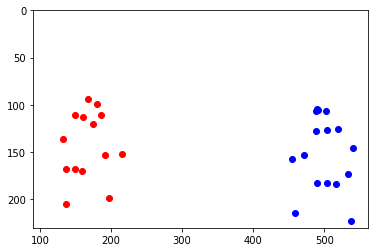

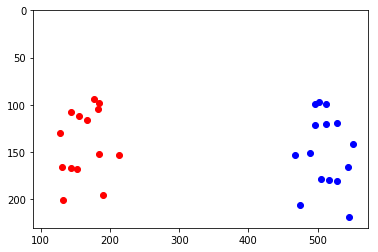

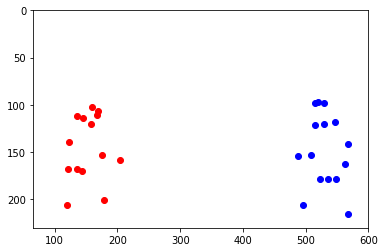

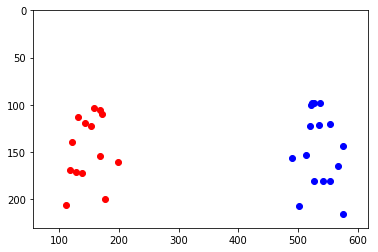

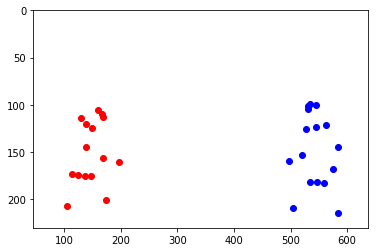

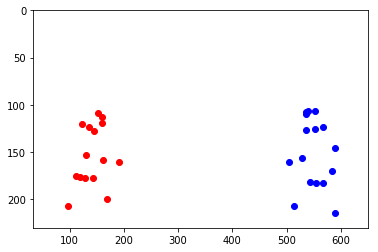

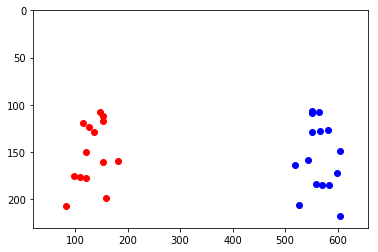

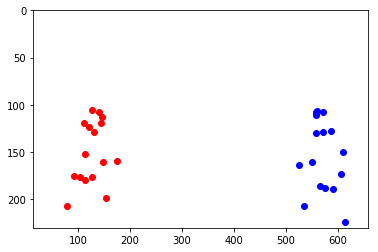

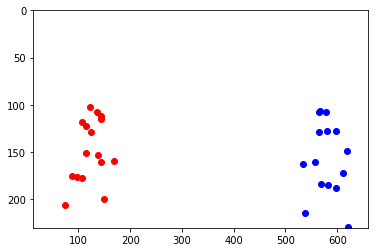

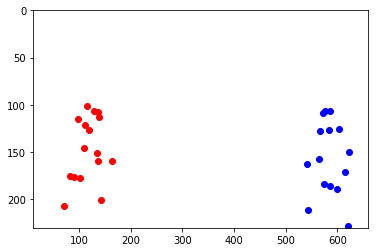

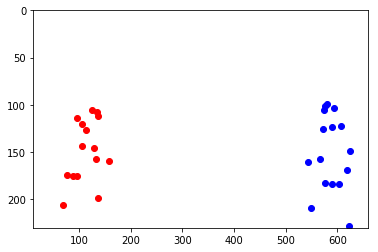

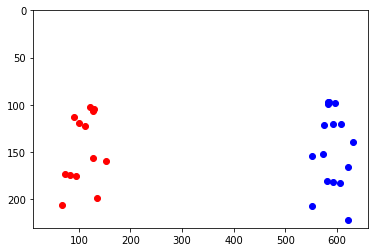

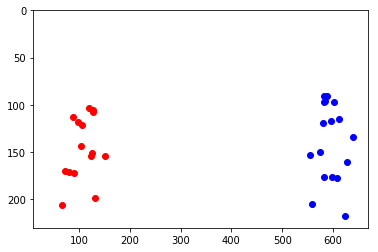

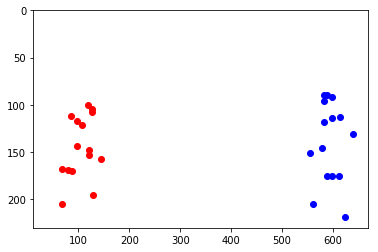

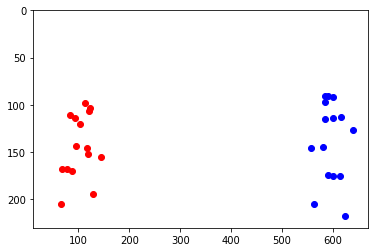

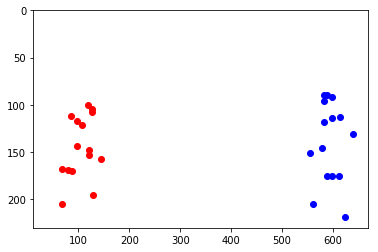

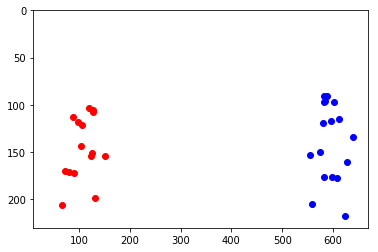

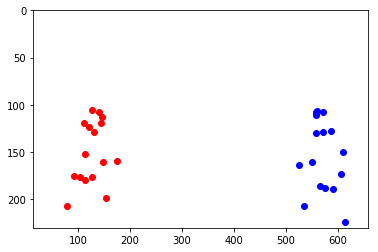

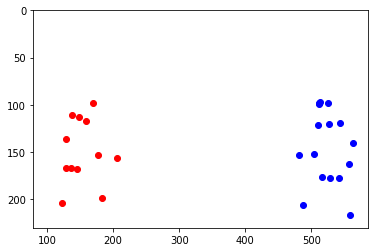

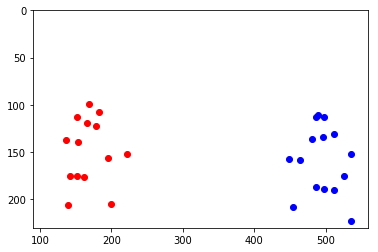

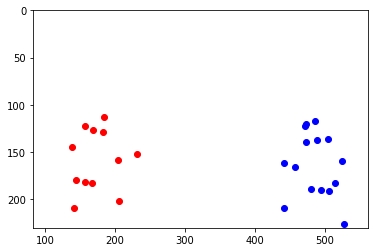

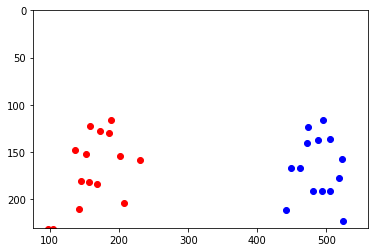

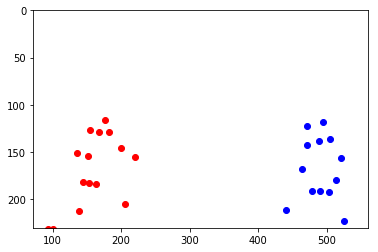

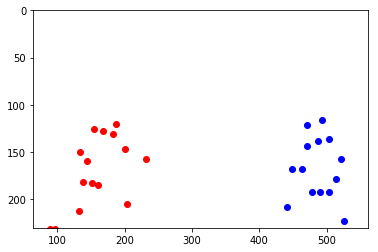

In [4]:
def plot_key_points(X, ax):
    mask = X[0].mean(axis=1) > 1
    ax.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    mask = X[1].mean(axis=1) > 1
    ax.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(230, 0)
    
def plot_key_point_sequence(idx):
    fig, ax = plt.subplots()
    plot_key_points(df_kp[int(idx)], ax)
    plt.show()


interactive_plot = interactive(plot_key_point_sequence, idx=(0, len(df_kp)-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

## Save images (no need to run this part)

In [ ]:
def save_img(X, name):
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    mask = X[0].mean(axis=1) > 1
    ax.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    mask = X[1].mean(axis=1) > 1
    ax.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(300, 0)
    ax.set_xlim(0, 600)
    plt.axis("off")
    plt.savefig(img_path.replace("/000", "/both/000"))
    
def save_images(X, name):
    plt.figure(0)
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    mask = X[0].mean(axis=1) > 1
    plt.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    ax.set_ylim(300, 0)
    ax.set_xlim(0, 600)
    plt.axis("off")
    plt.savefig(img_path.replace("/000", "/A_000"))
    
    plt.figure(1)
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    mask = X[1].mean(axis=1) > 1
    plt.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(300, 0)
    ax.set_xlim(0, 600)
    plt.axis("off")
    plt.savefig(img_path.replace("/000", "/B_000"))

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'images/4/both/0001_002_06_02_1-00.png'

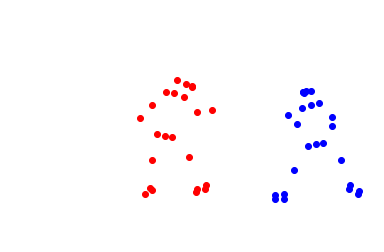

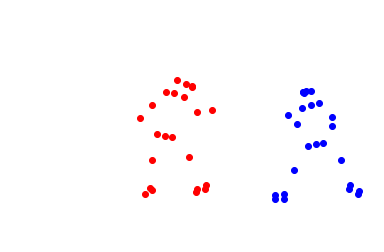

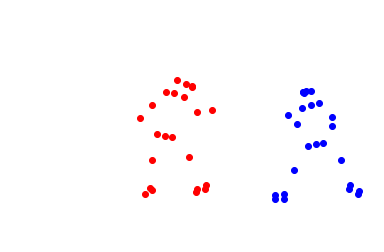

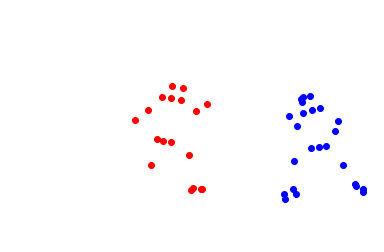

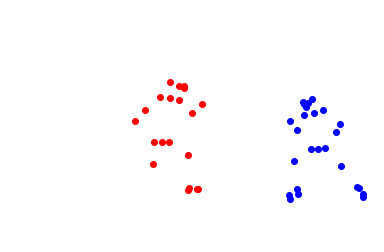

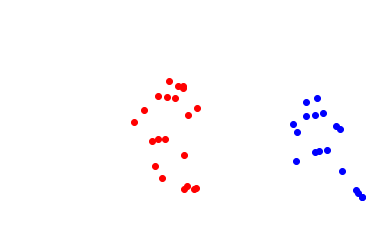

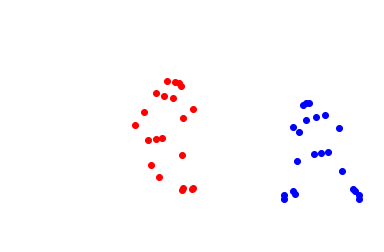

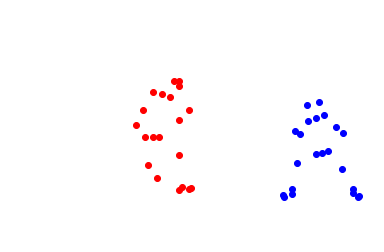

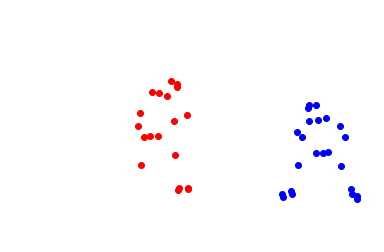

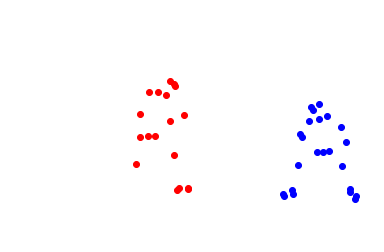

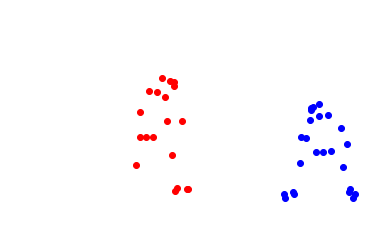

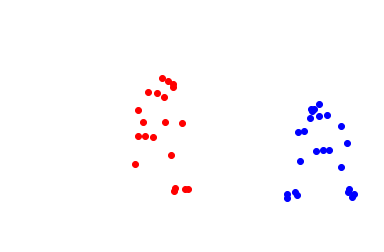

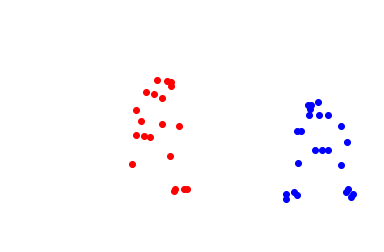

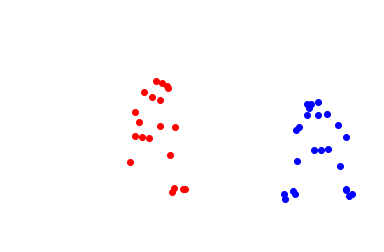

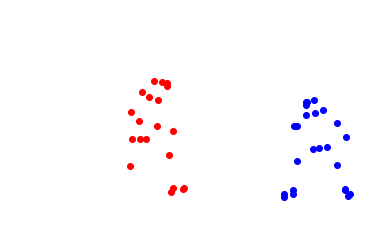

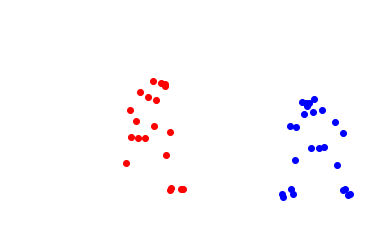

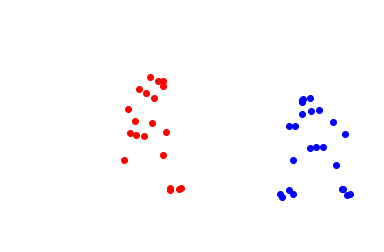

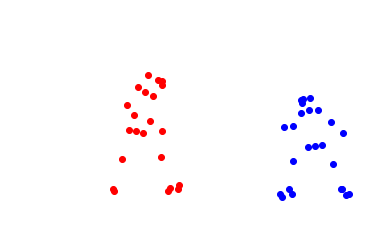

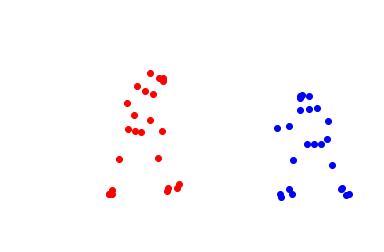

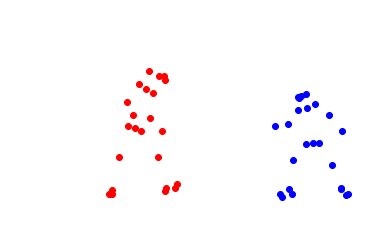

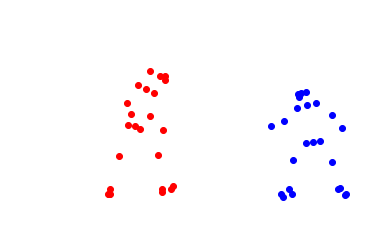

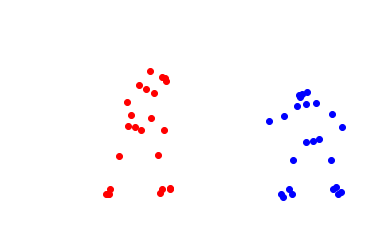

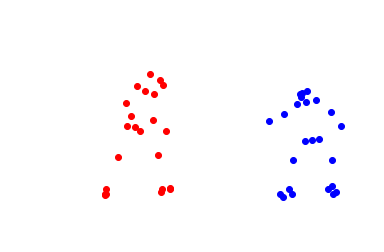

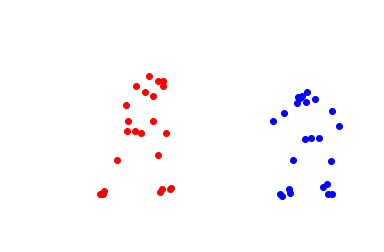

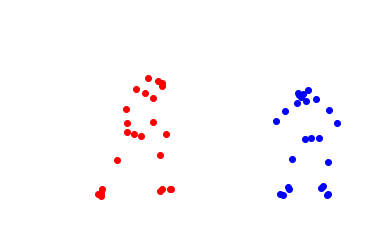

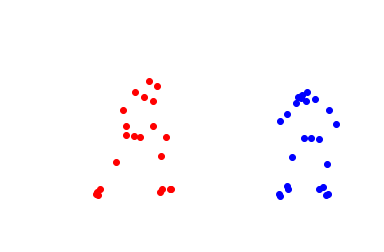

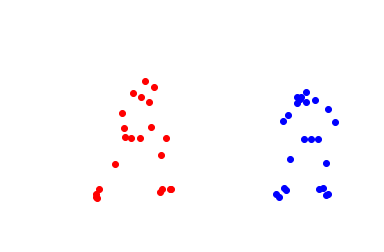

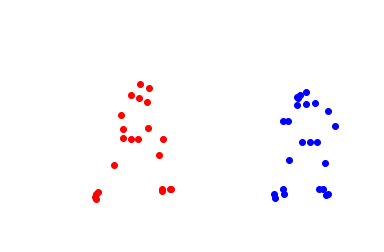

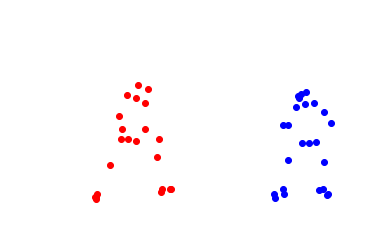

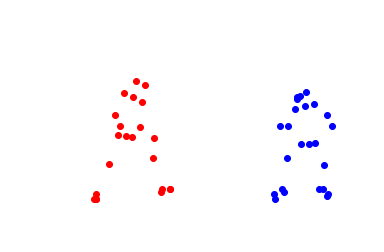

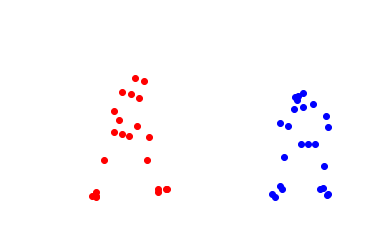

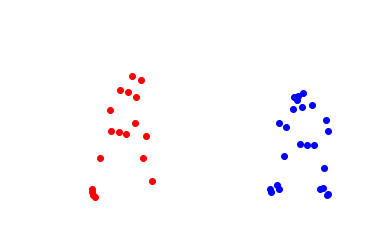

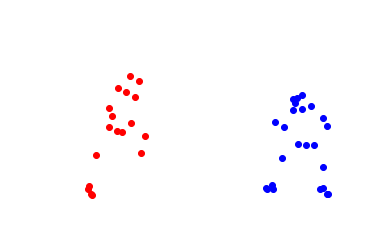

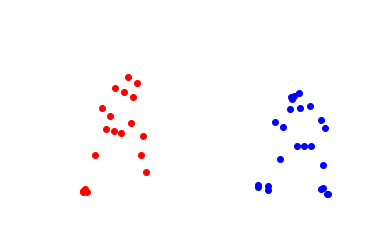

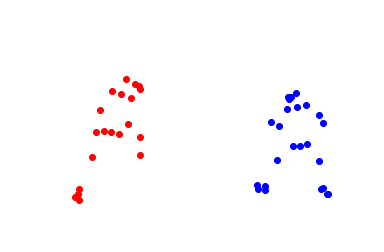

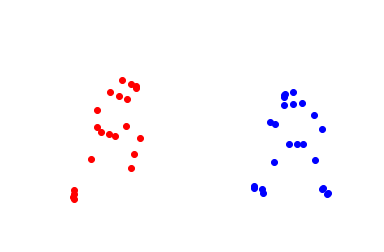

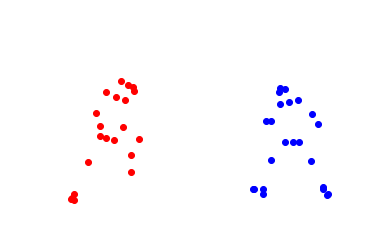

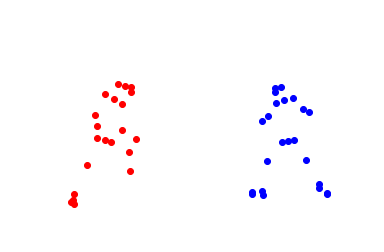

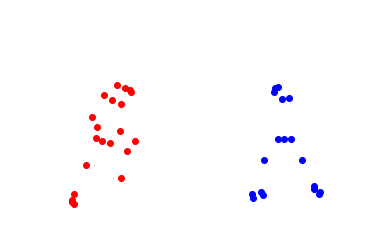

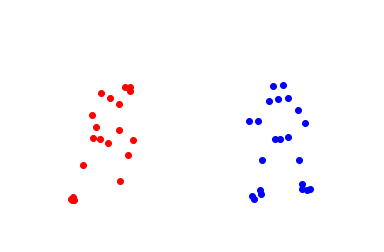

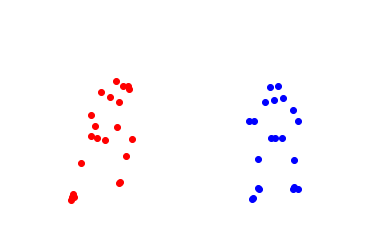

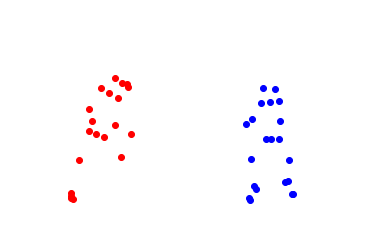

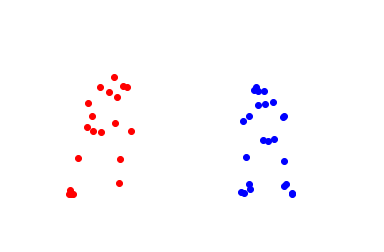

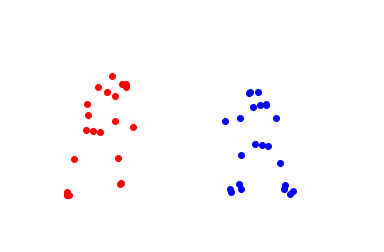

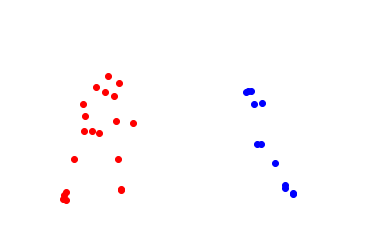

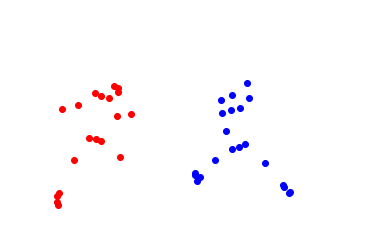

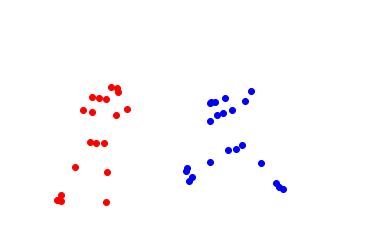

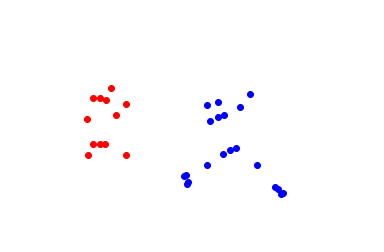

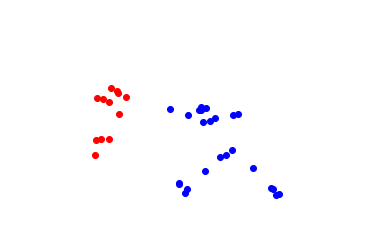

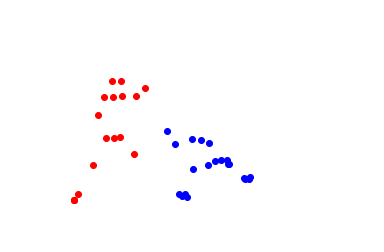

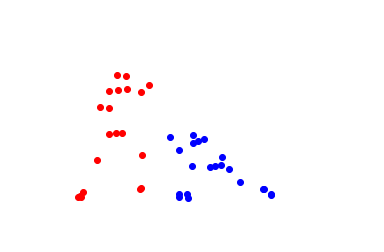

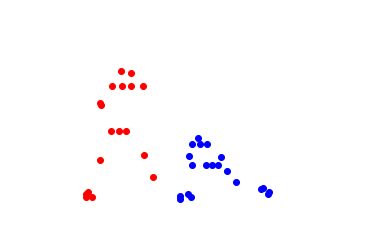

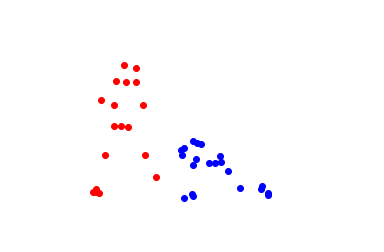

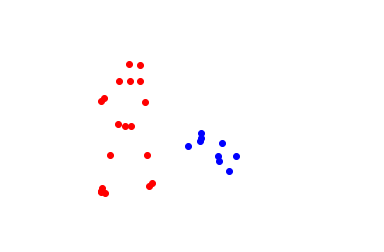

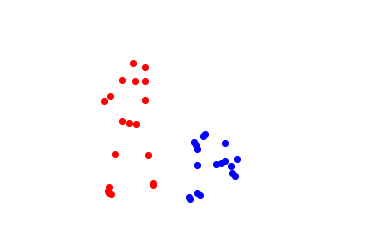

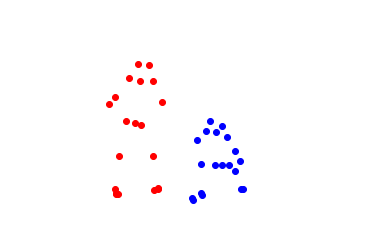

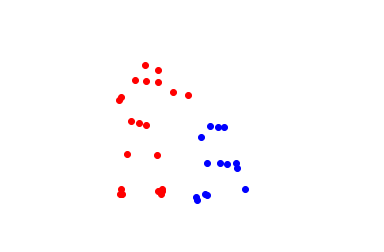

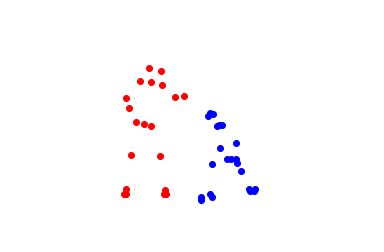

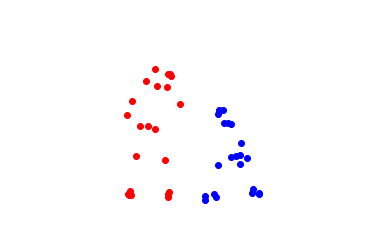

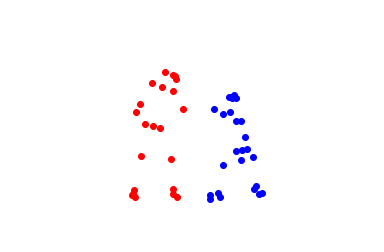

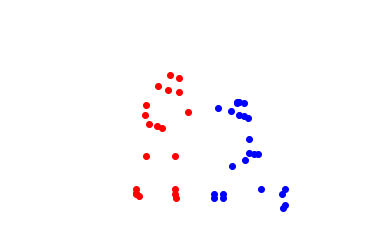

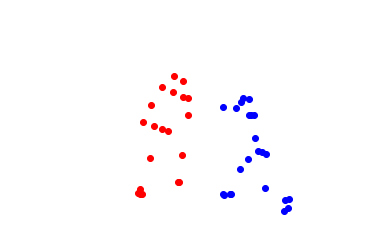

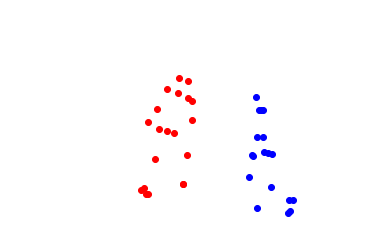

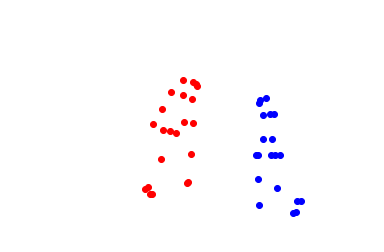

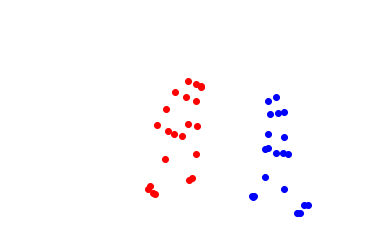

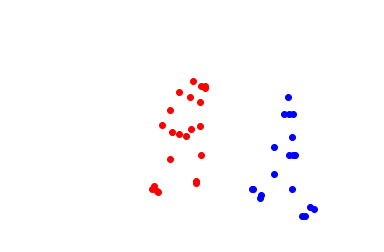

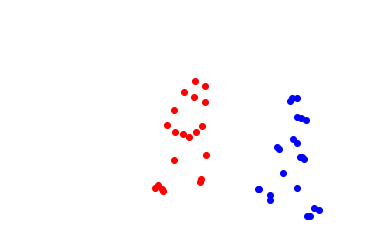

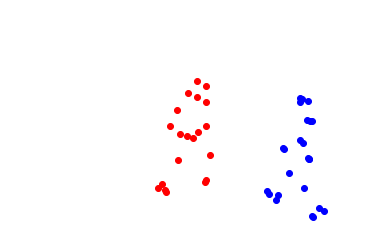

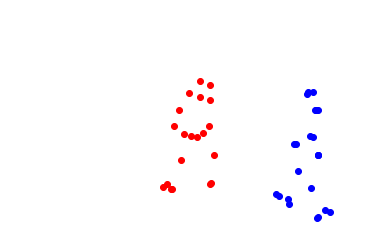

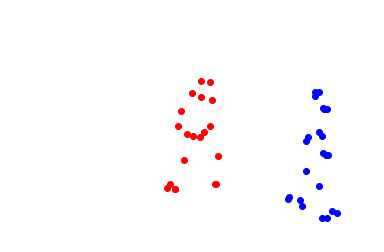

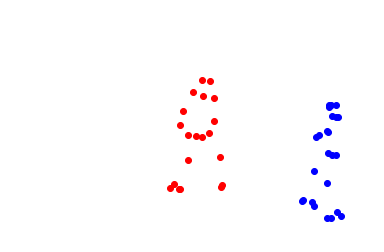

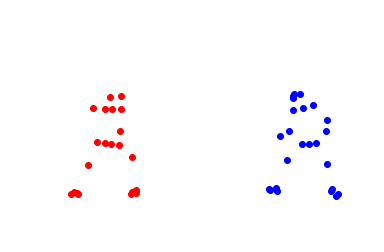

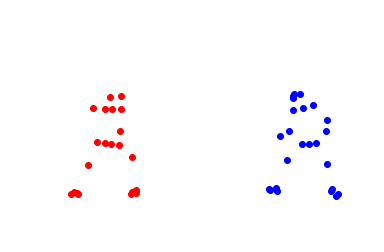

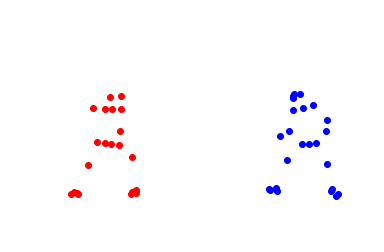

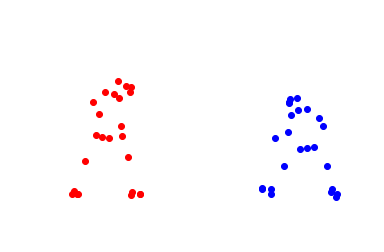

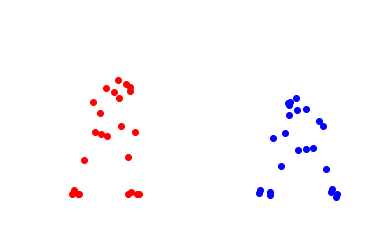

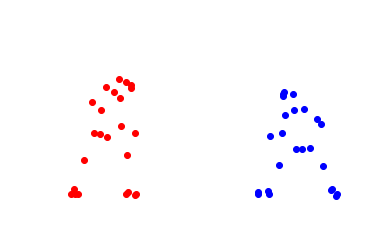

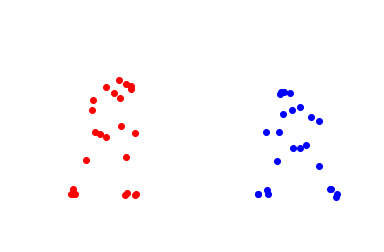

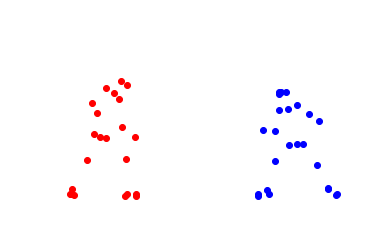

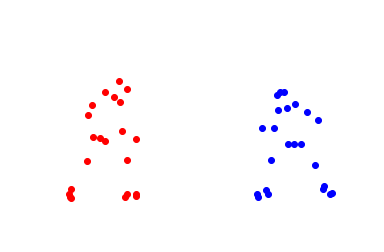

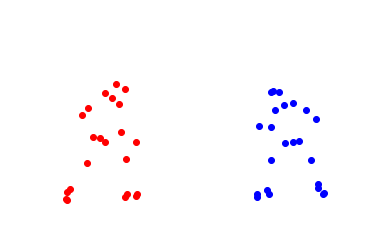

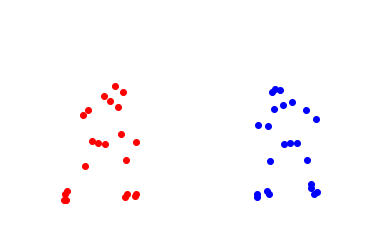

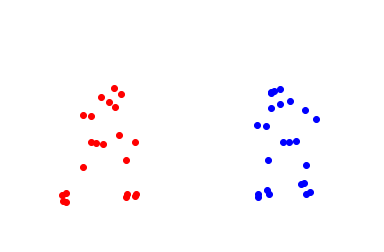

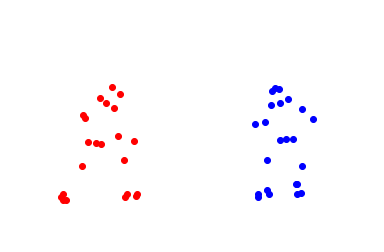

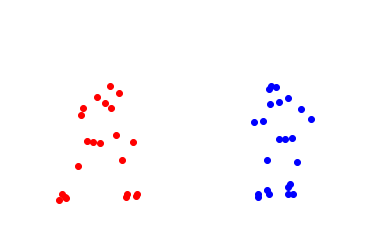

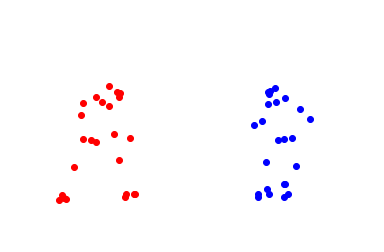

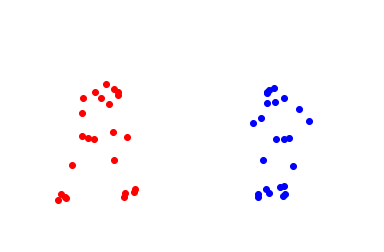

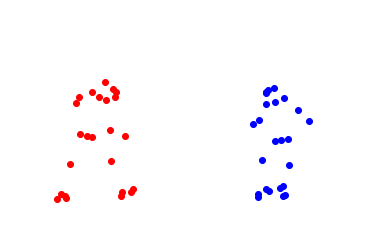

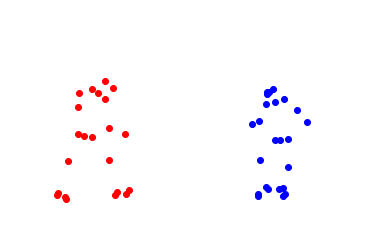

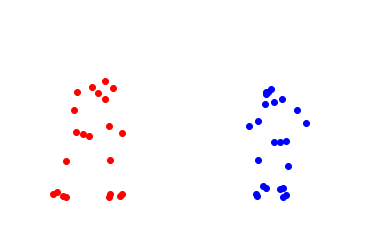

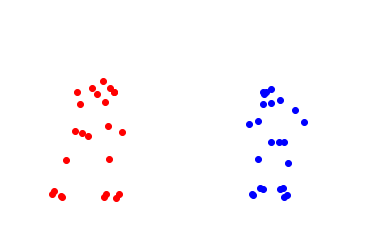

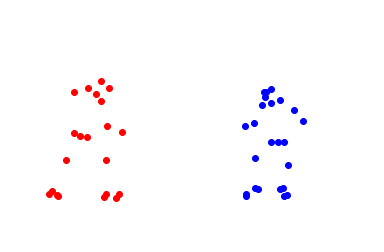

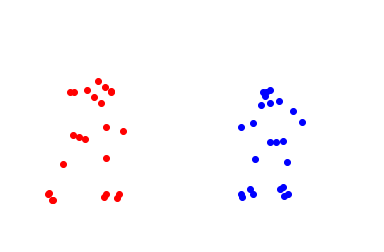

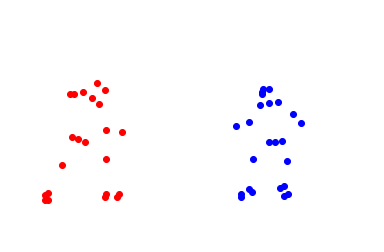

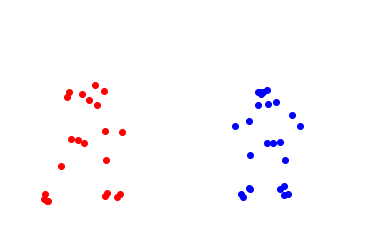

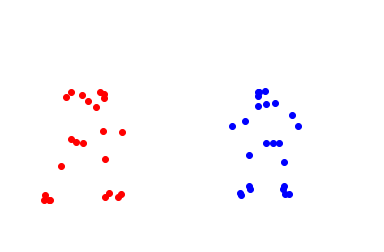

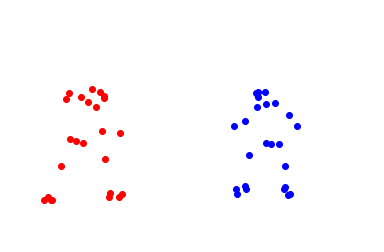

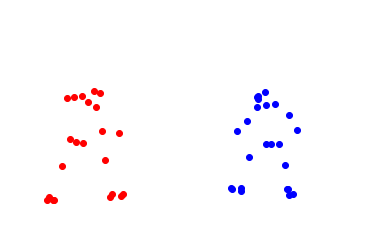

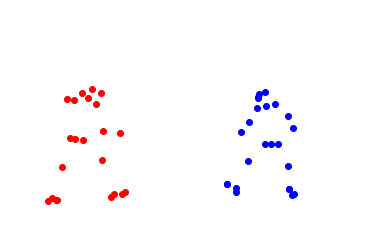

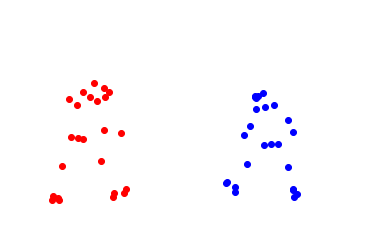

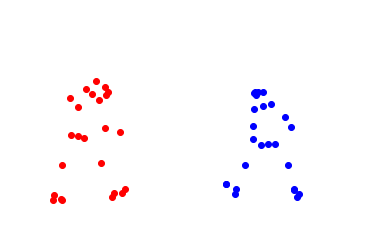

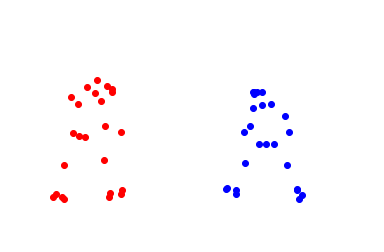

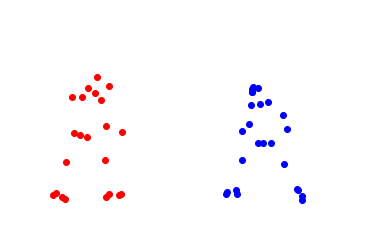

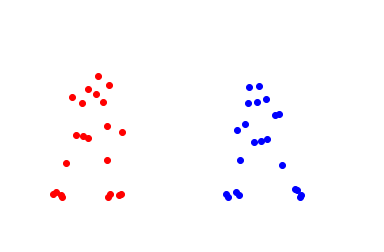

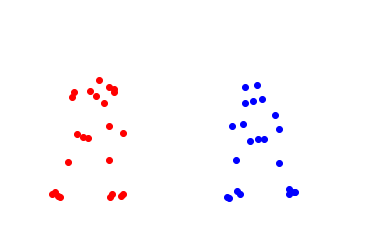

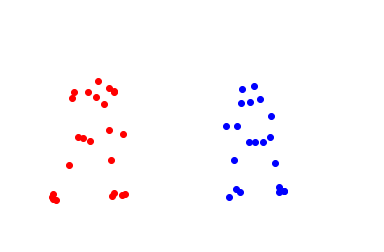

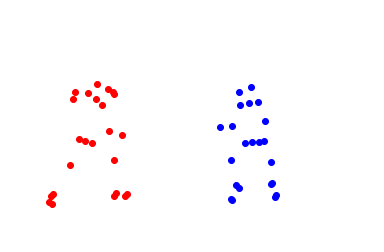

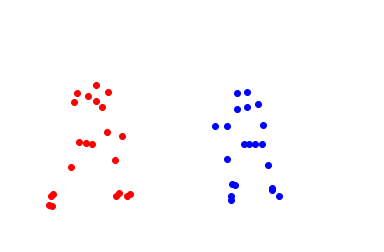

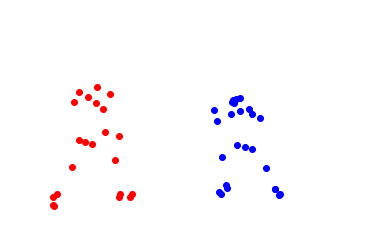

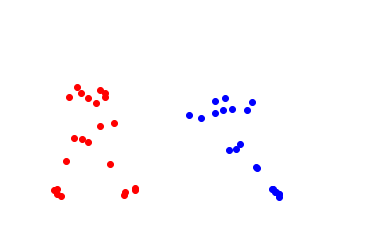

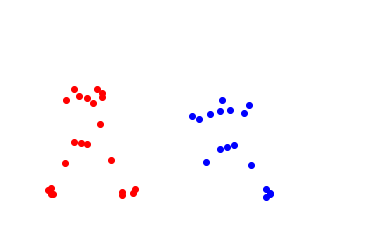

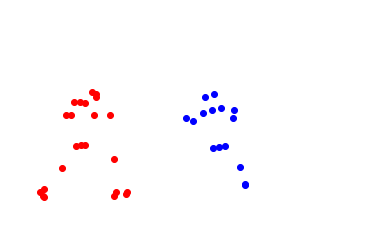

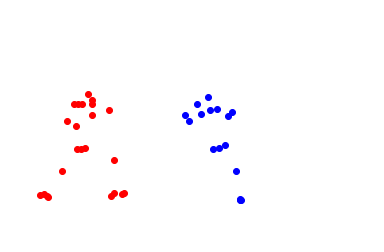

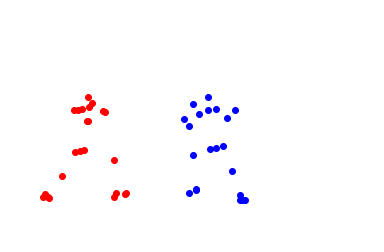

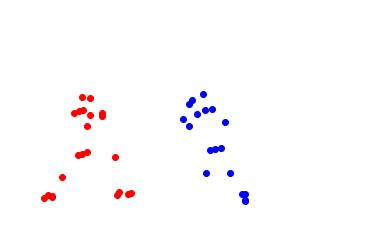

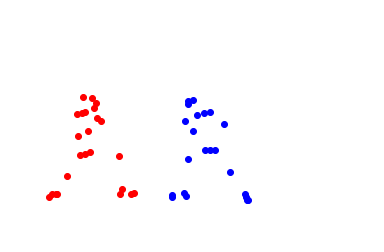

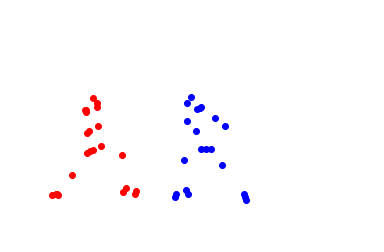

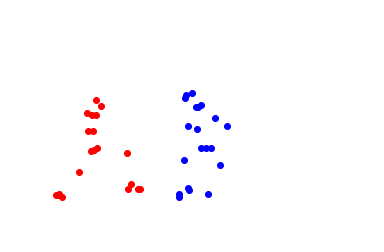

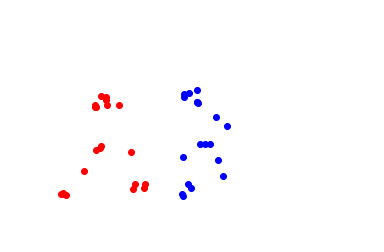

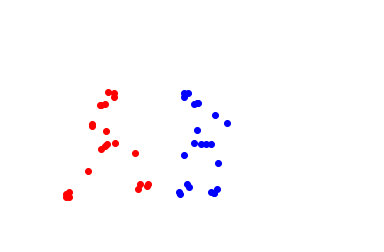

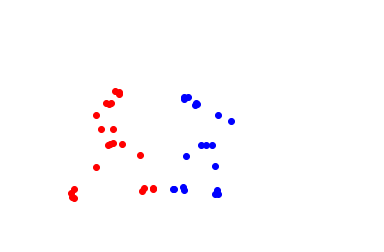

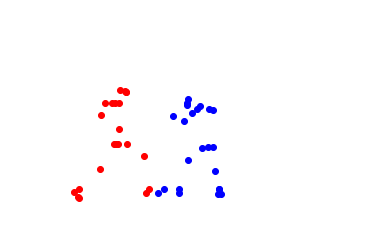

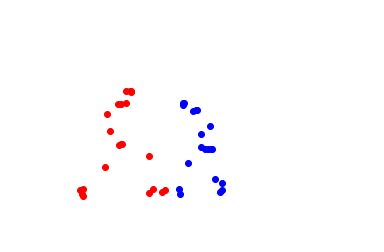

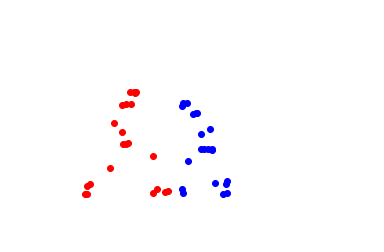

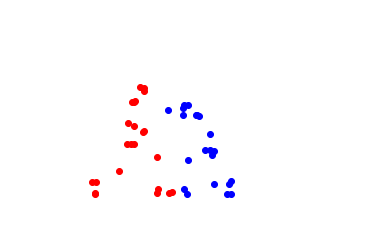

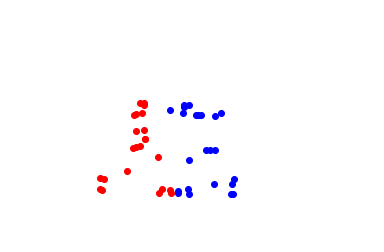

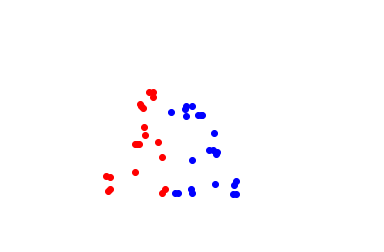

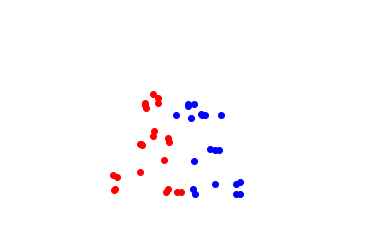

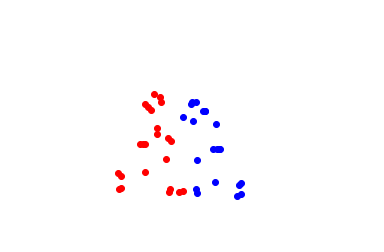

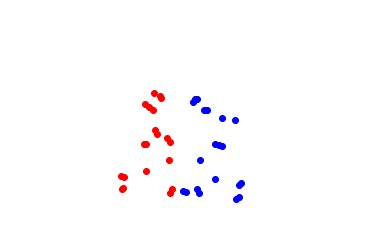

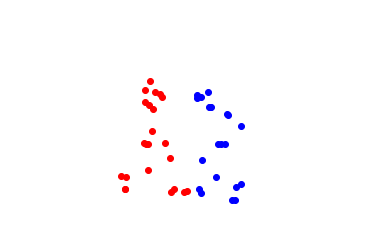

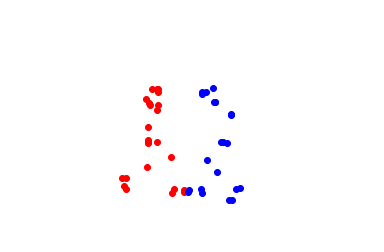

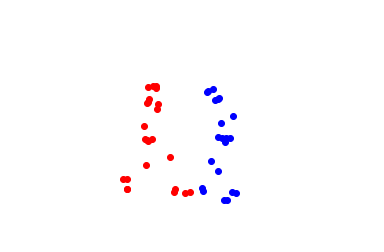

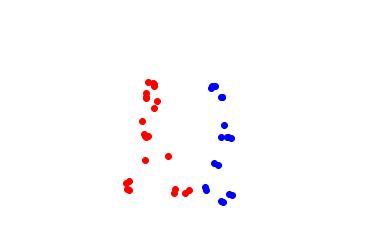

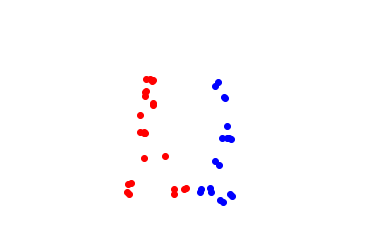

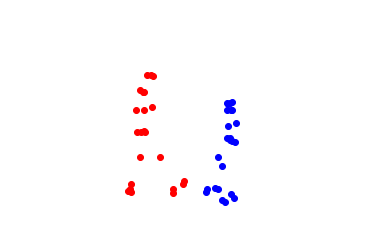

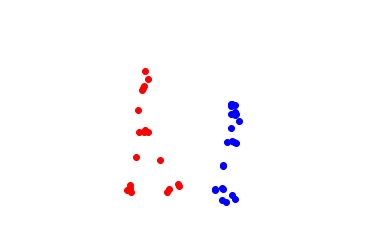

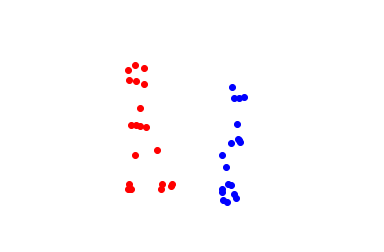

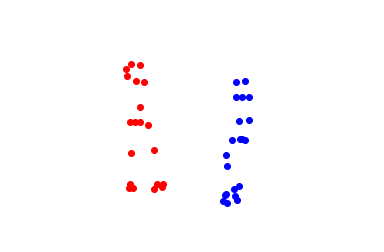

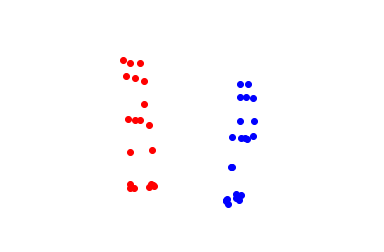

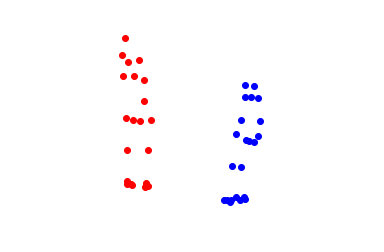

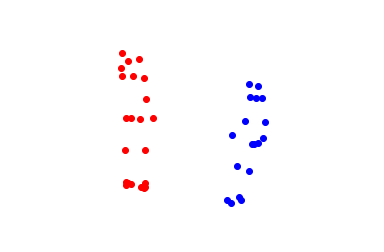

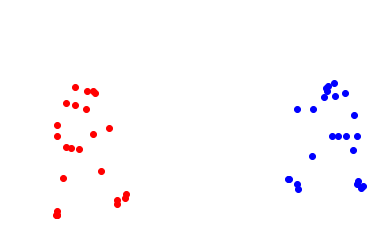

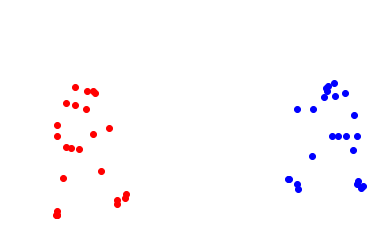

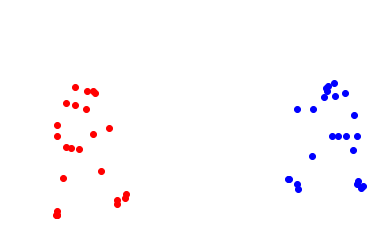

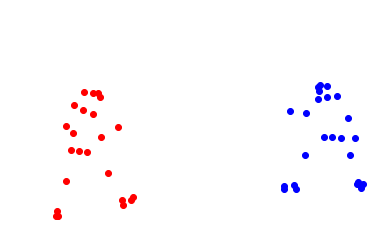

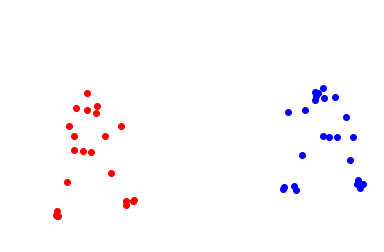

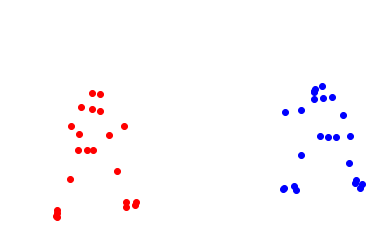

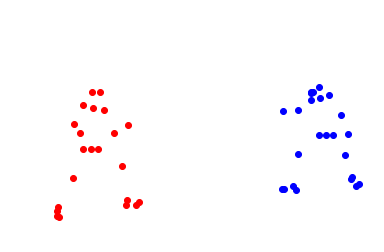

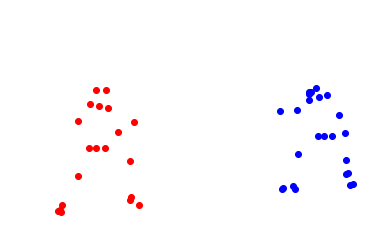

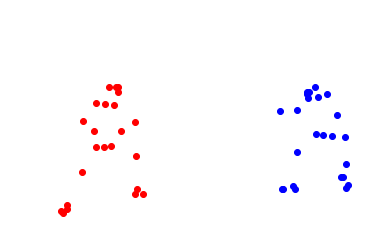

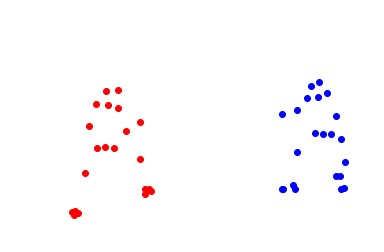

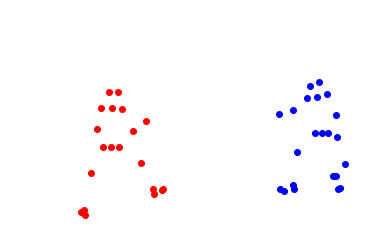

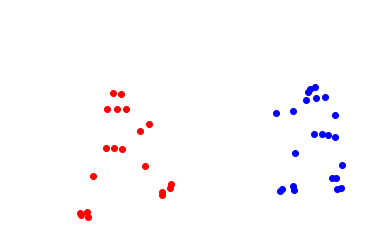

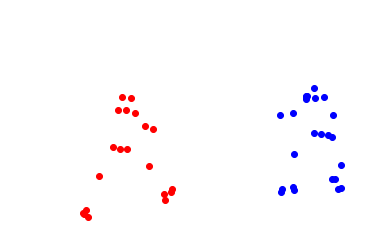

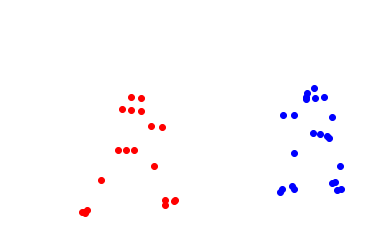

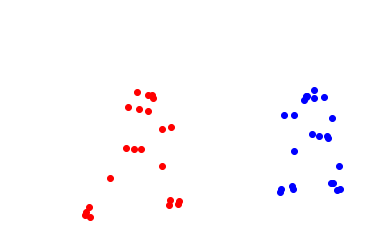

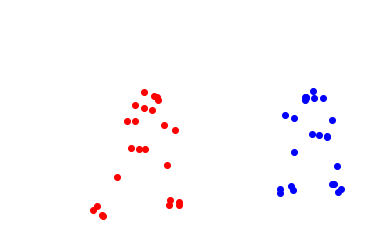

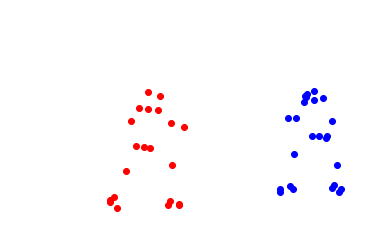

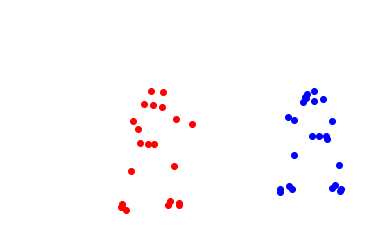

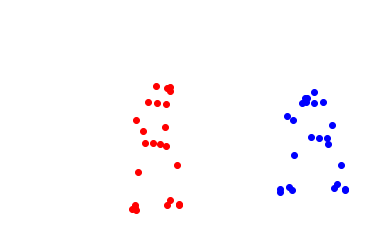

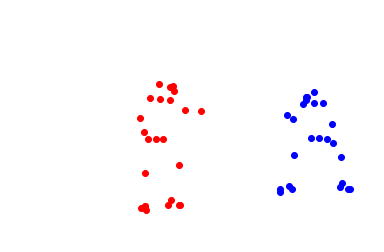

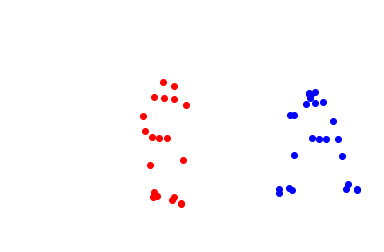

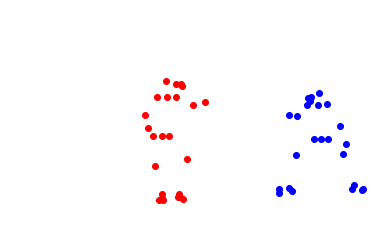

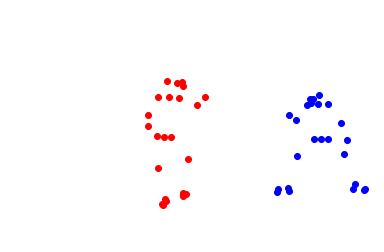

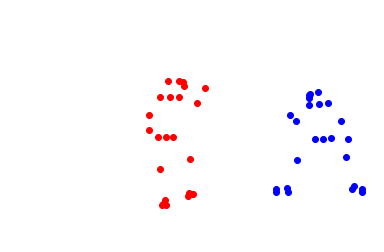

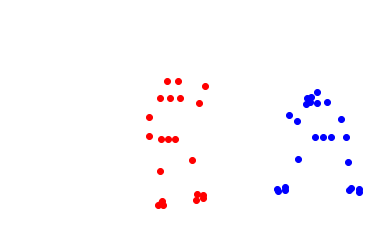

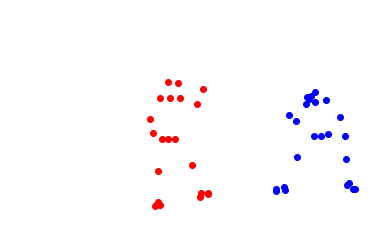

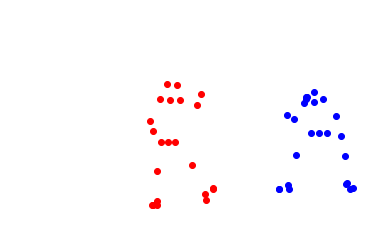

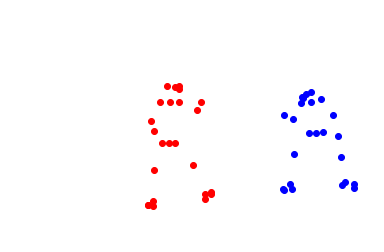

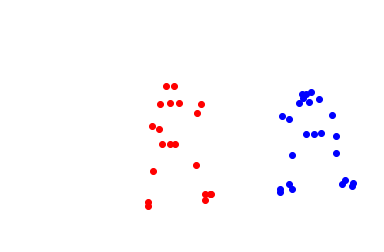

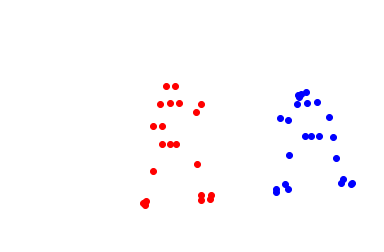

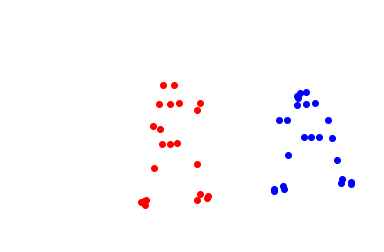

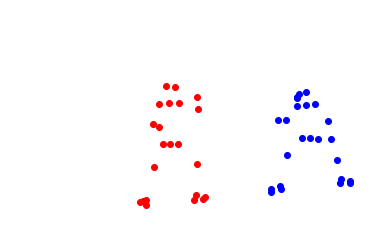

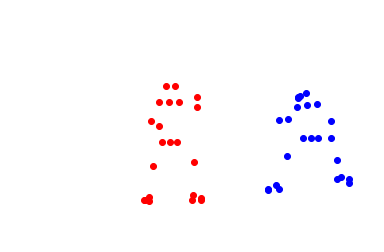

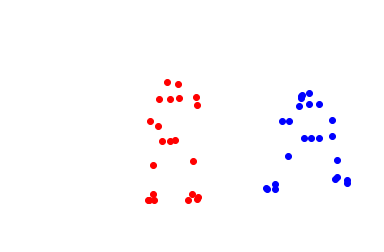

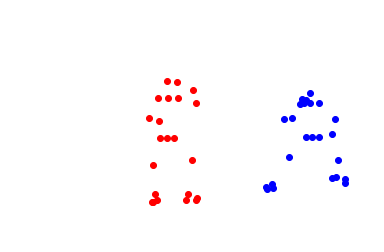

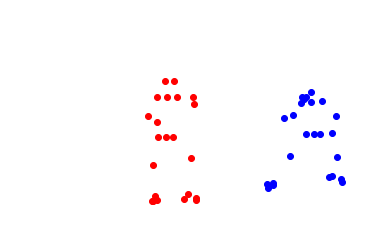

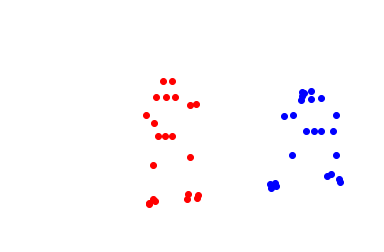

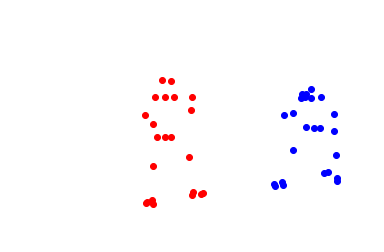

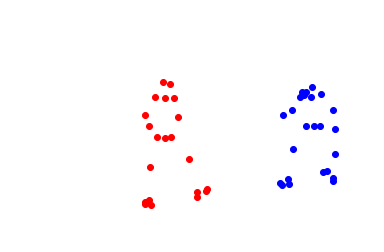

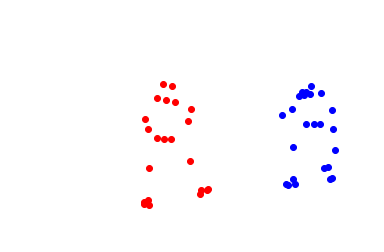

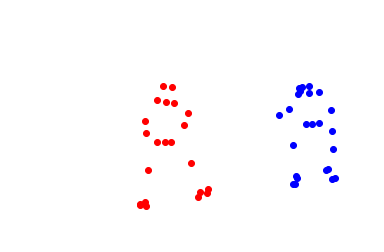

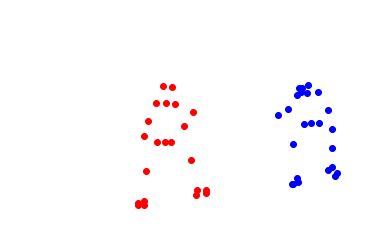

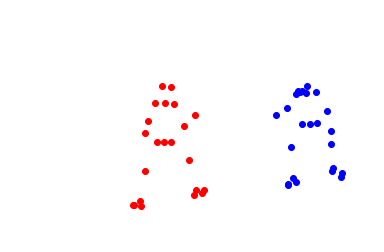

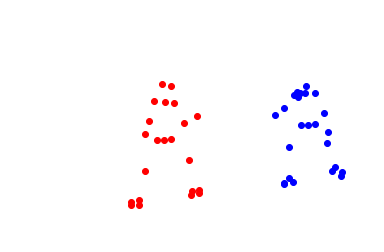

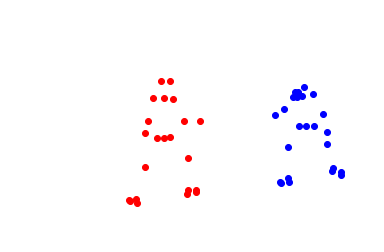

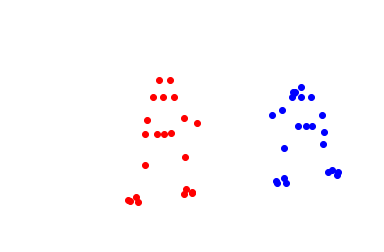

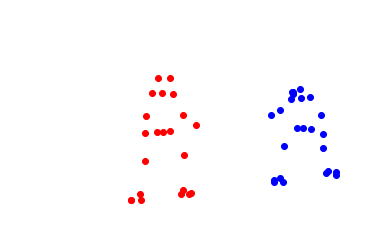

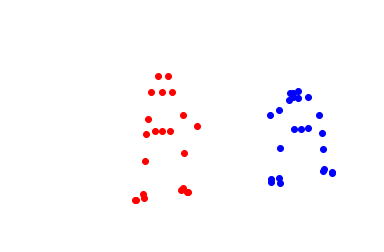

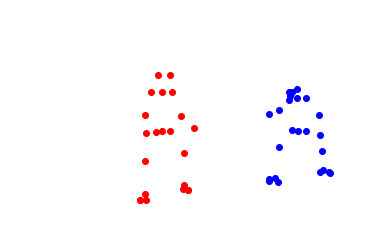

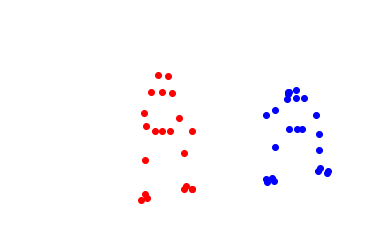

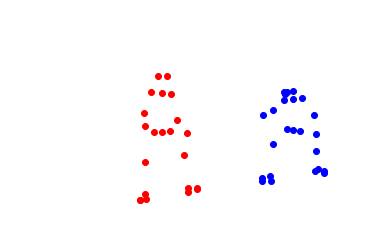

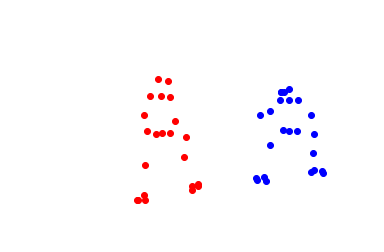

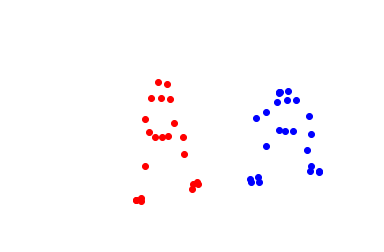

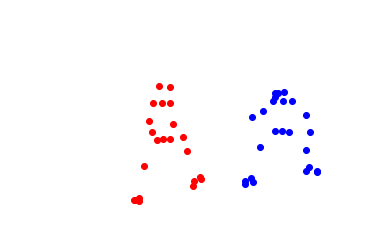

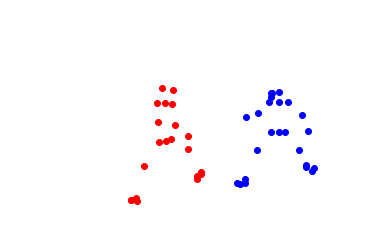

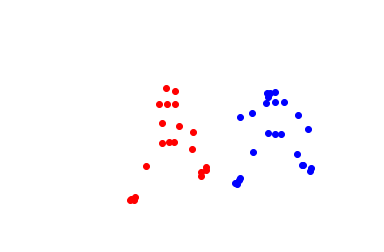

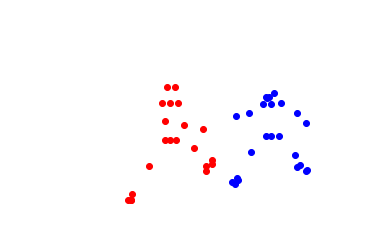

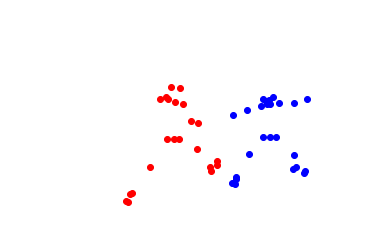

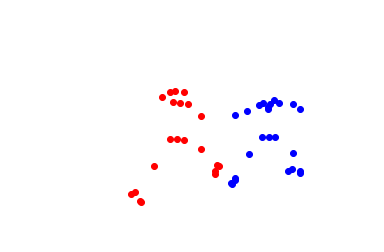

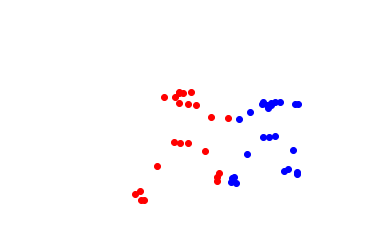

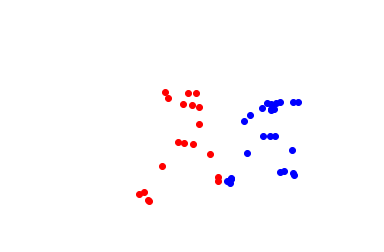

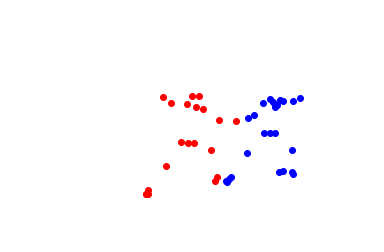

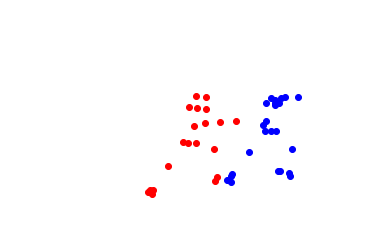

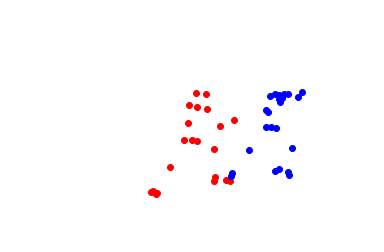

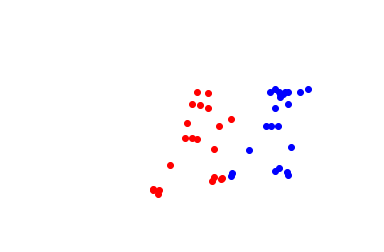

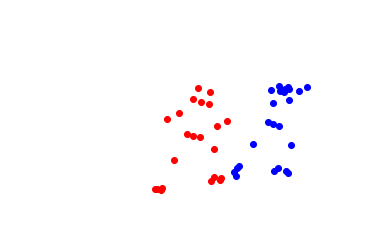

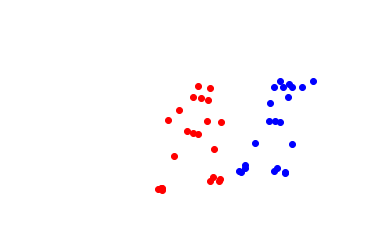

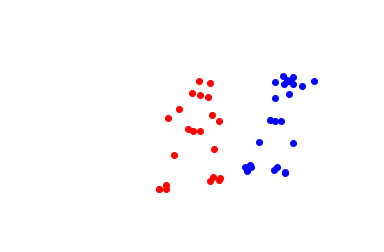

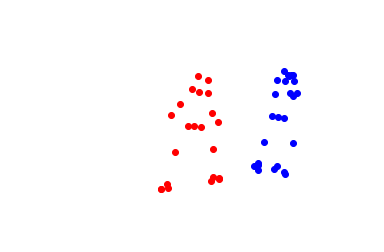

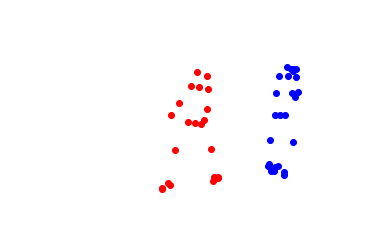

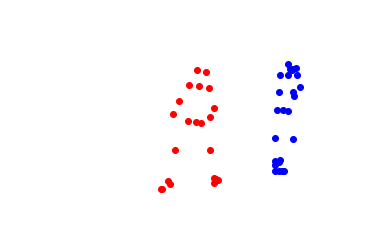

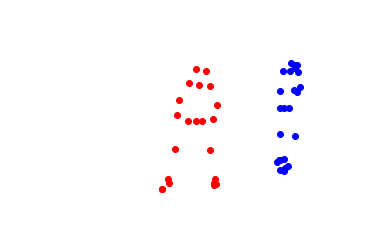

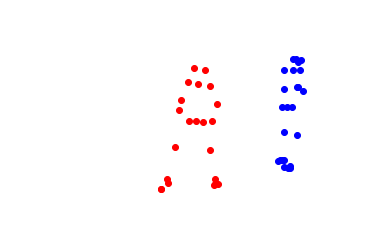

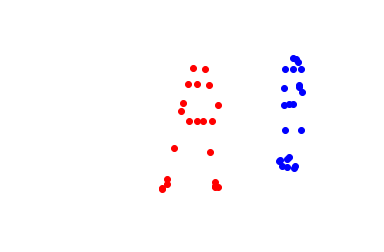

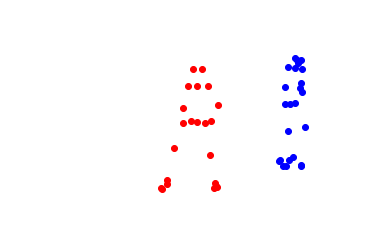

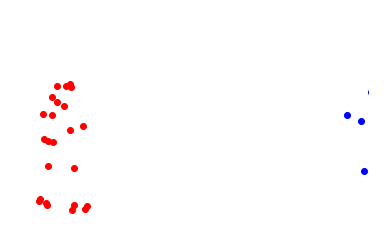

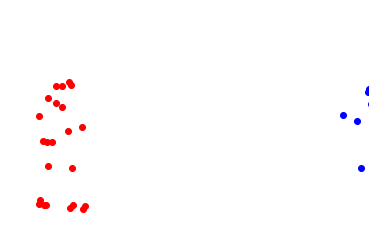

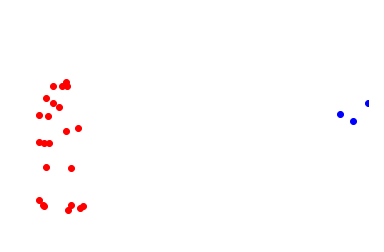

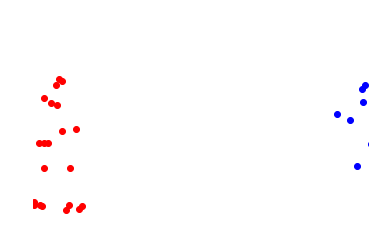

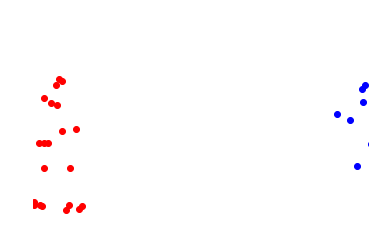

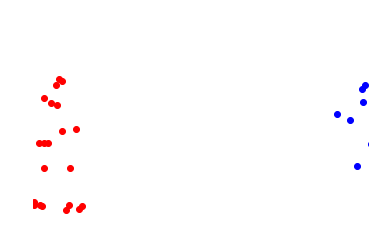

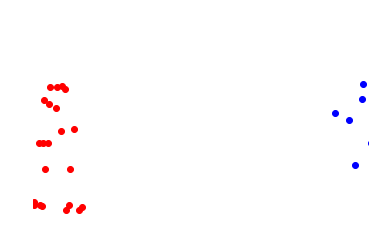

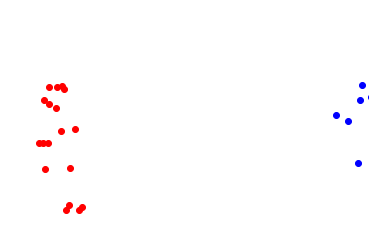

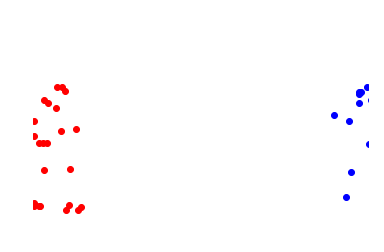

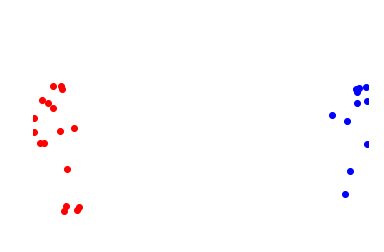

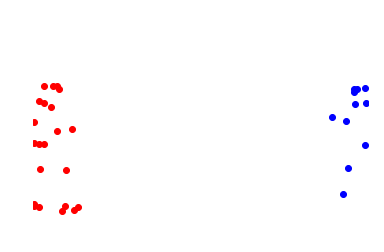

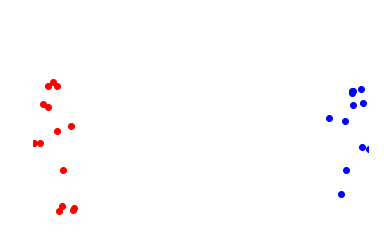

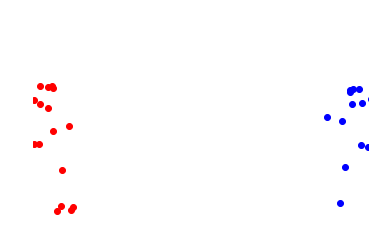

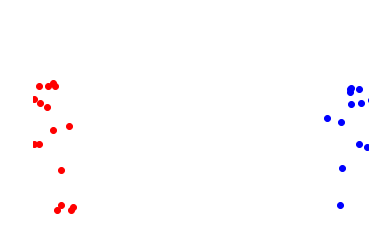

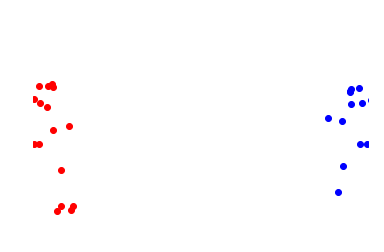

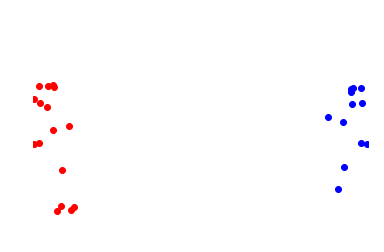

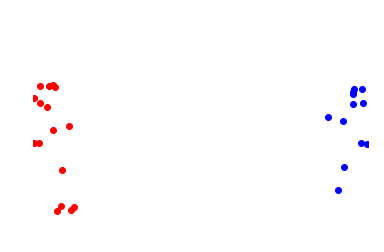

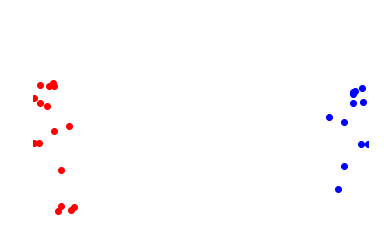

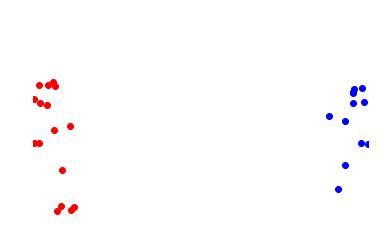

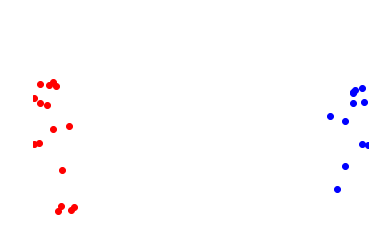

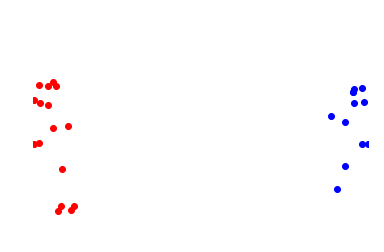

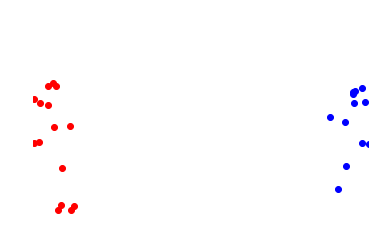

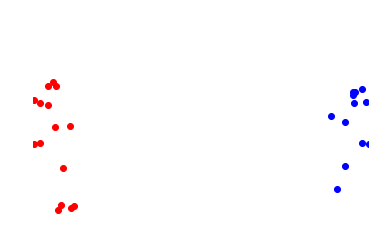

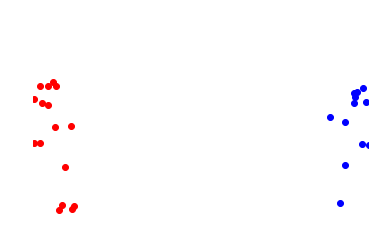

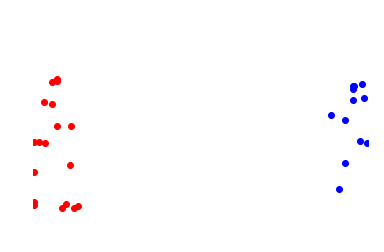

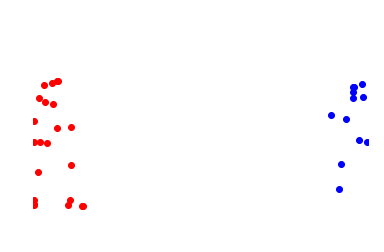

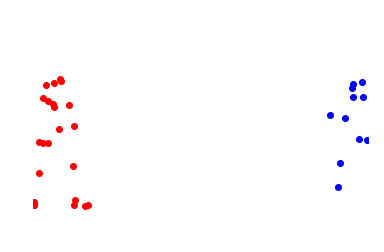

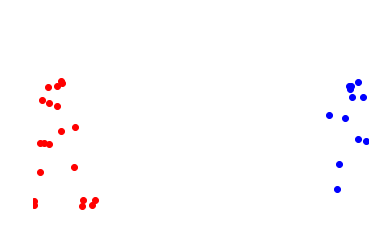

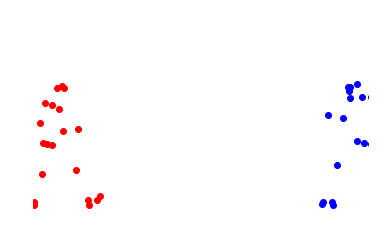

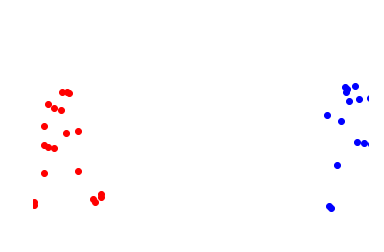

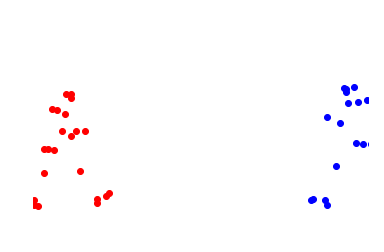

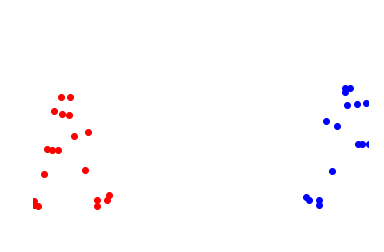

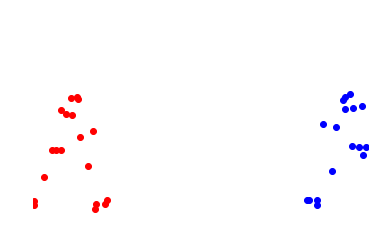

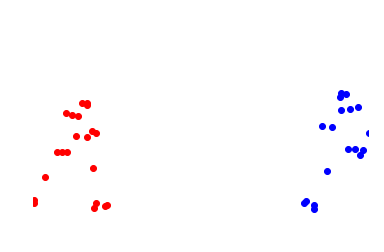

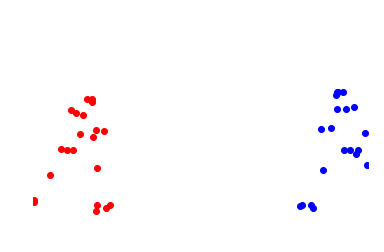

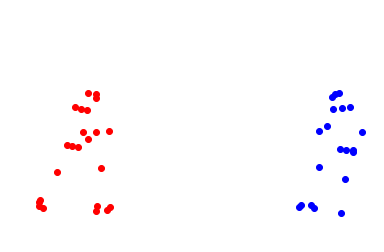

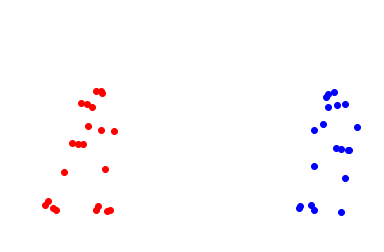

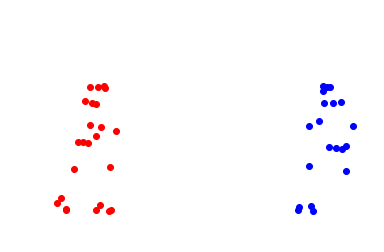

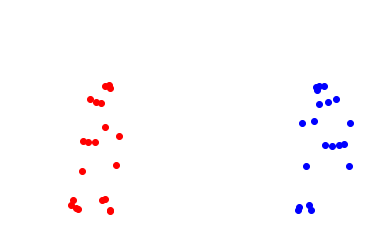

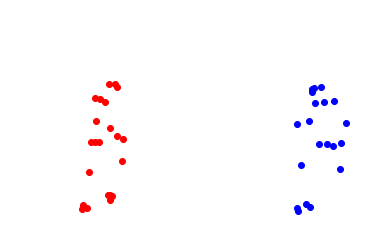

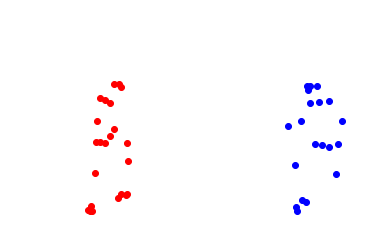

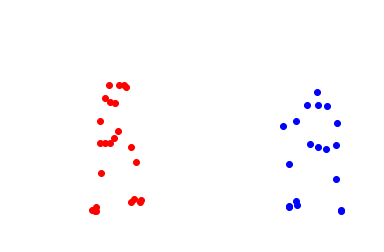

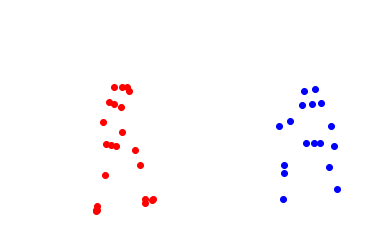

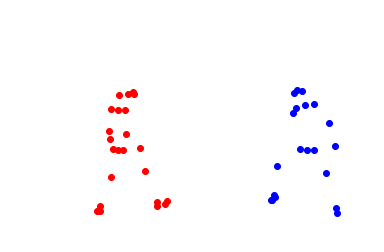

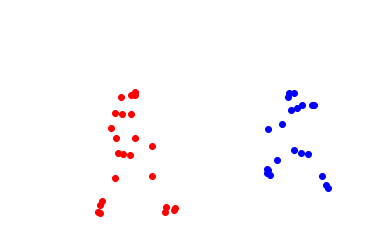

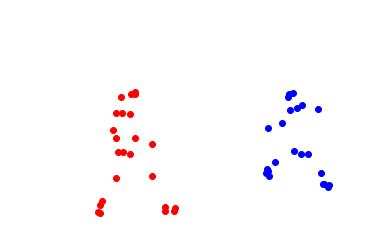

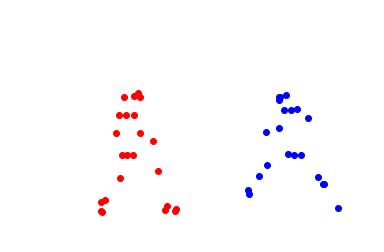

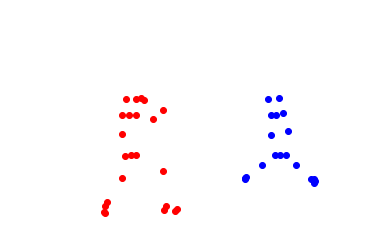

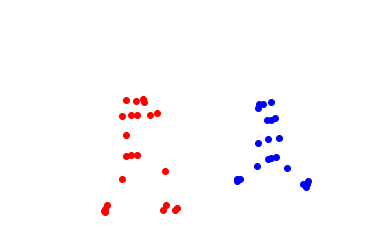

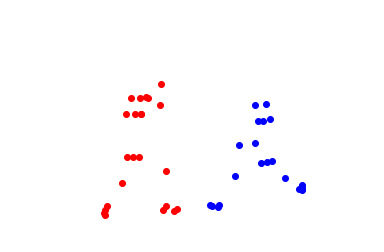

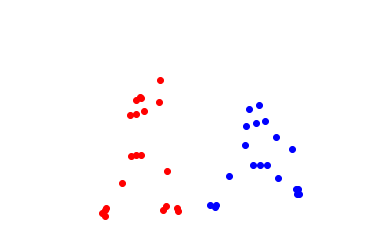

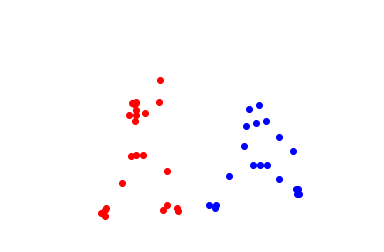

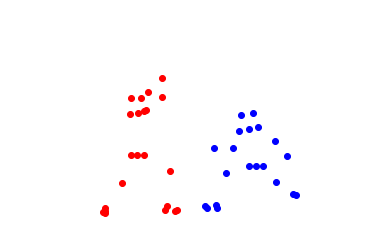

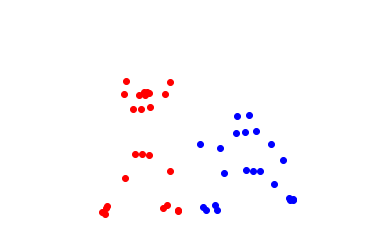

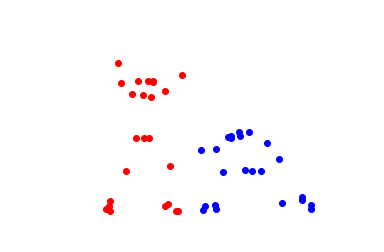

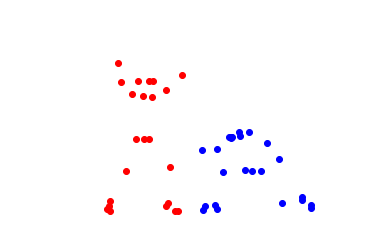

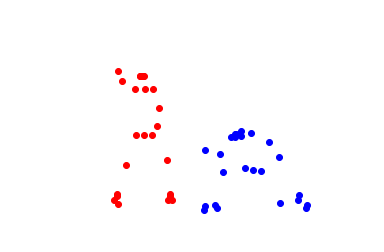

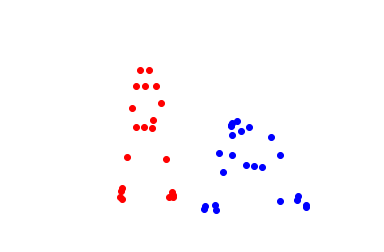

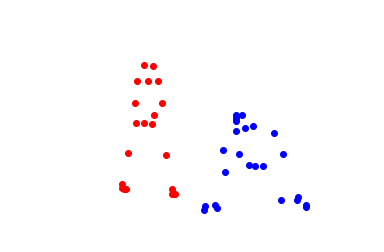

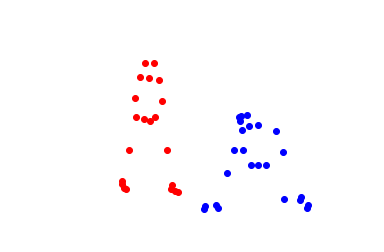

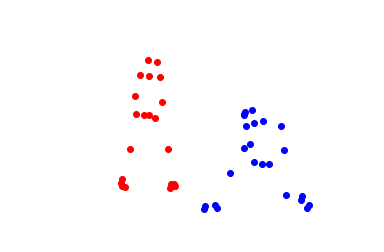

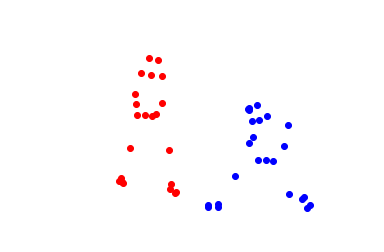

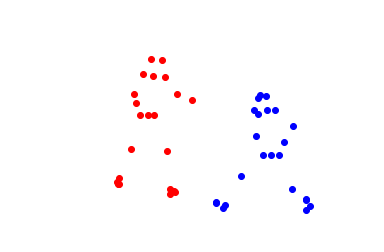

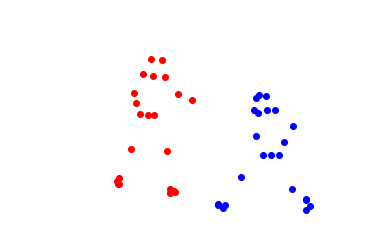

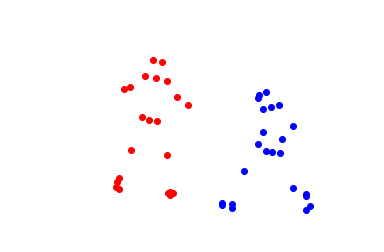

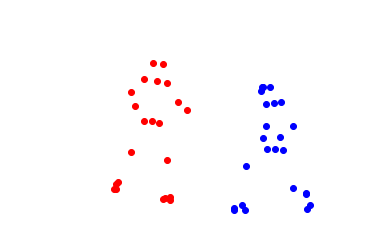

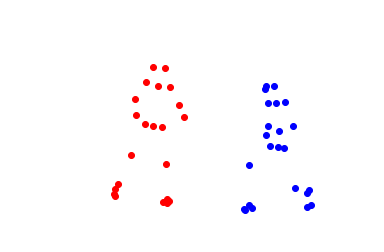

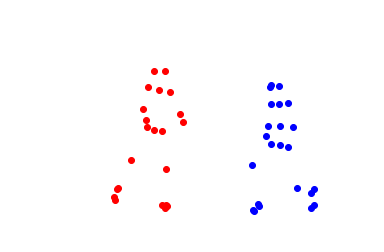

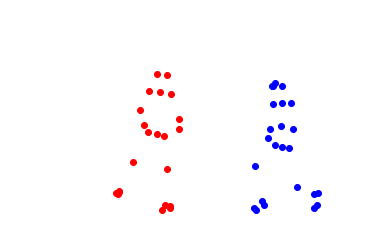

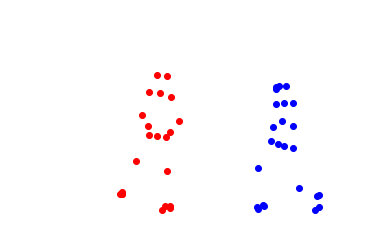

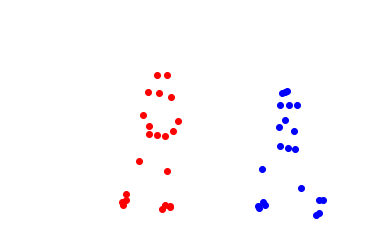

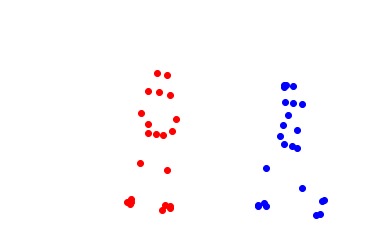

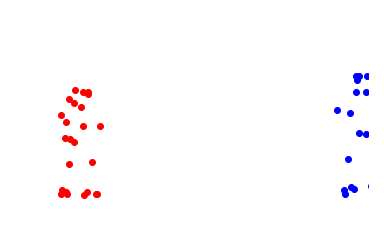

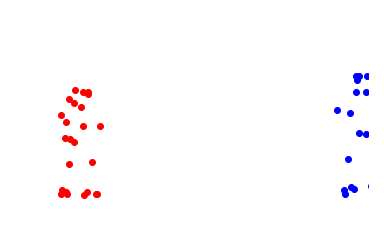

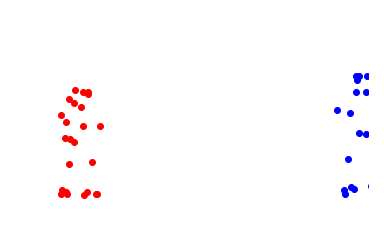

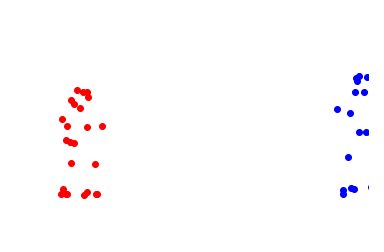

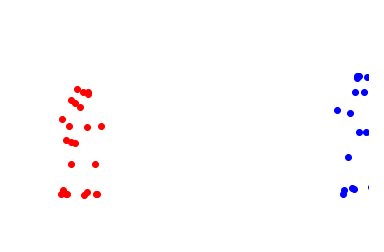

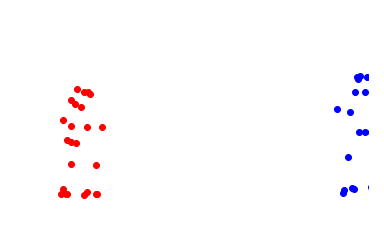

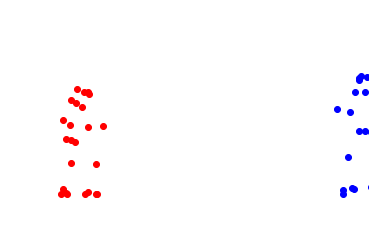

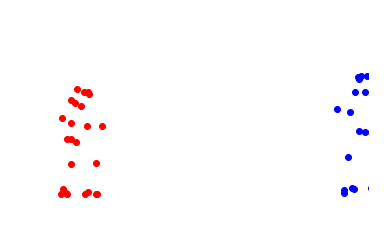

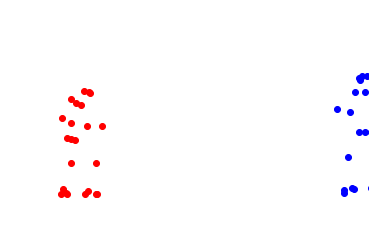

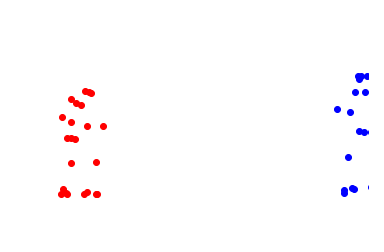

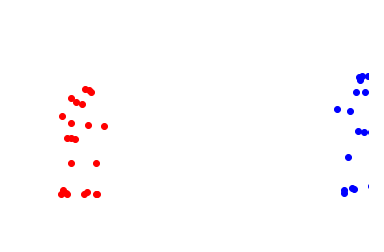

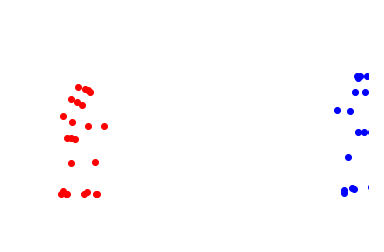

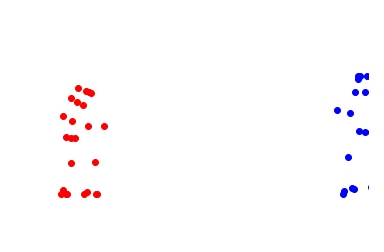

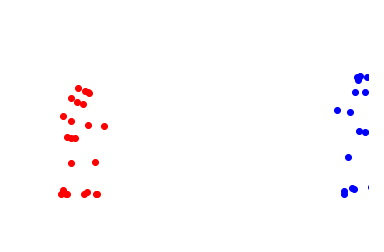

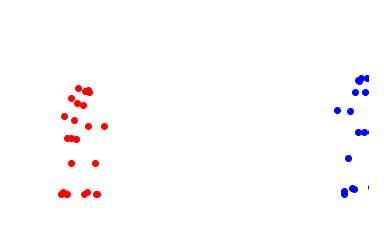

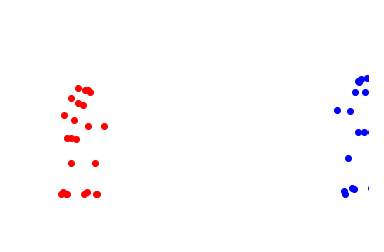

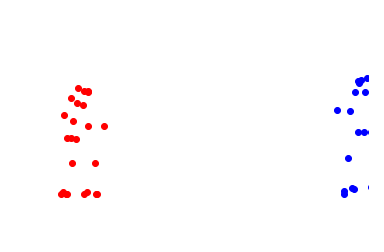

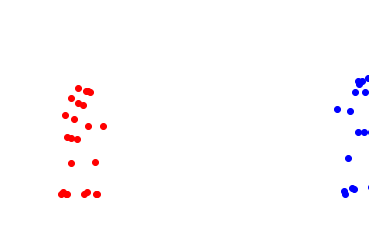

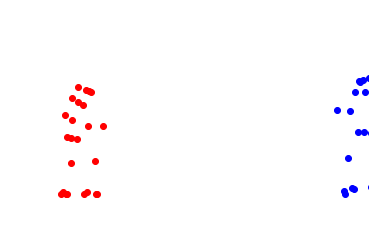

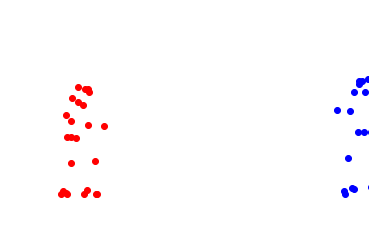

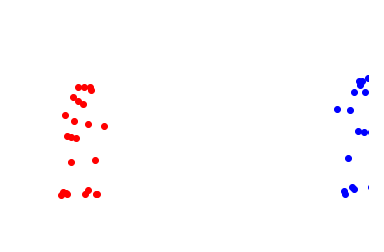

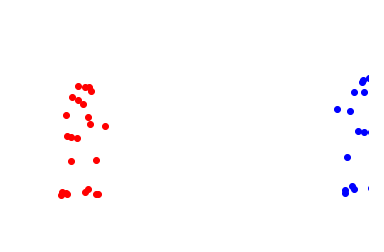

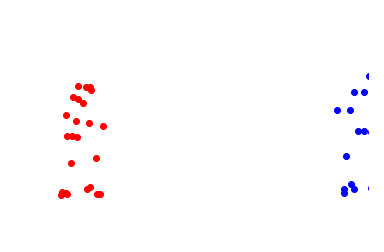

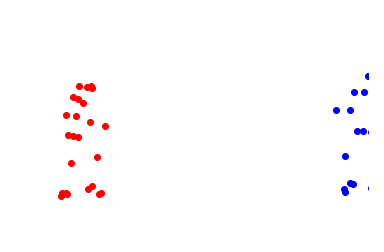

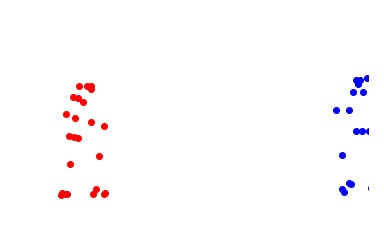

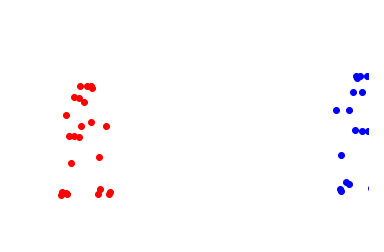

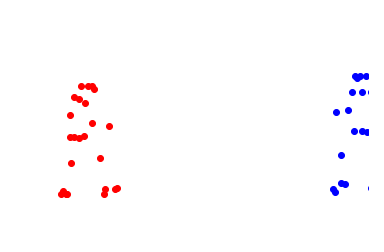

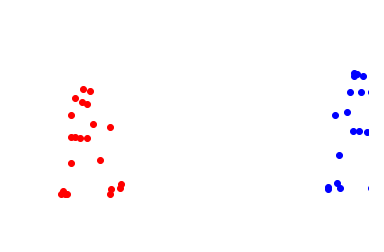

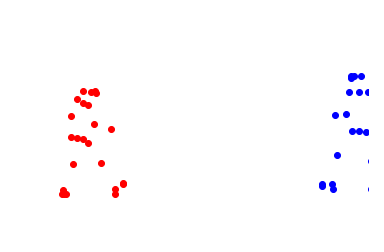

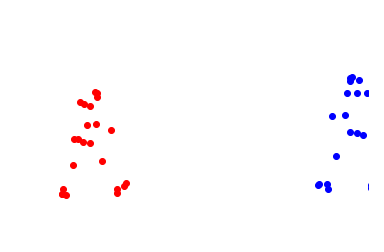

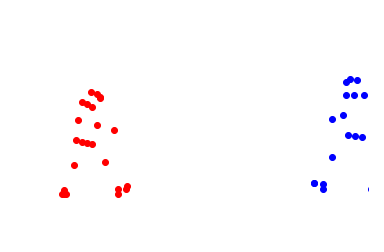

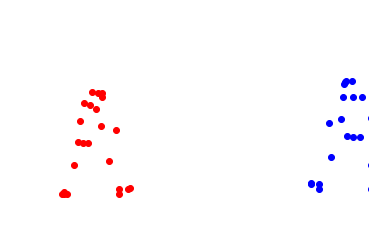

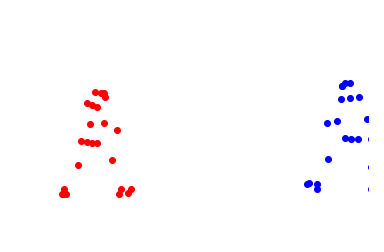

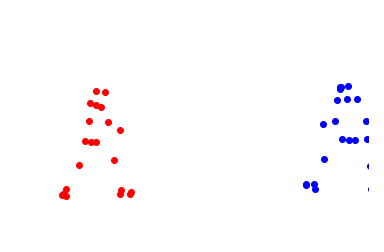

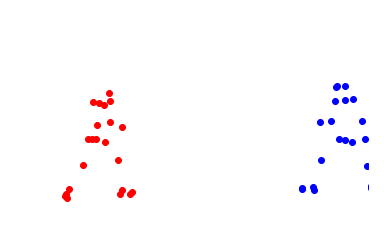

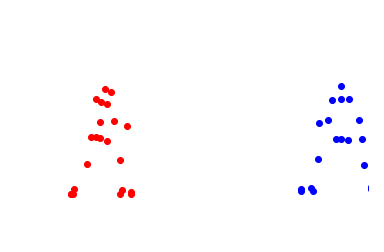

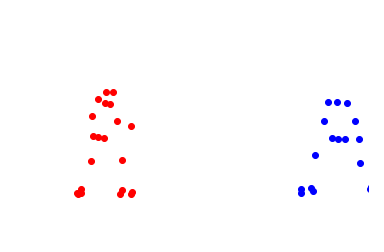

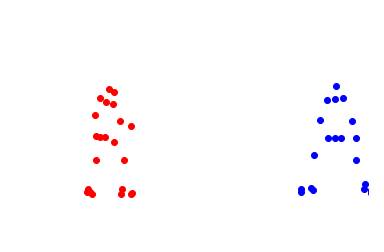

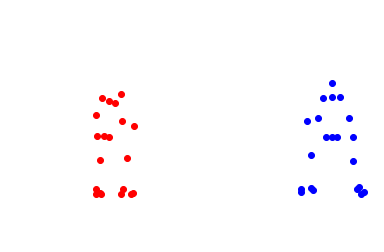

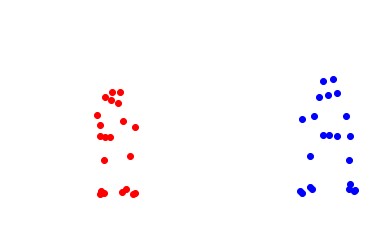

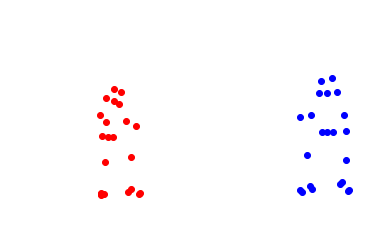

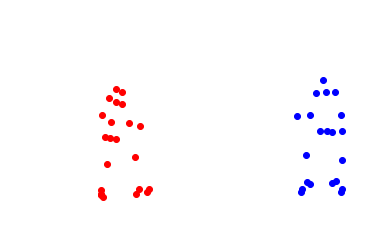

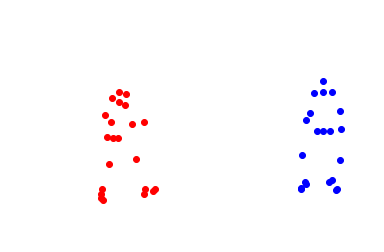

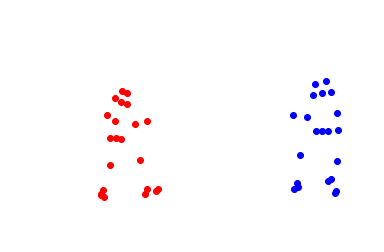

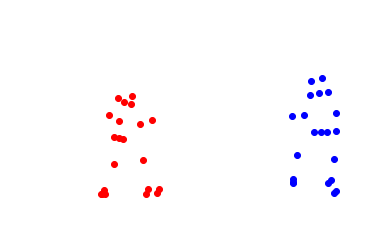

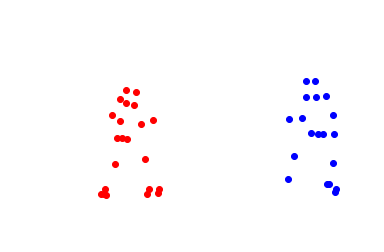

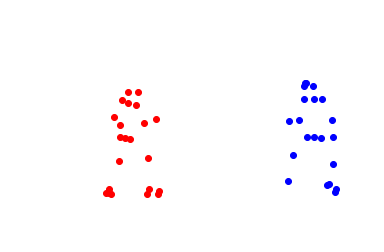

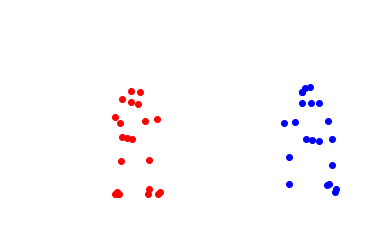

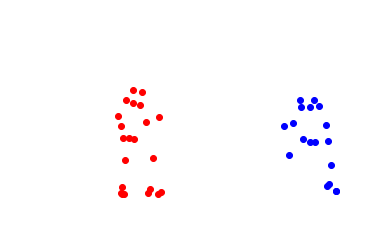

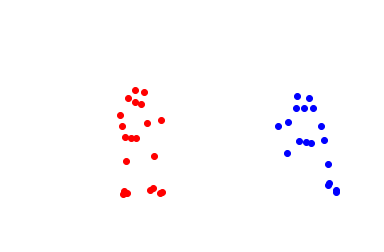

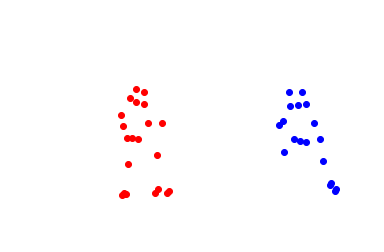

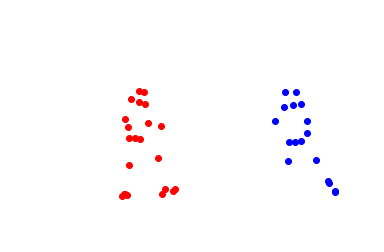

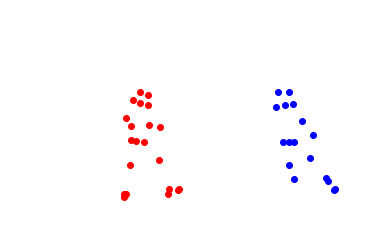

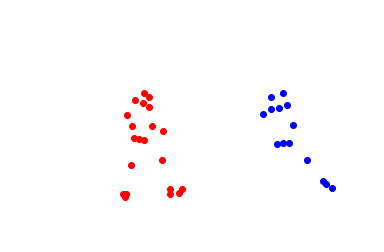

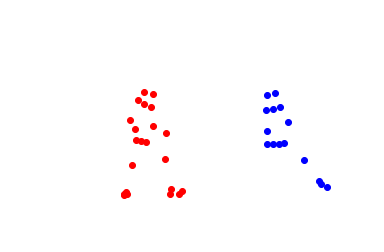

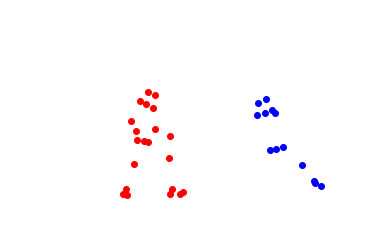

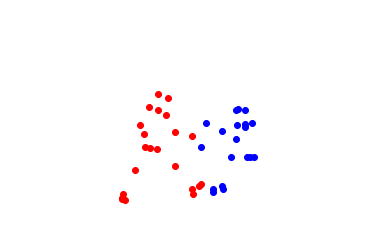

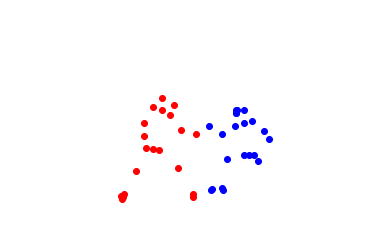

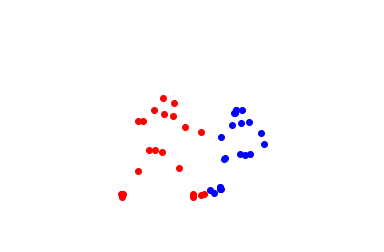

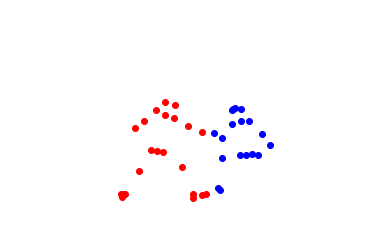

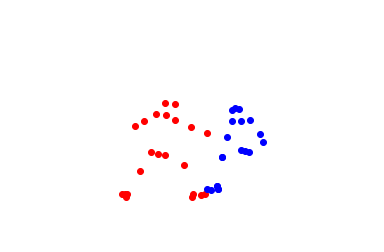

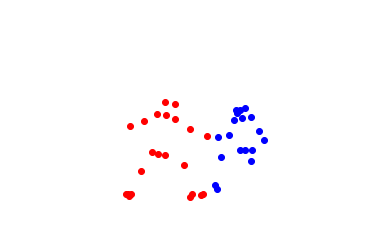

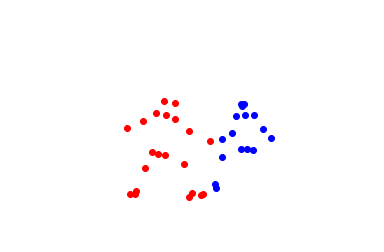

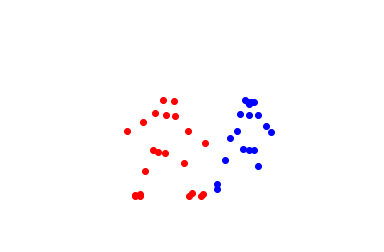

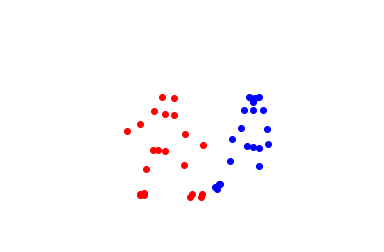

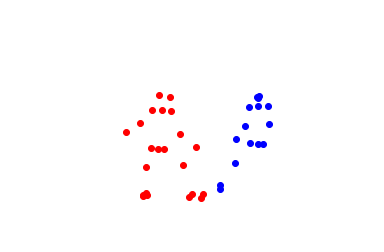

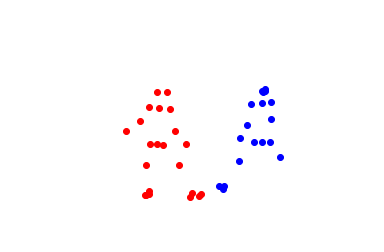

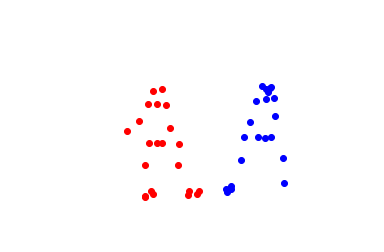

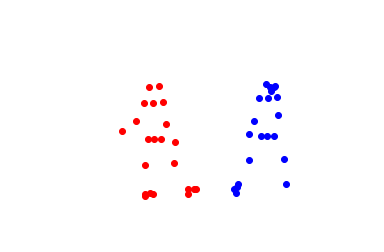

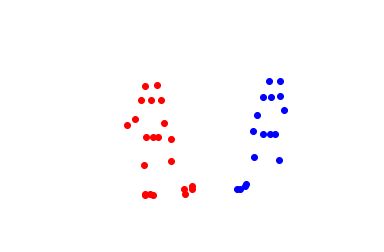

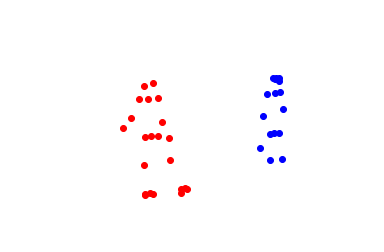

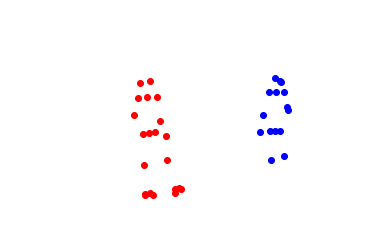

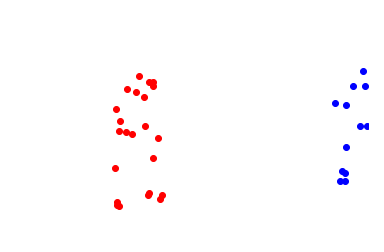

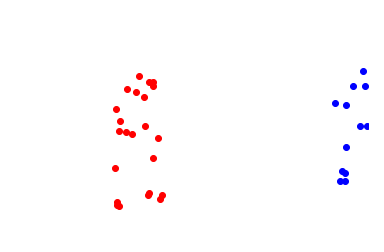

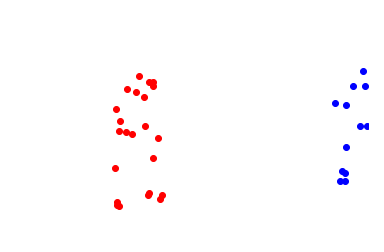

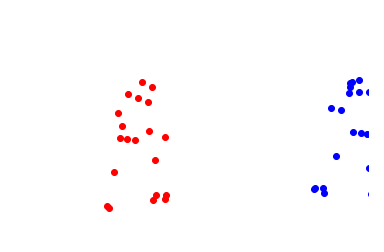

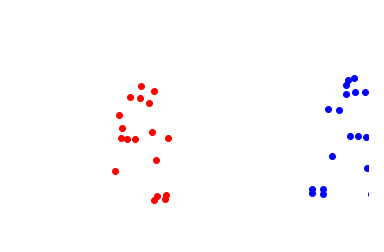

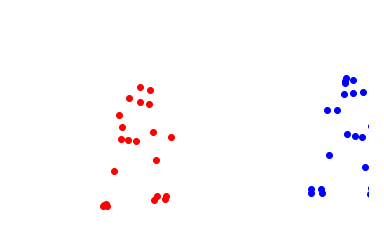

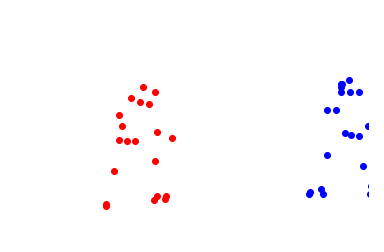

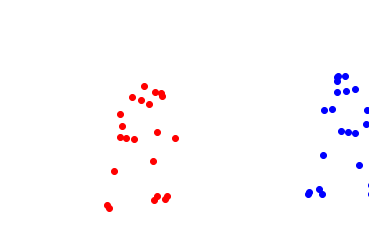

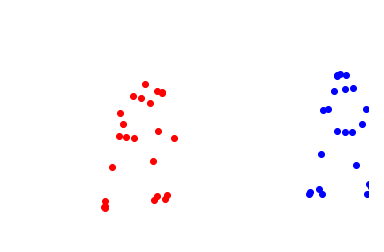

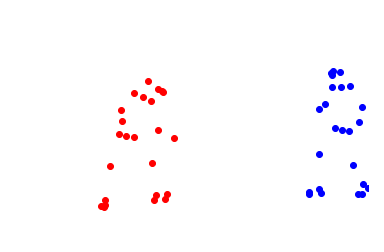

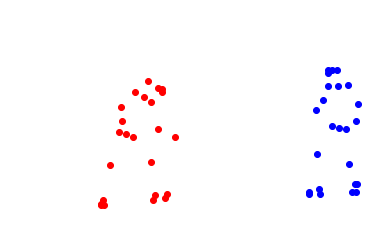

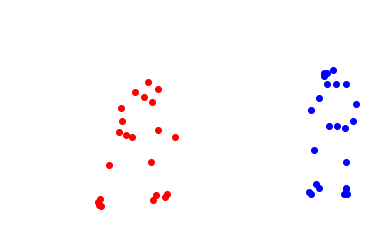

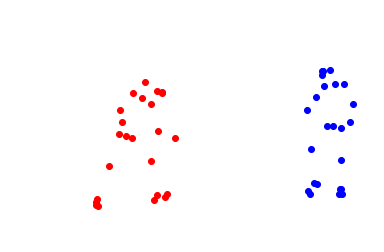

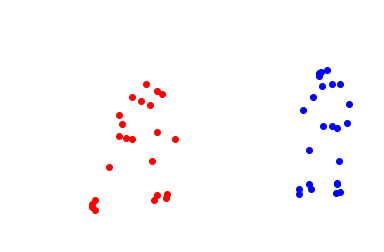

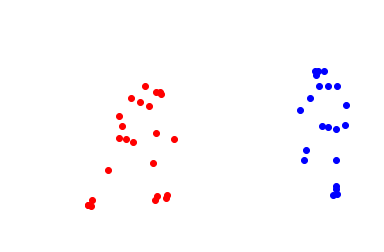

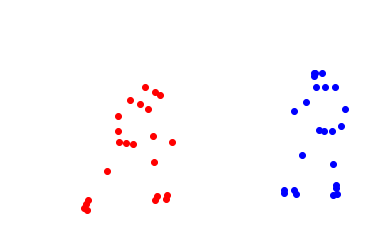

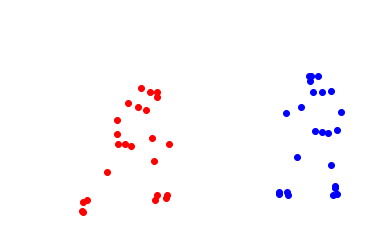

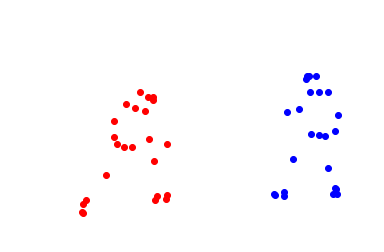

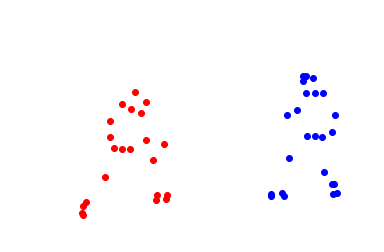

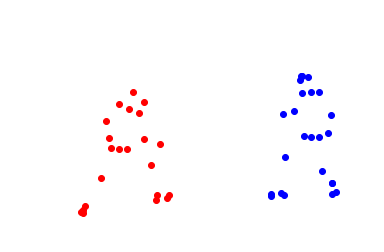

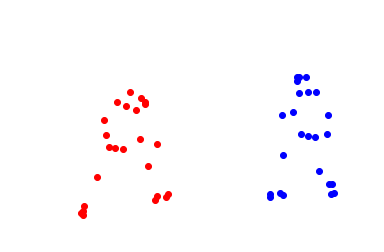

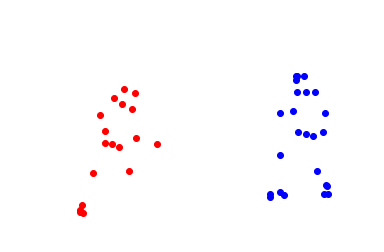

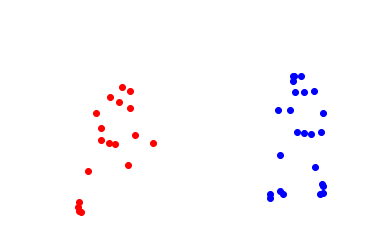

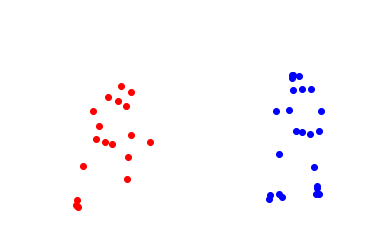

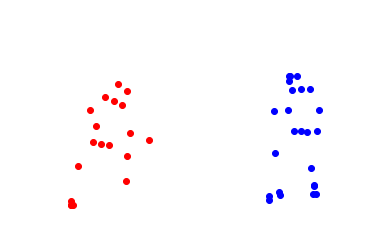

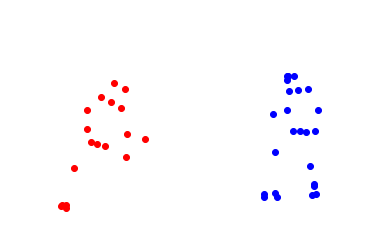

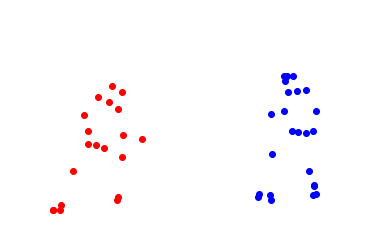

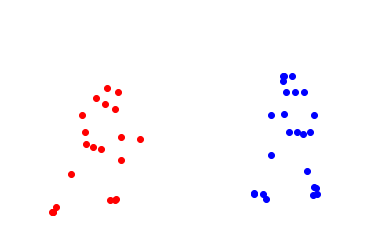

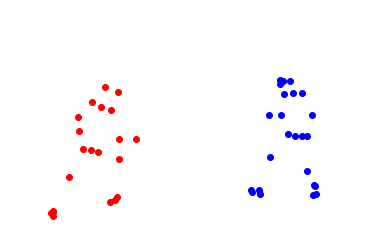

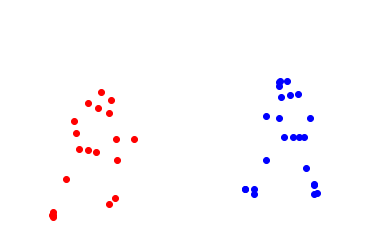

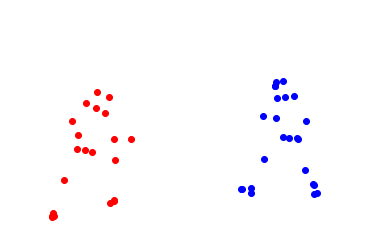

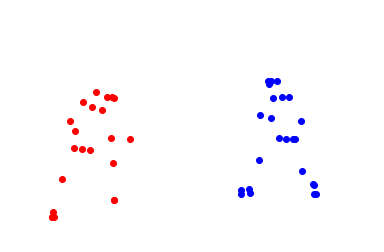

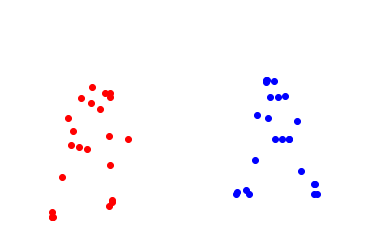

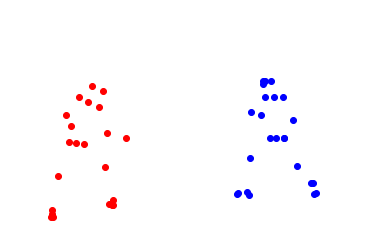

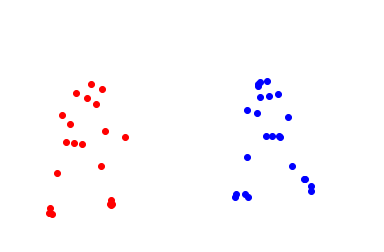

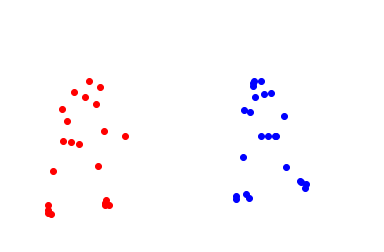

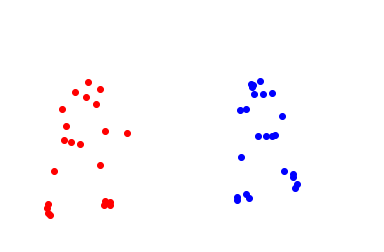

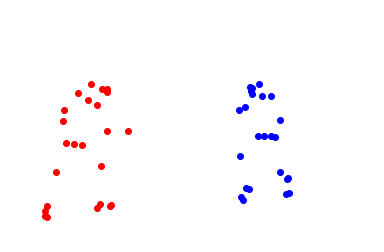

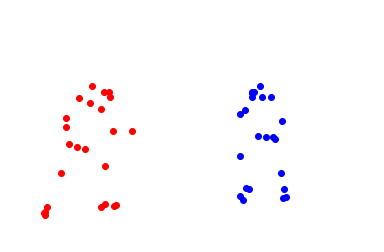

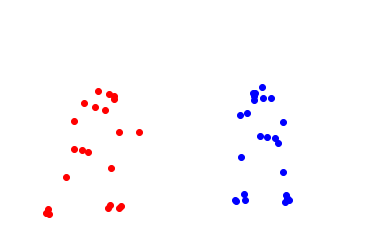

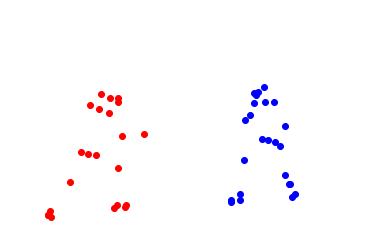

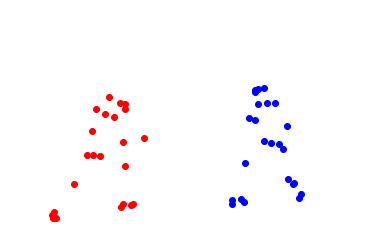

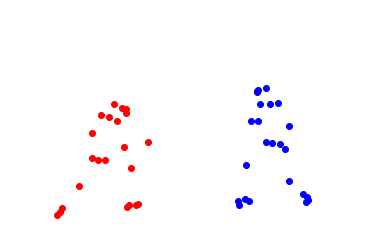

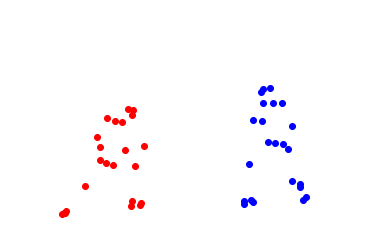

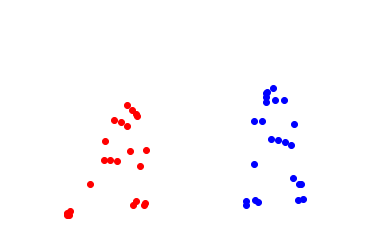

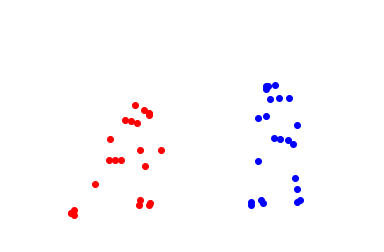

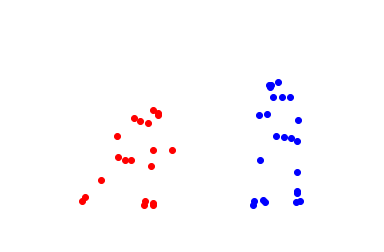

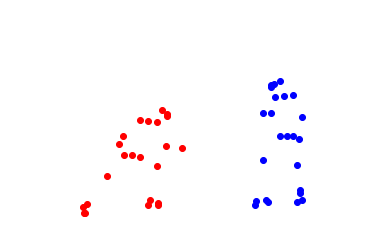

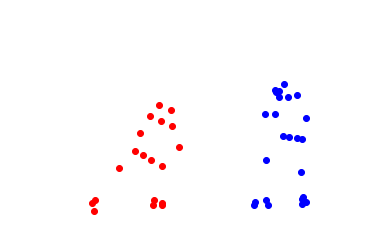

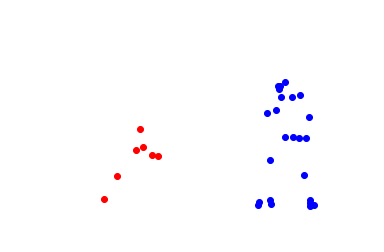

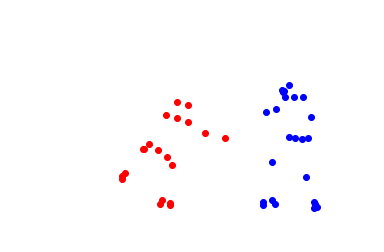

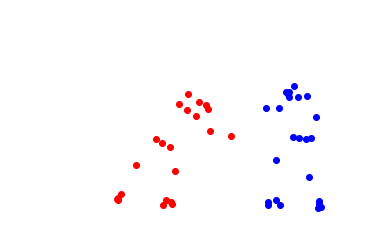

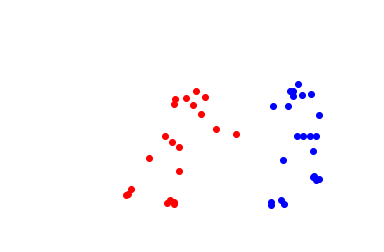

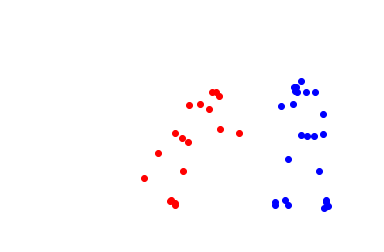

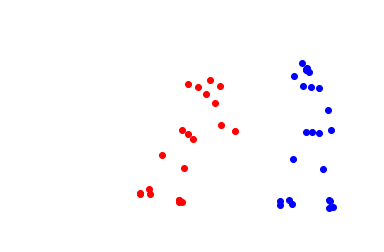

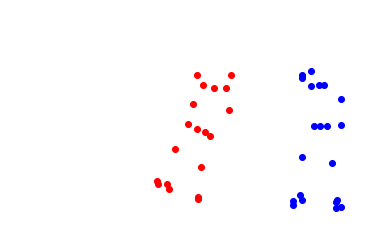

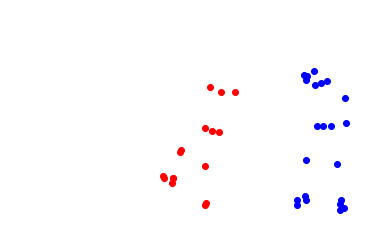

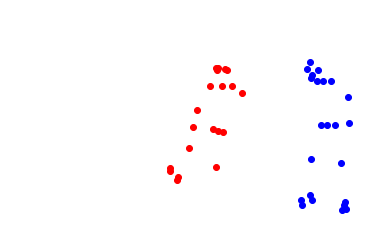

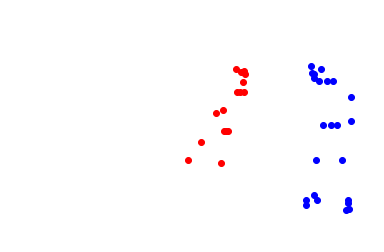

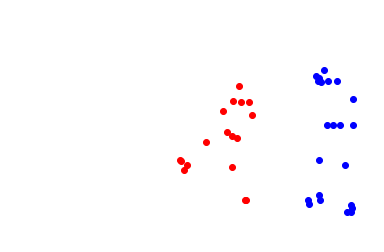

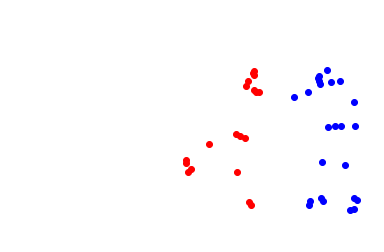

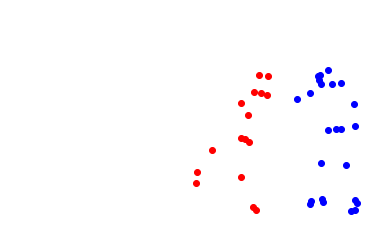

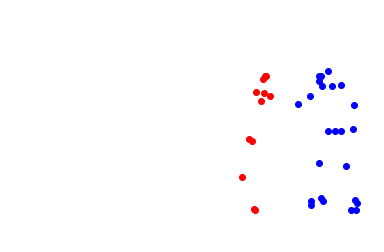

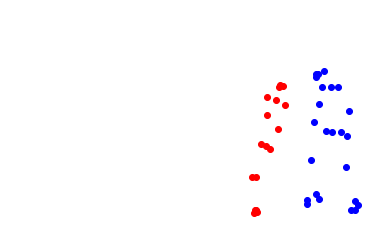

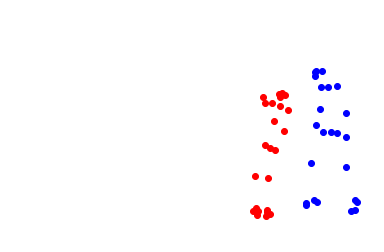

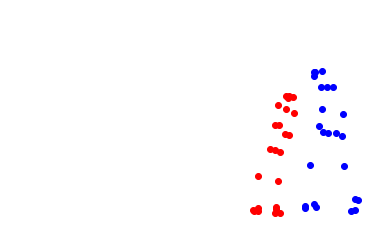

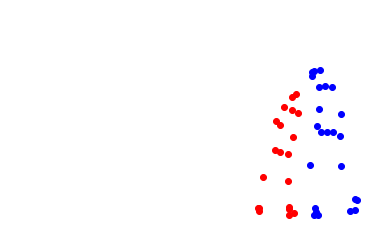

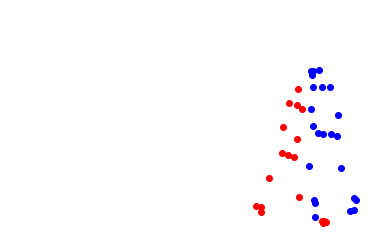

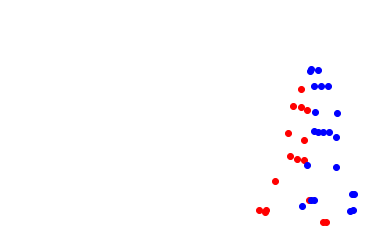

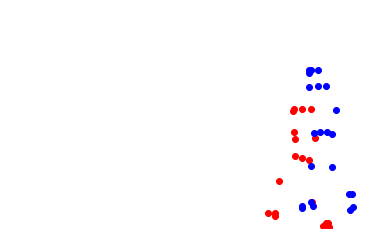

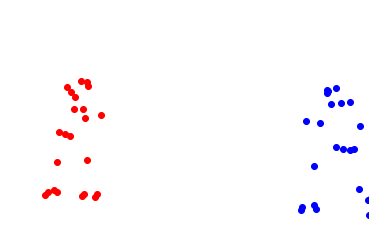

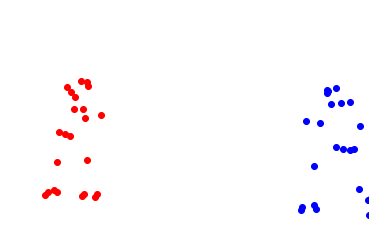

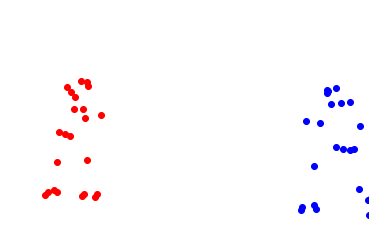

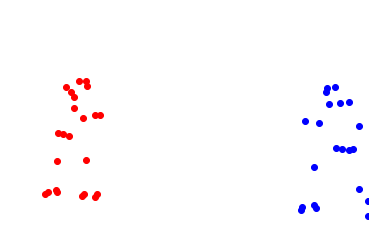

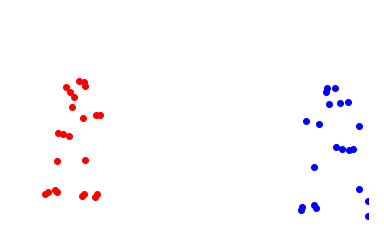

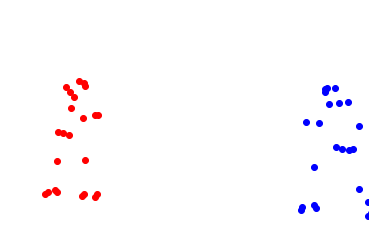

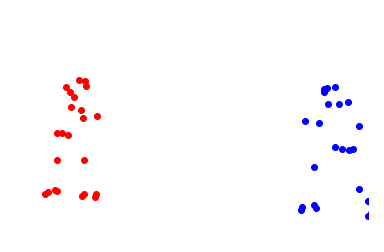

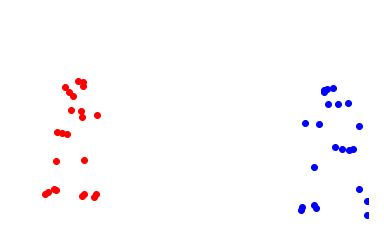

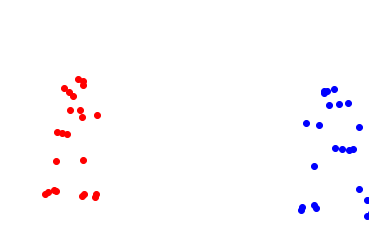

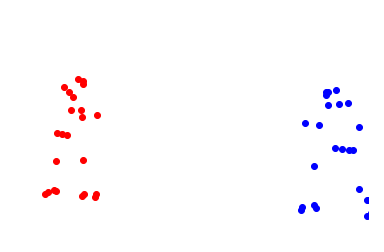

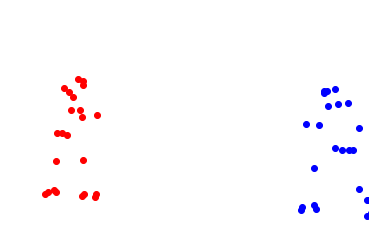

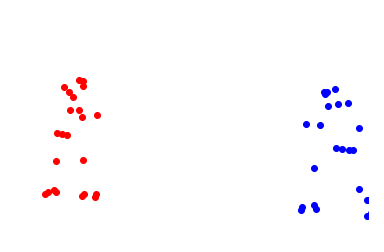

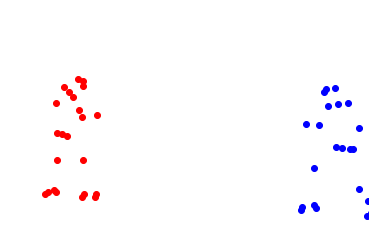

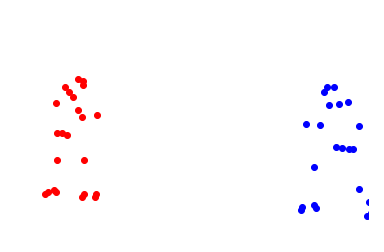

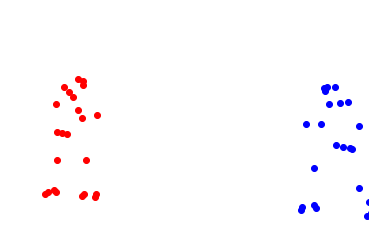

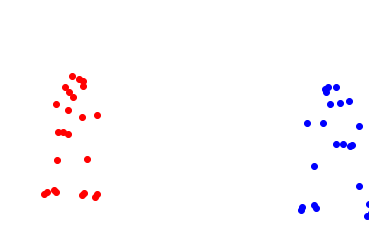

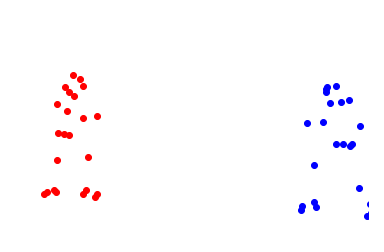

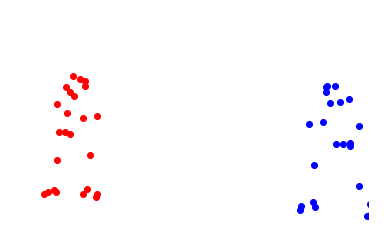

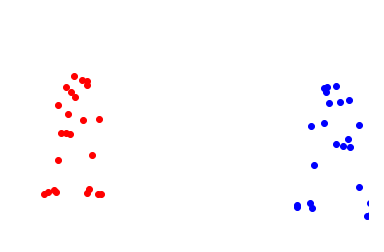

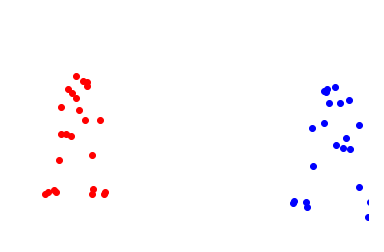

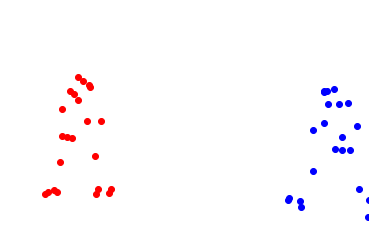

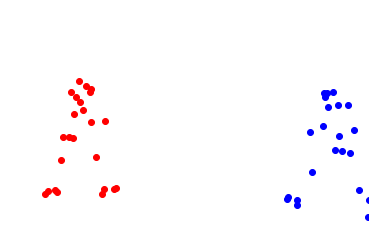

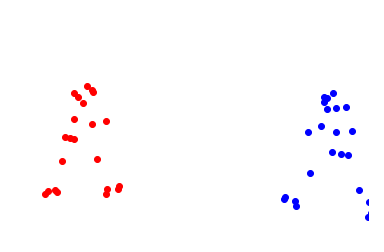

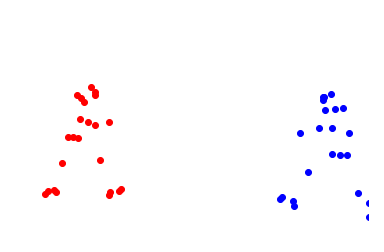

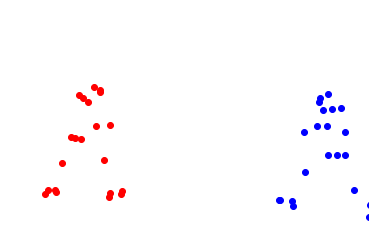

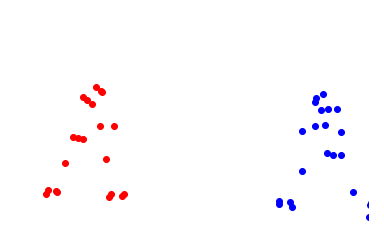

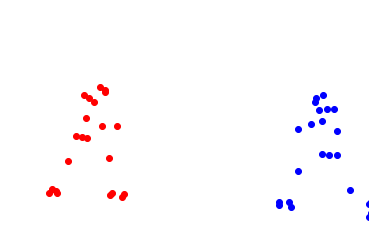

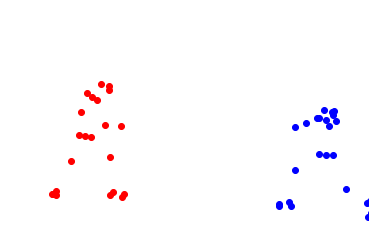

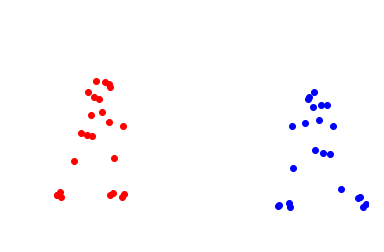

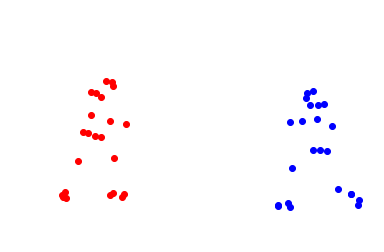

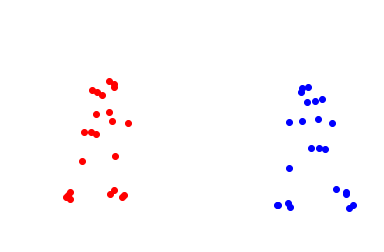

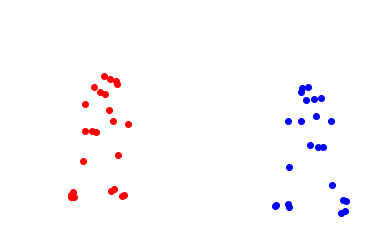

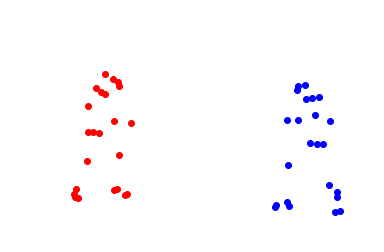

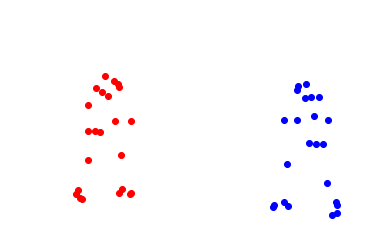

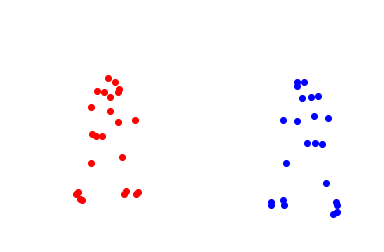

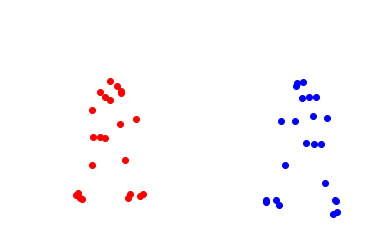

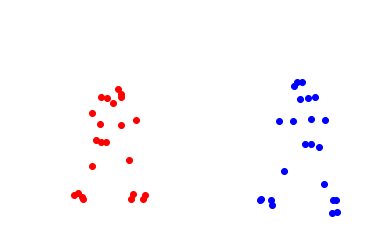

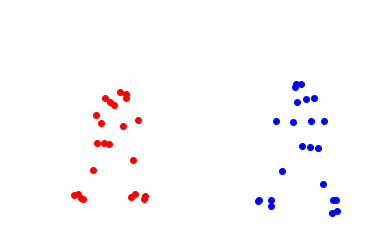

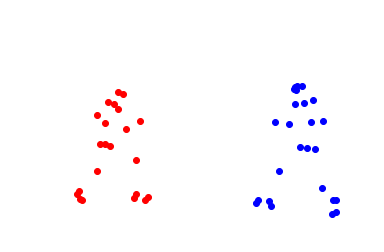

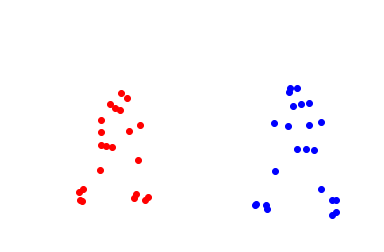

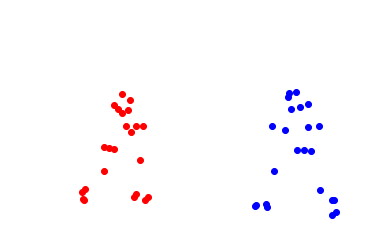

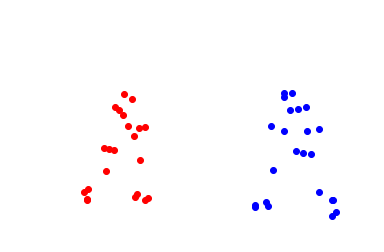

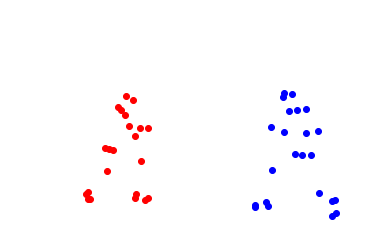

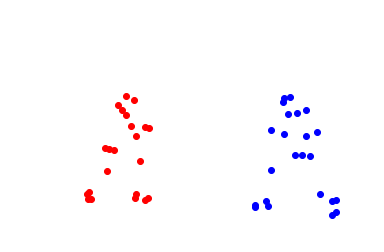

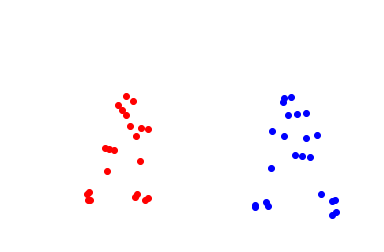

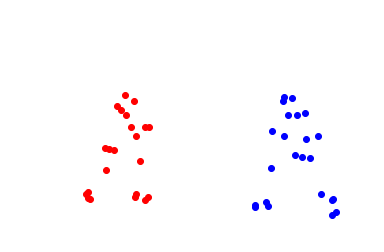

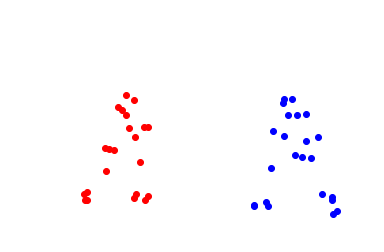

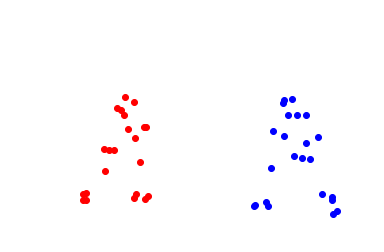

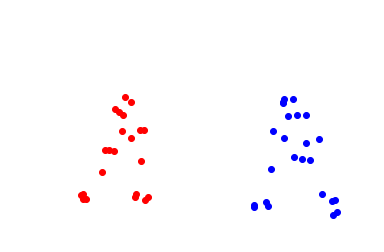

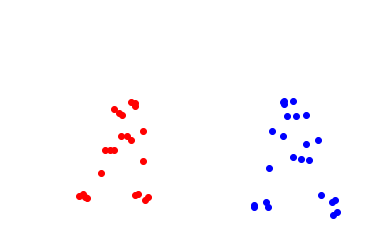

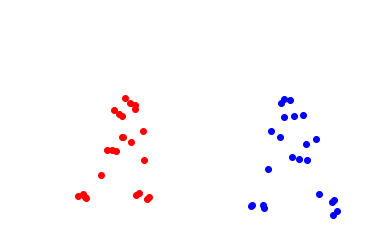

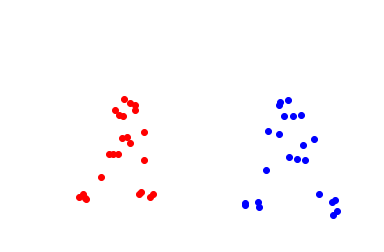

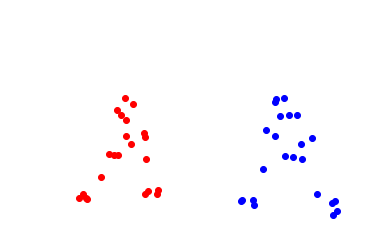

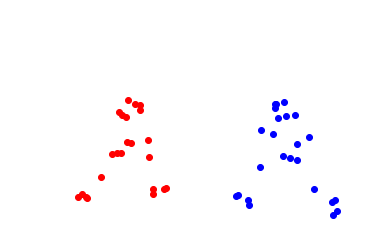

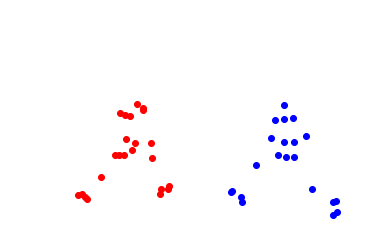

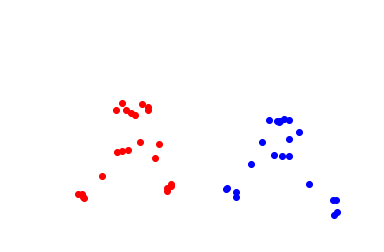

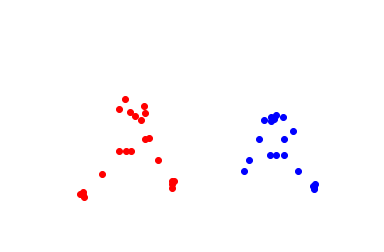

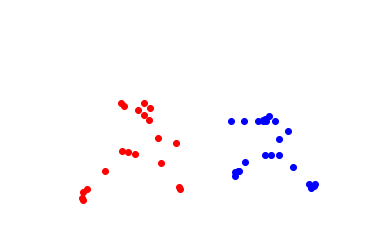

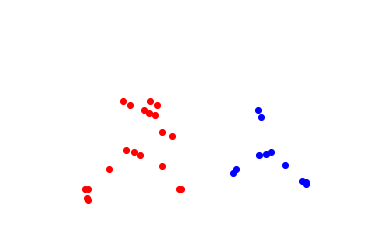

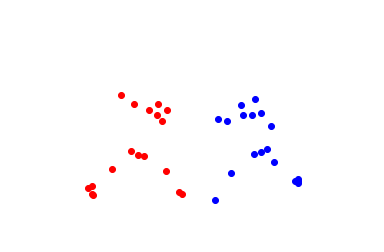

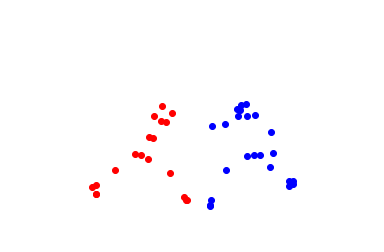

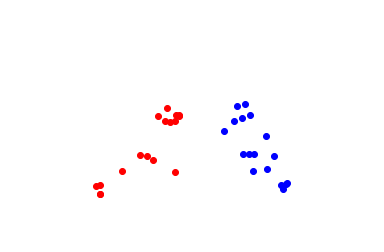

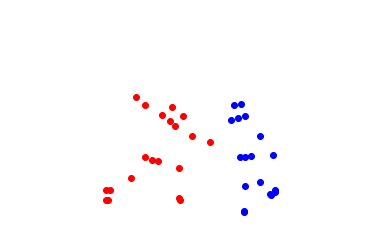

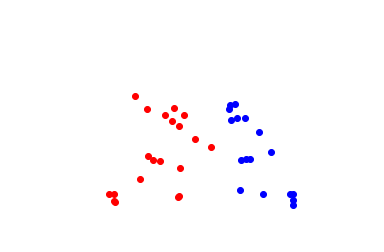

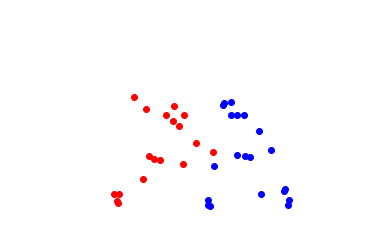

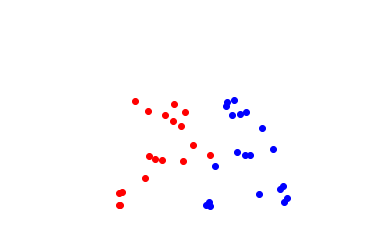

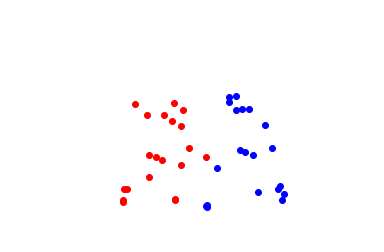

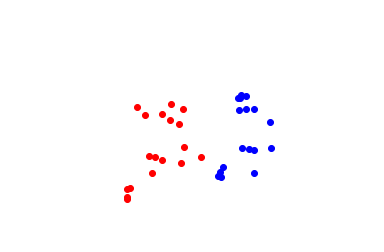

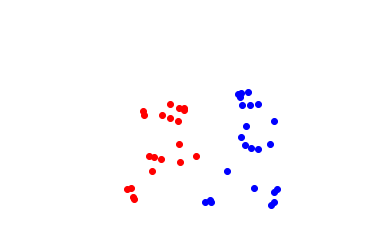

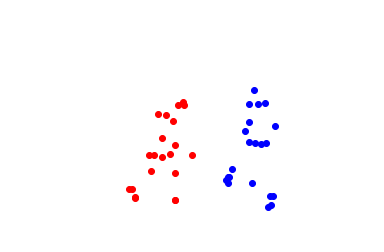

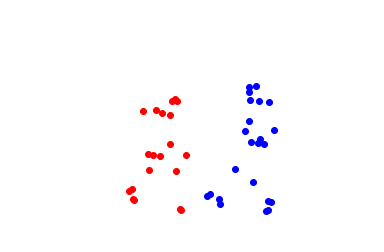

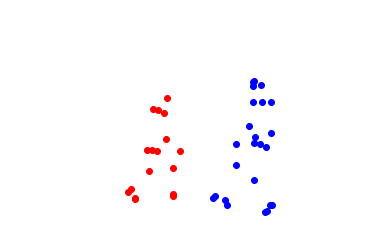

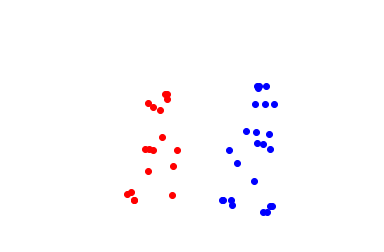

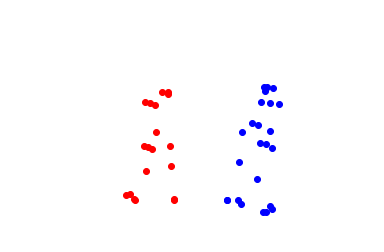

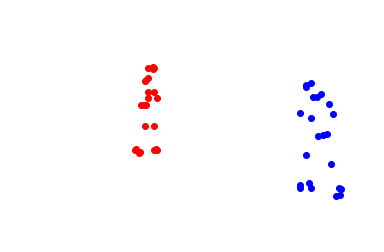

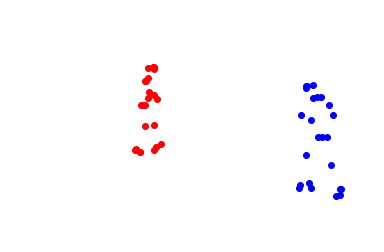

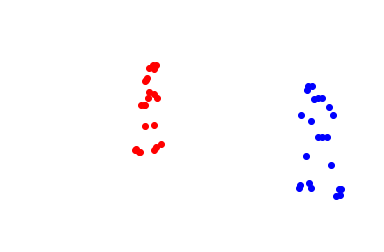

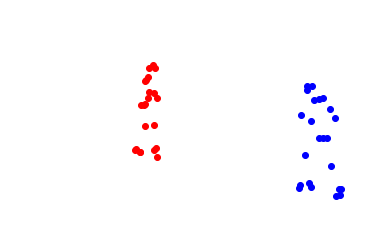

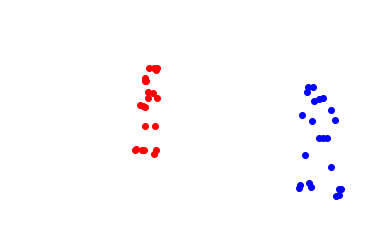

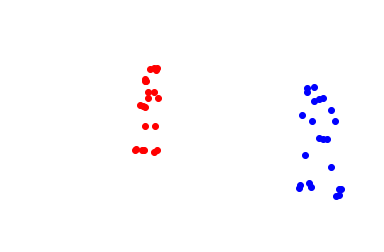

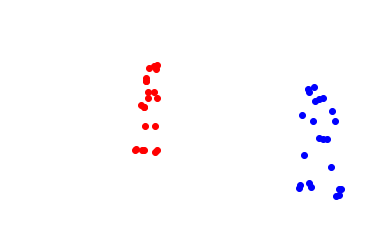

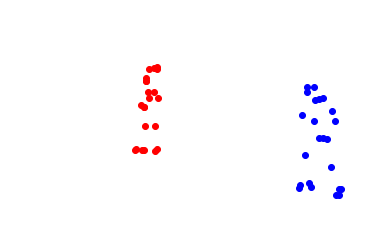

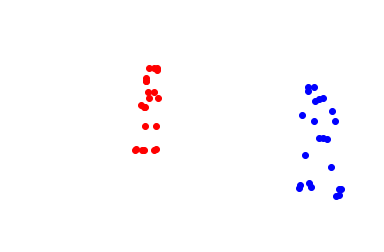

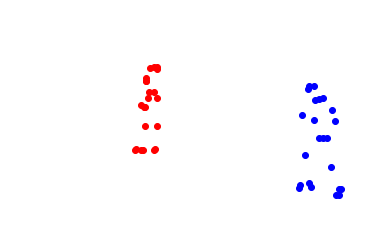

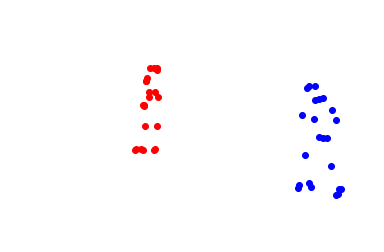

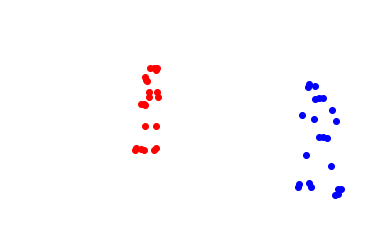

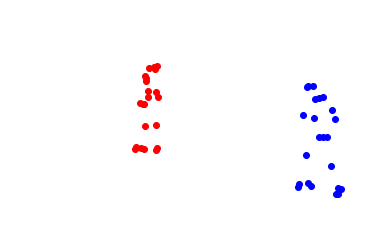

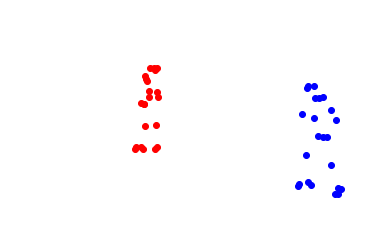

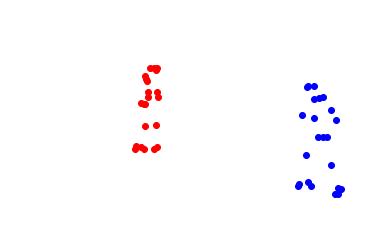

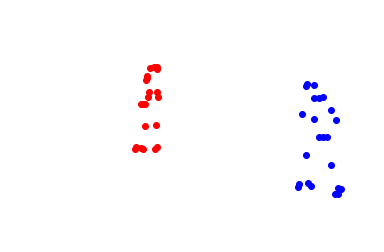

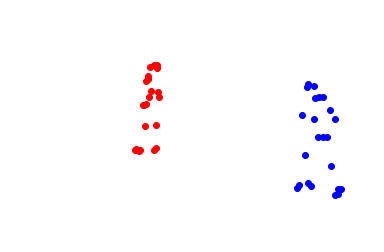

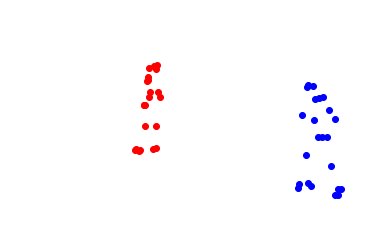

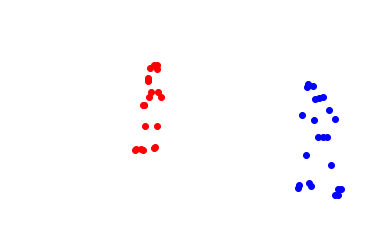

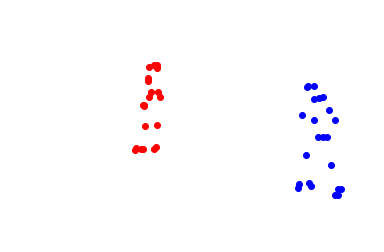

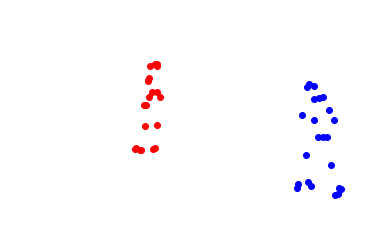

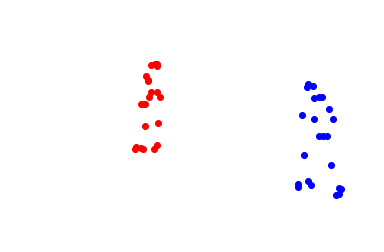

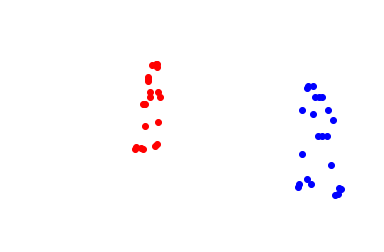

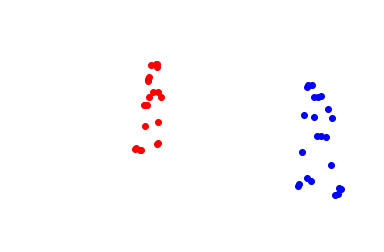

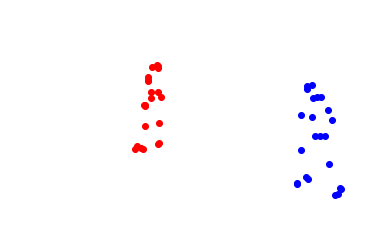

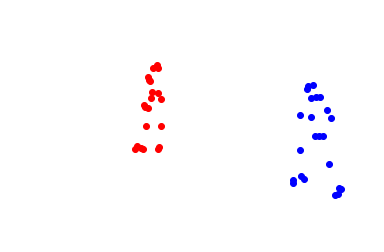

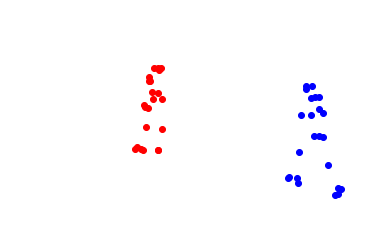

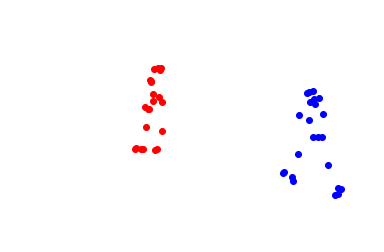

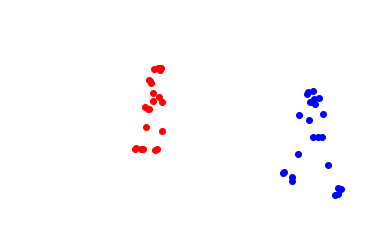

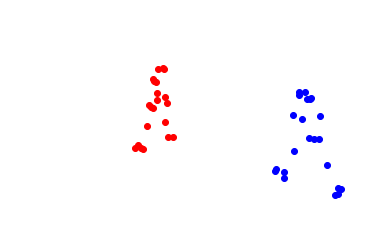

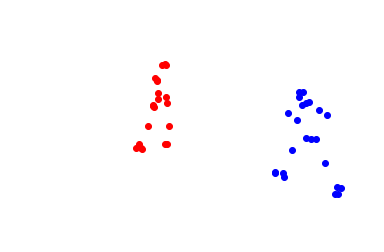

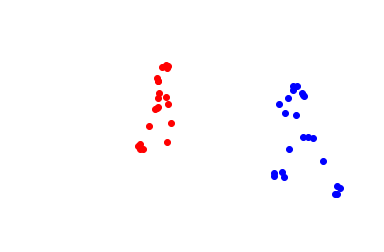

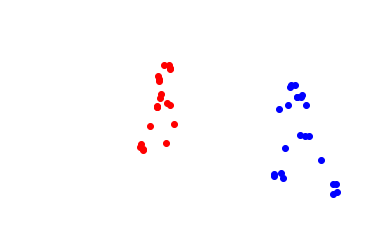

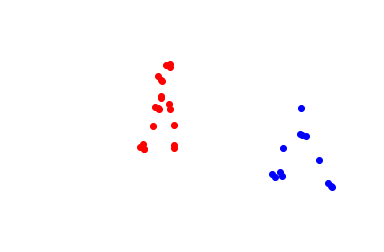

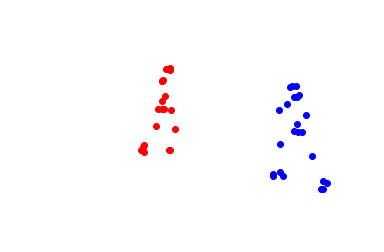

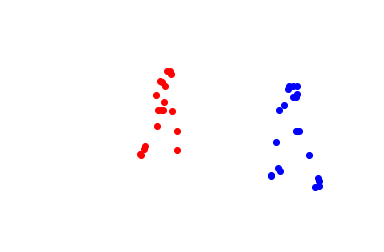

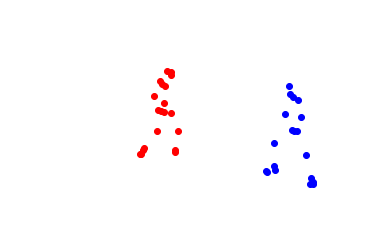

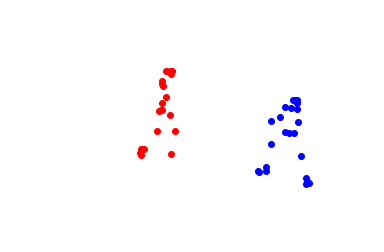

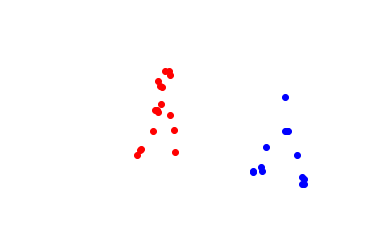

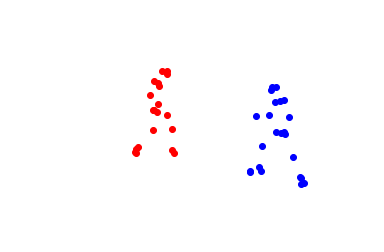

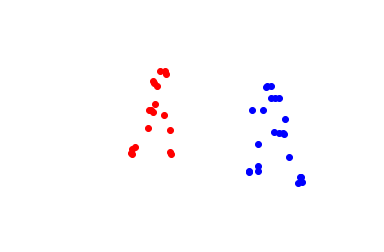

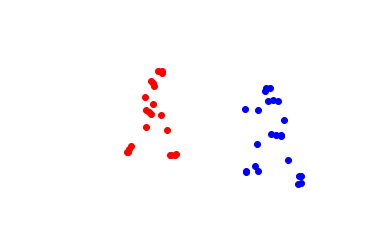

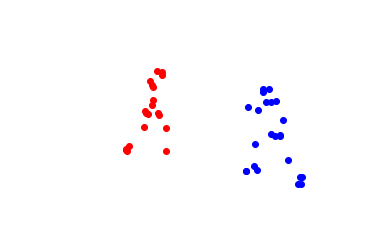

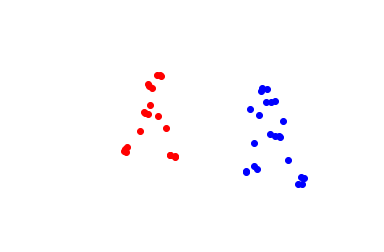

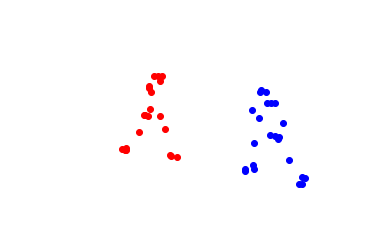

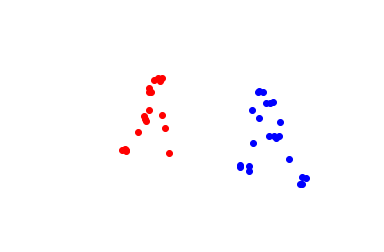

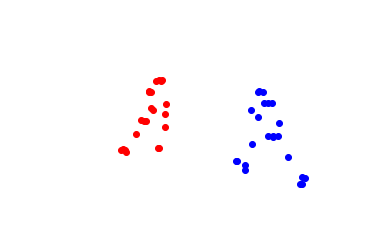

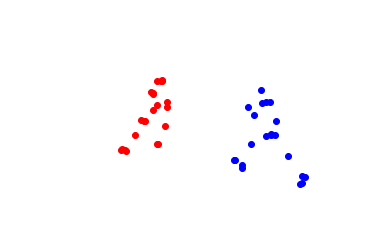

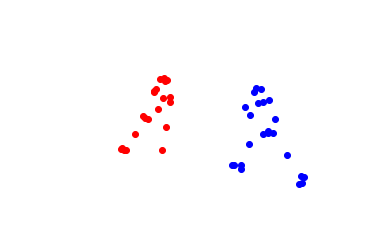

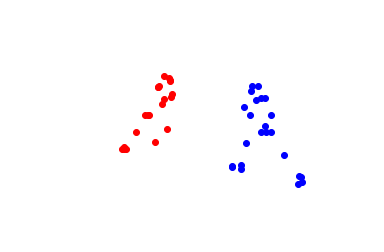

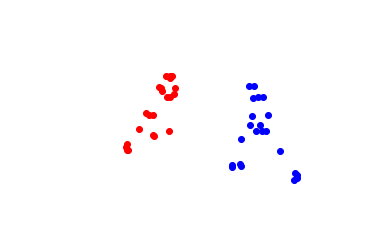

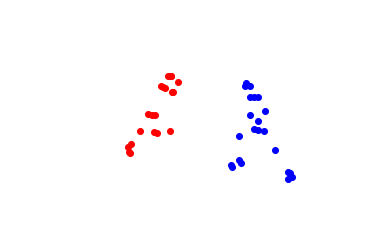

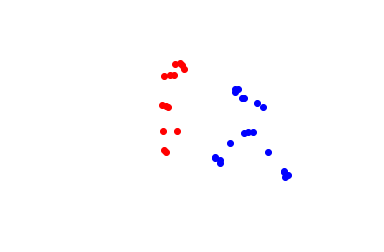

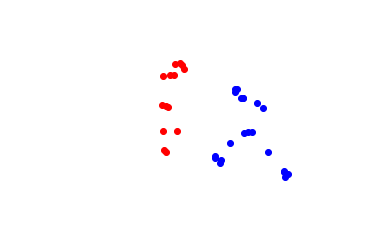

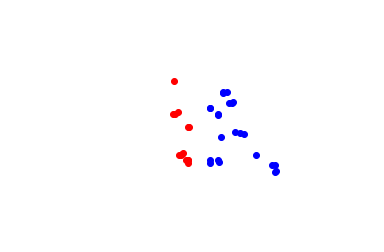

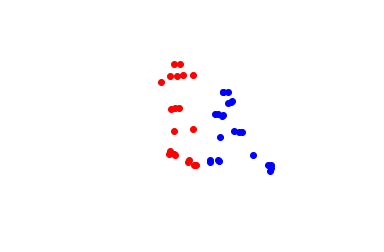

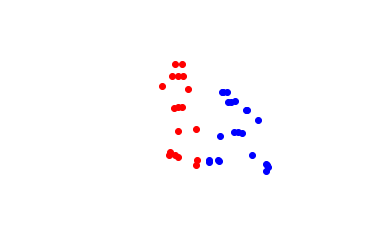

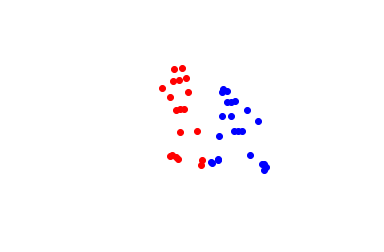

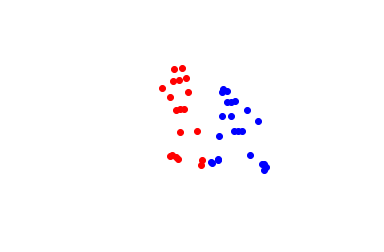

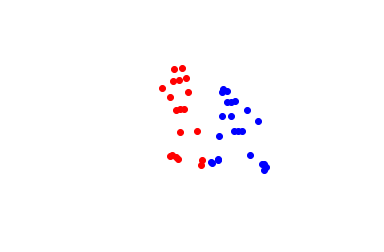

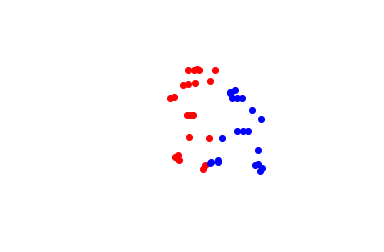

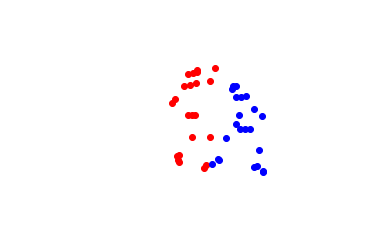

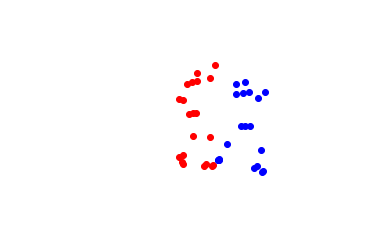

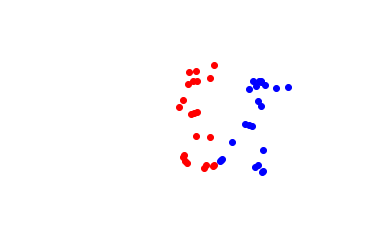

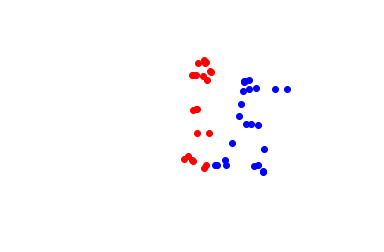

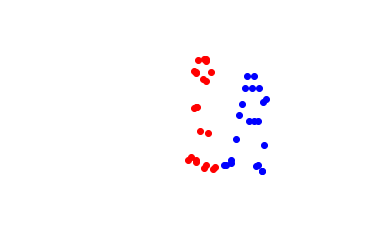

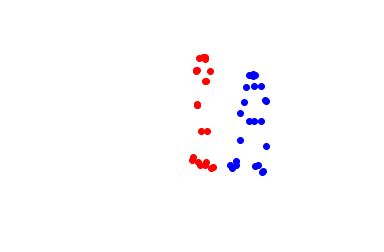

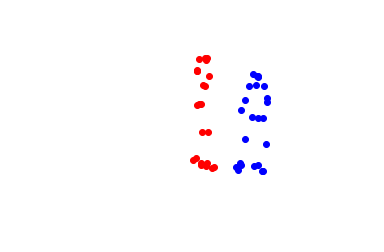

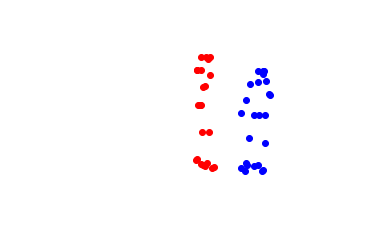

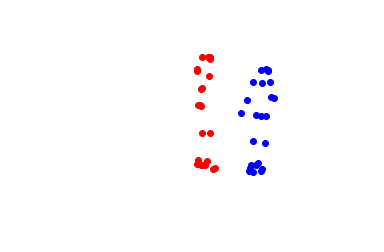

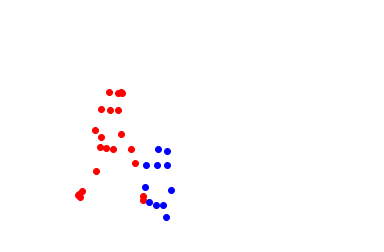

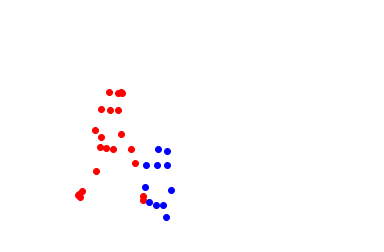

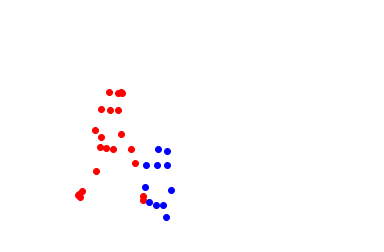

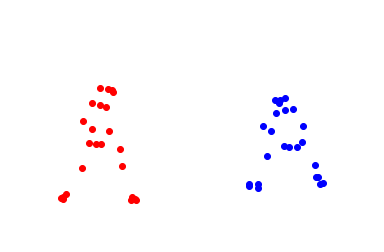

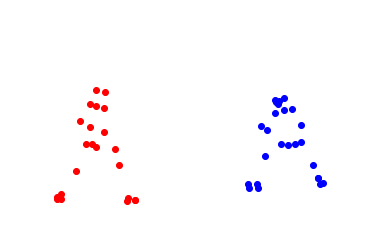

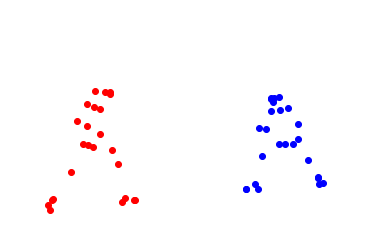

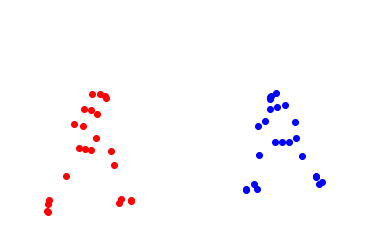

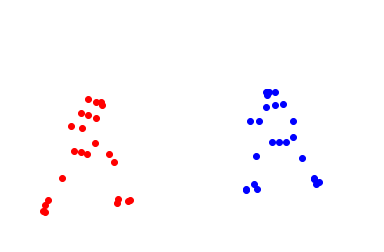

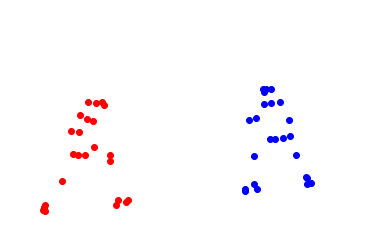

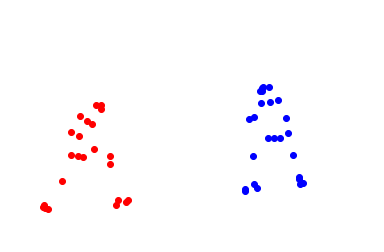

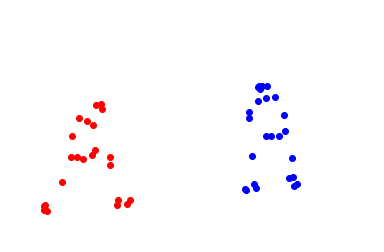

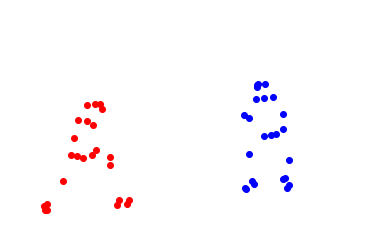

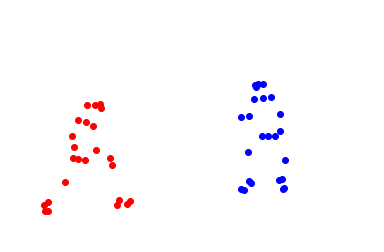

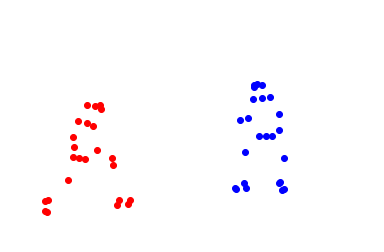

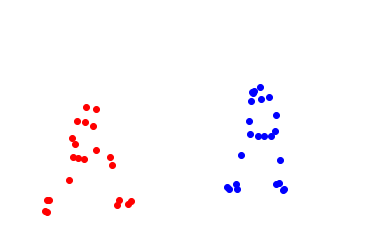

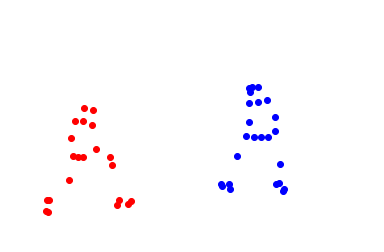

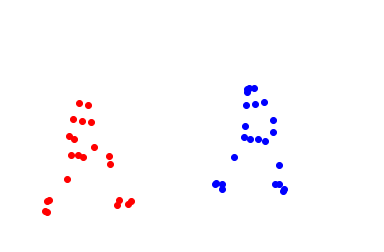

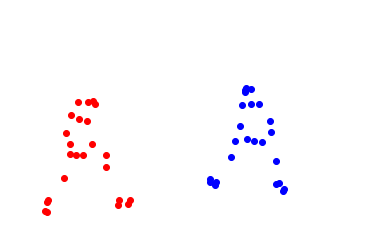

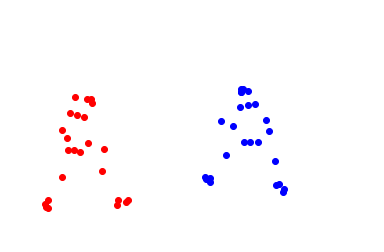

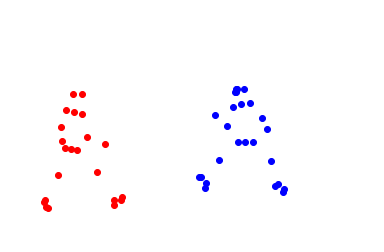

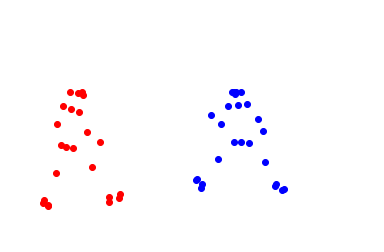

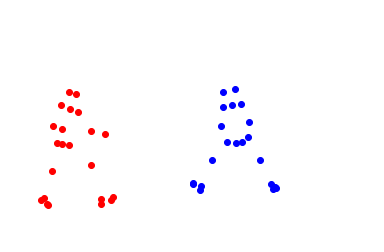

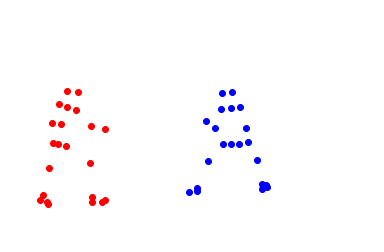

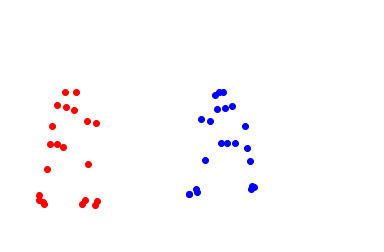

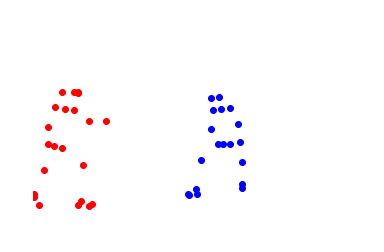

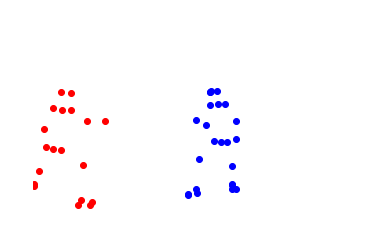

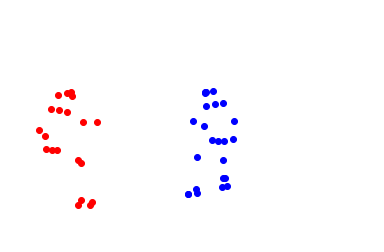

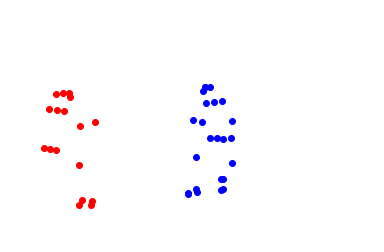

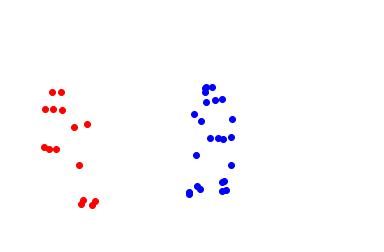

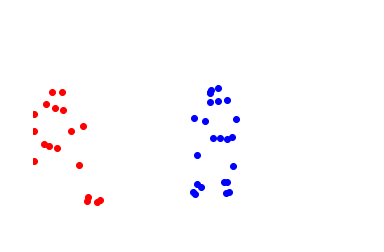

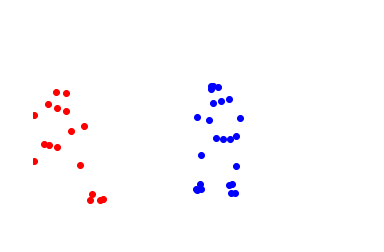

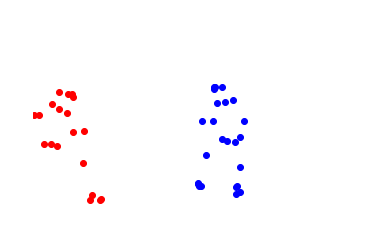

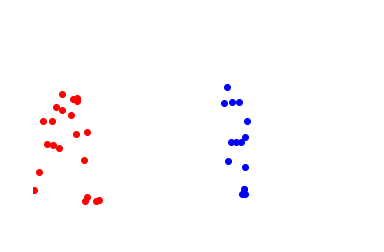

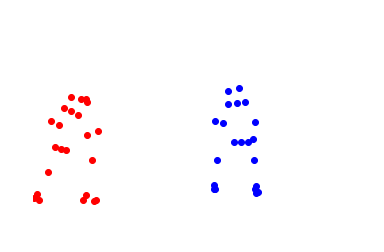

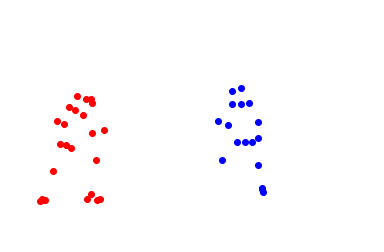

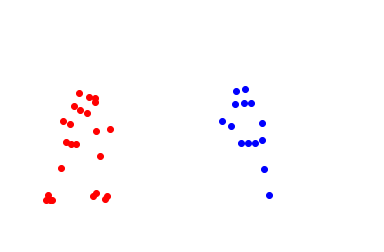

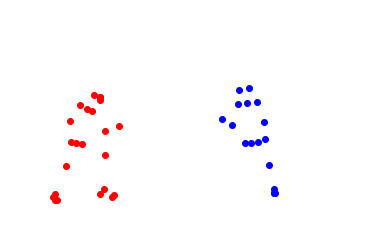

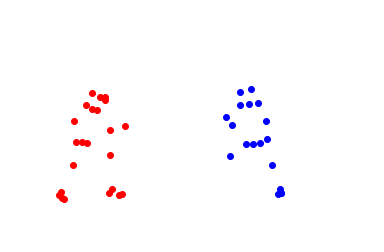

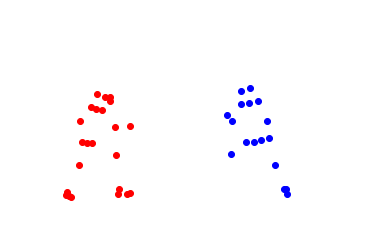

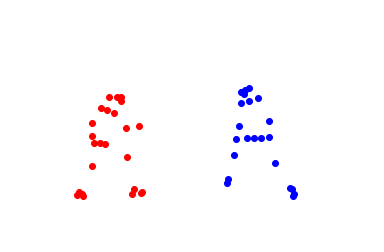

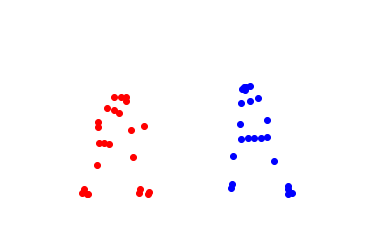

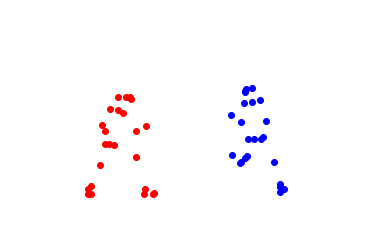

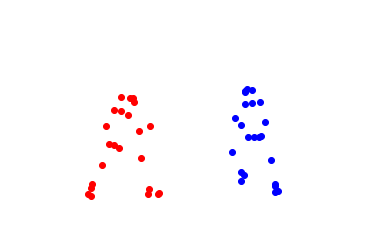

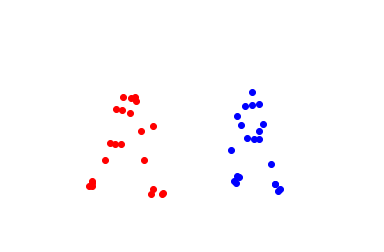

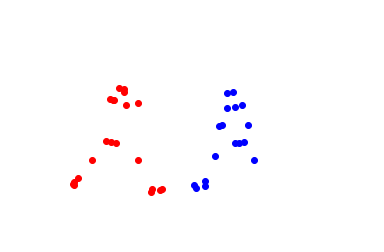

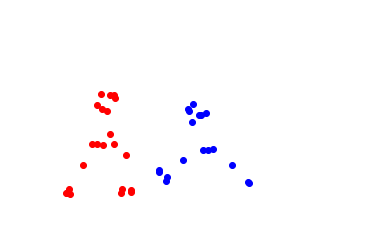

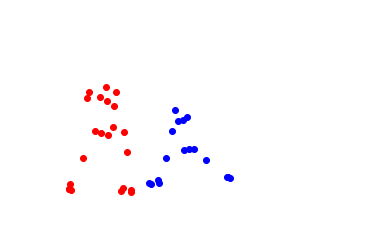

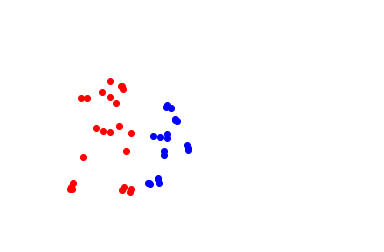

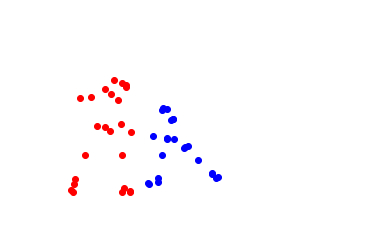

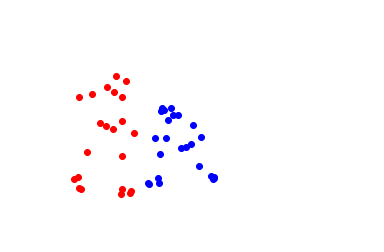

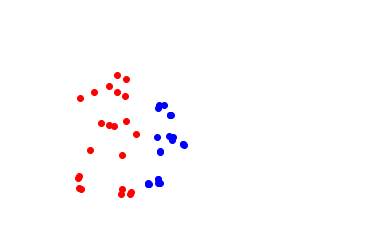

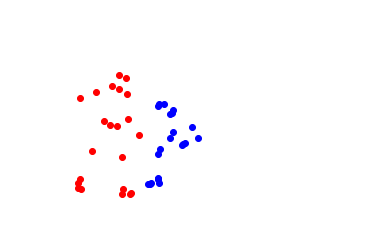

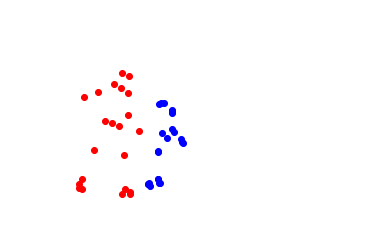

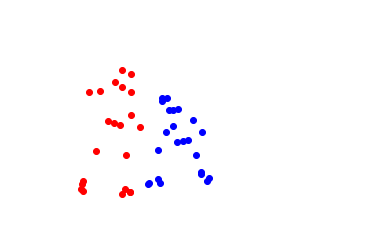

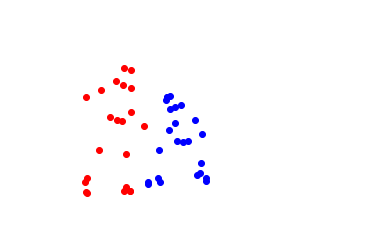

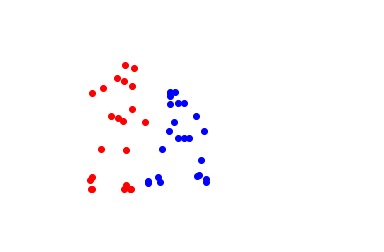

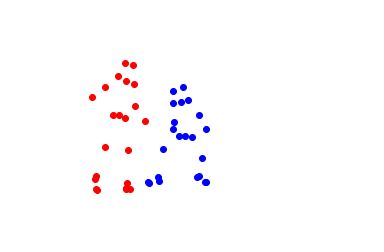

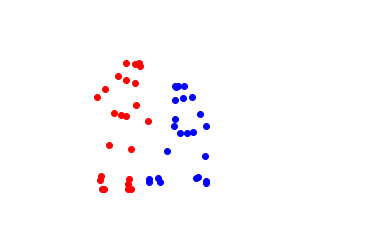

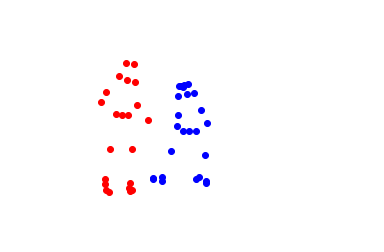

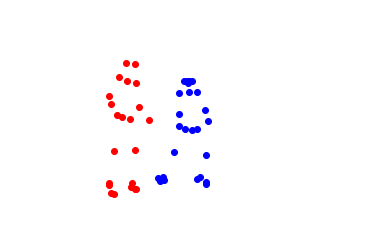

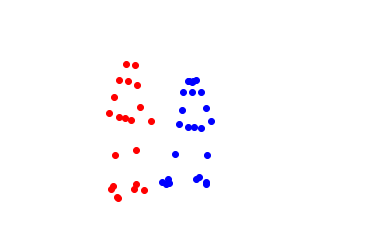

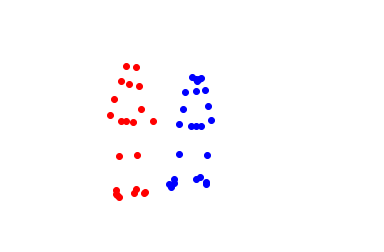

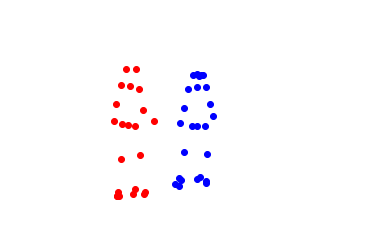

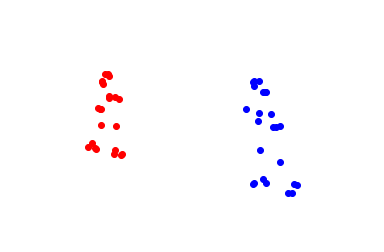

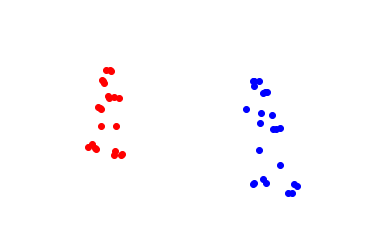

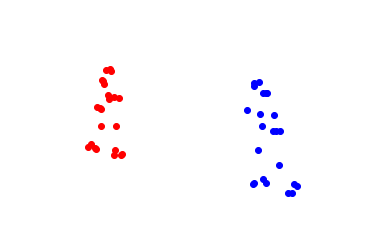

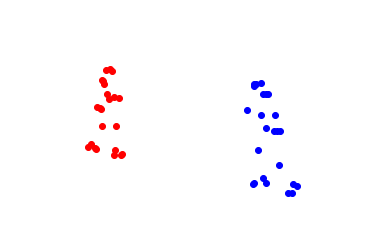

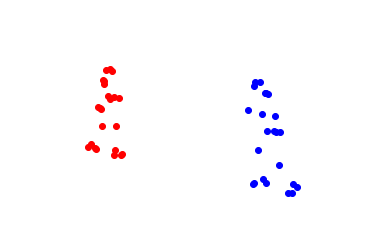

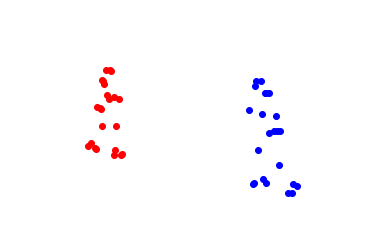

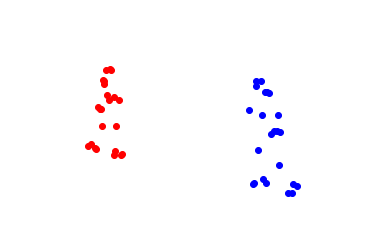

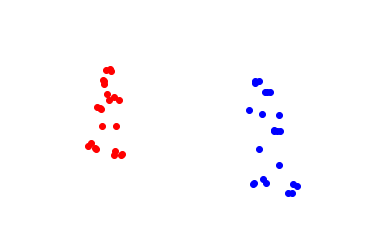

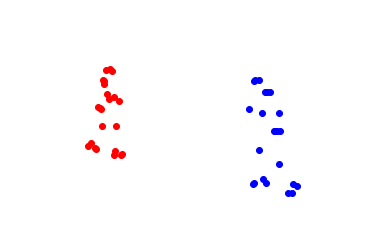

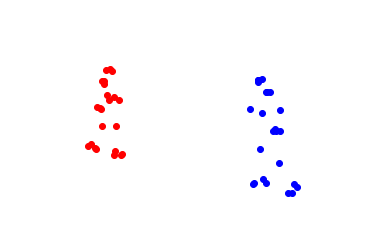

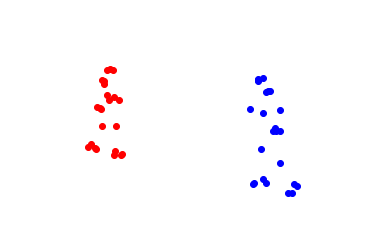

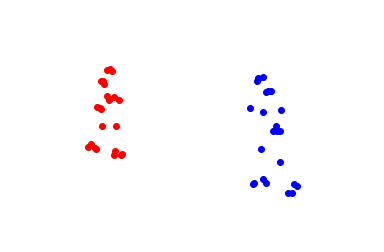

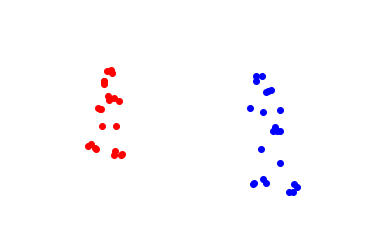

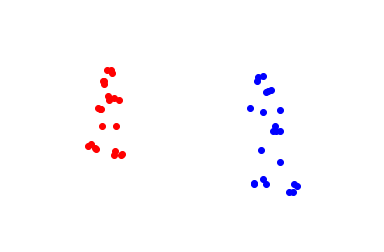

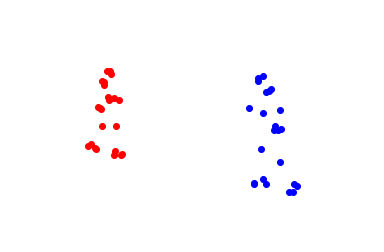

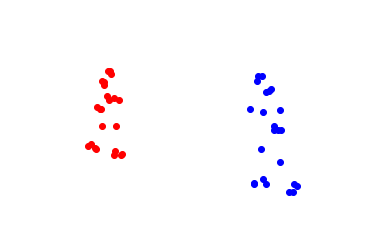

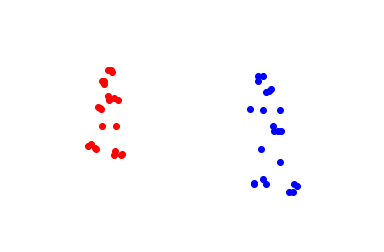

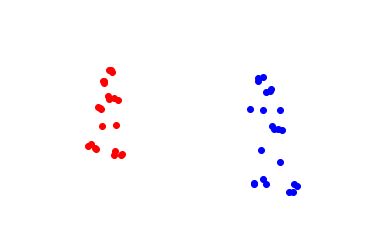

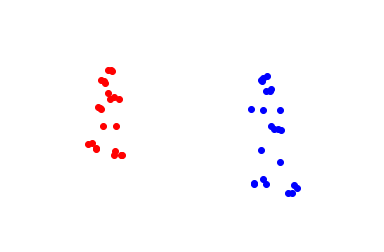

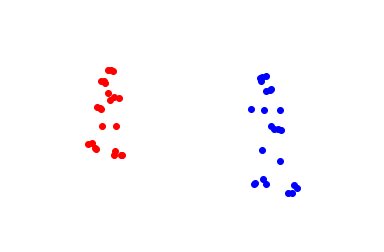

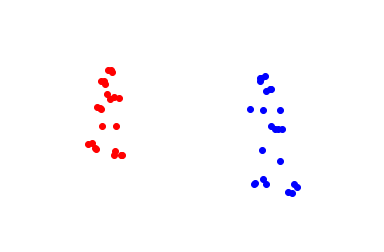

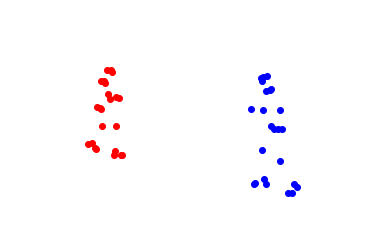

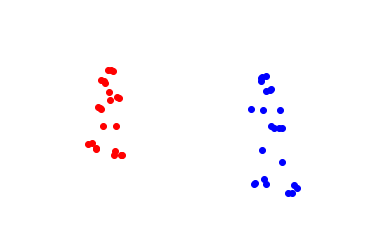

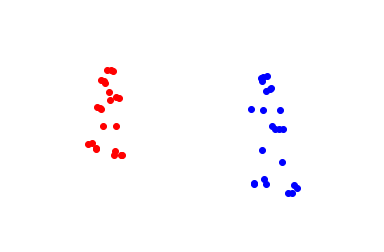

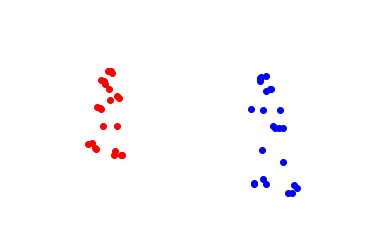

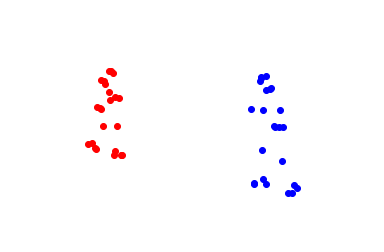

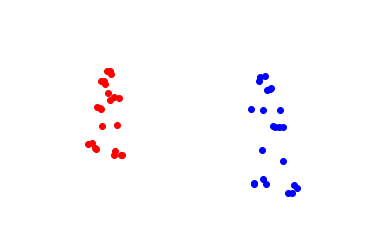

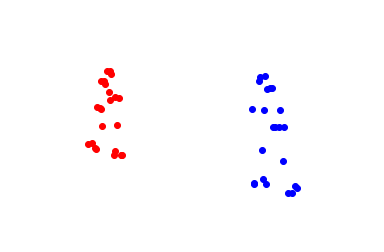

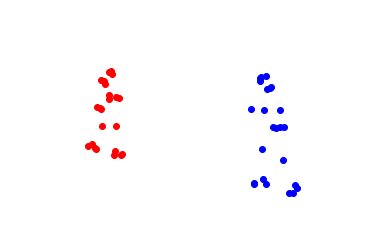

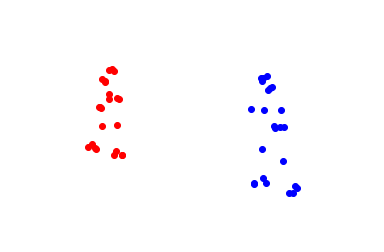

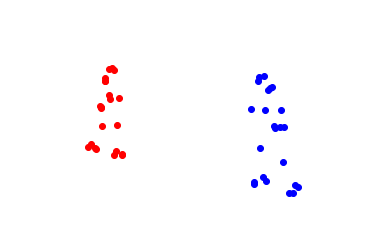

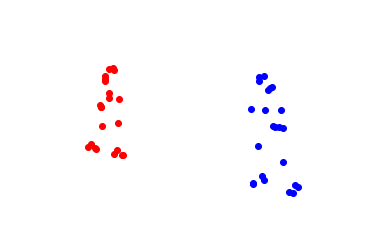

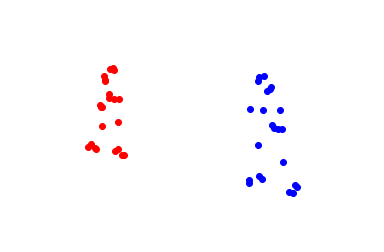

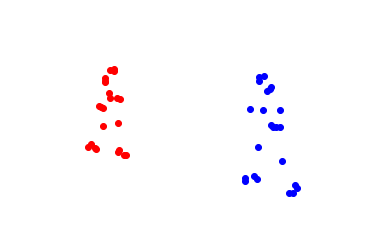

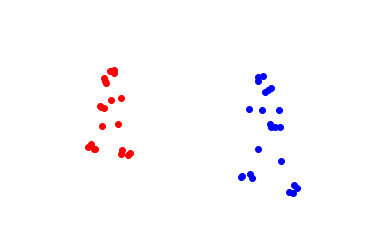

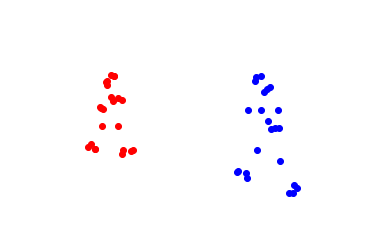

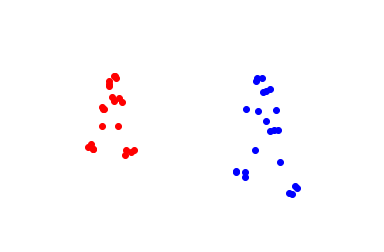

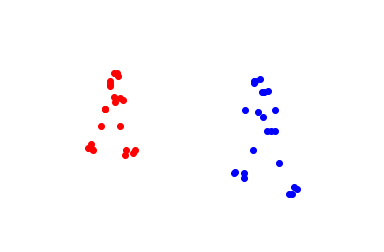

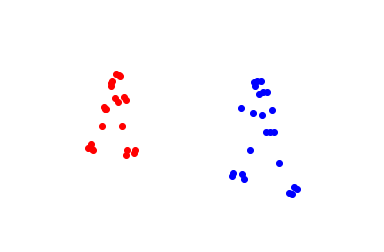

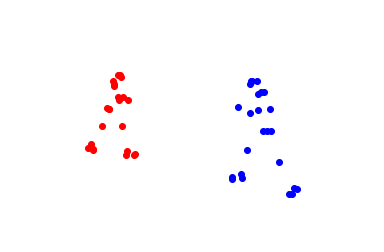

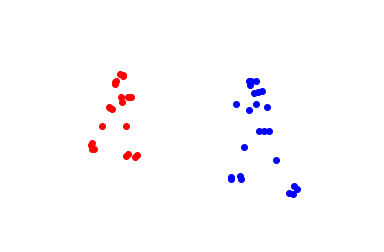

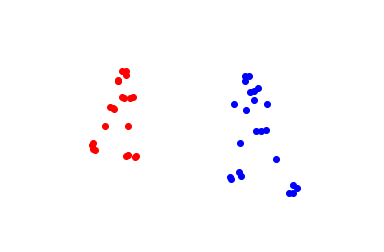

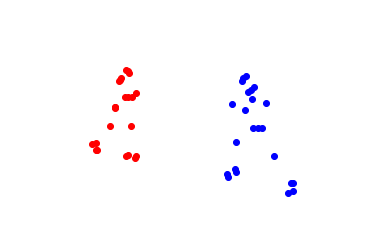

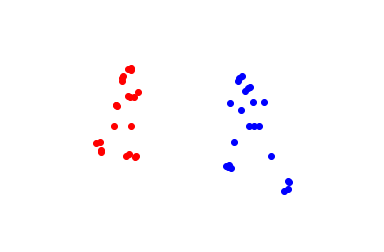

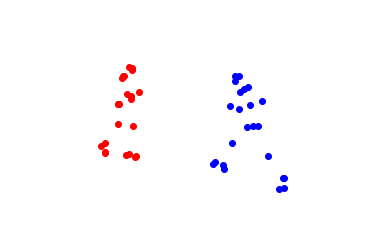

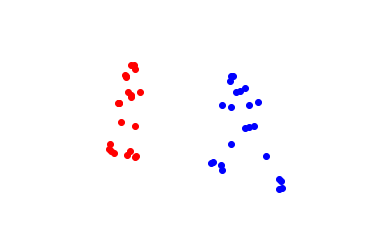

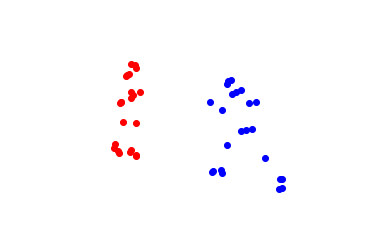

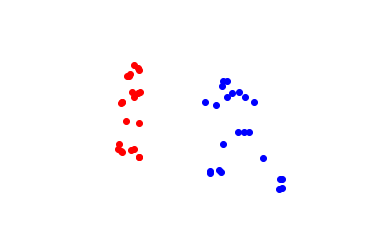

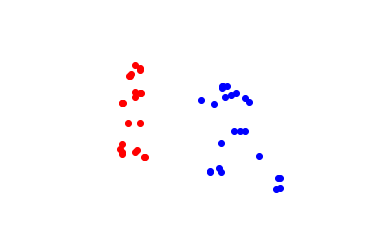

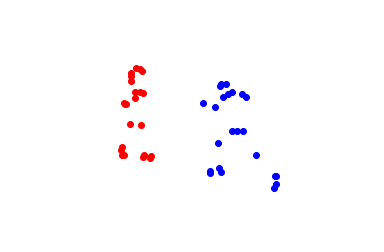

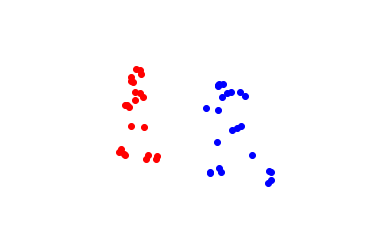

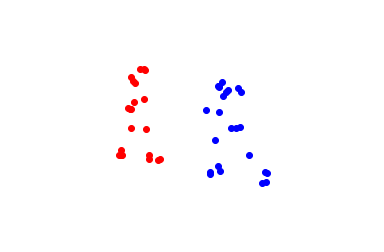

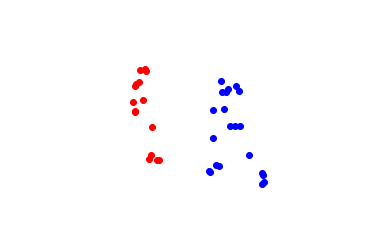

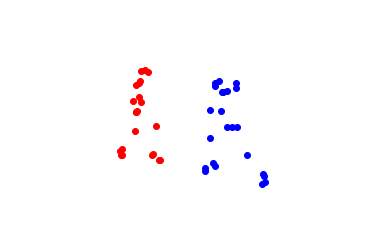

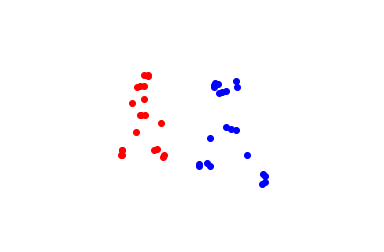

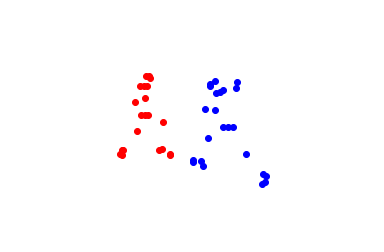

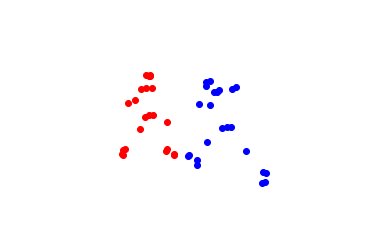

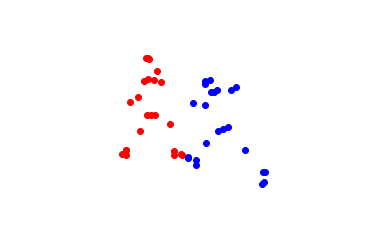

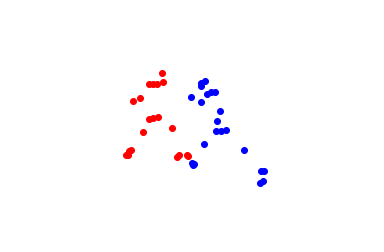

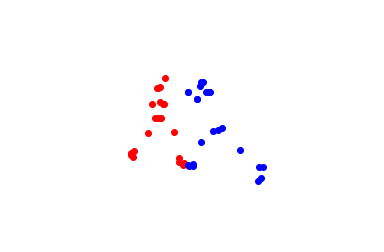

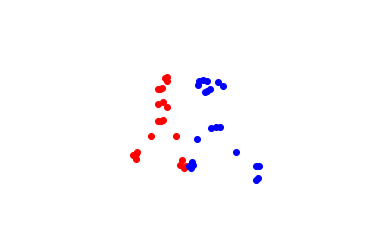

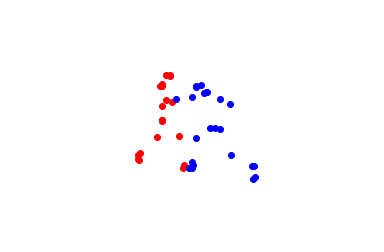

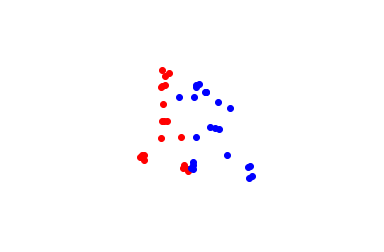

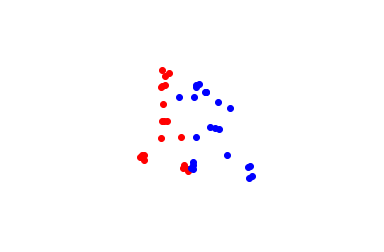

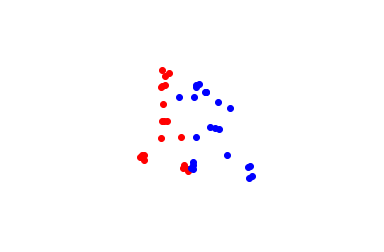

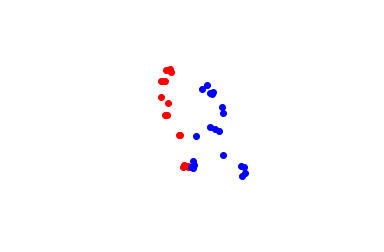

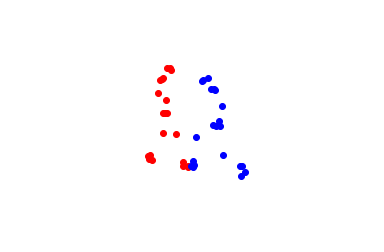

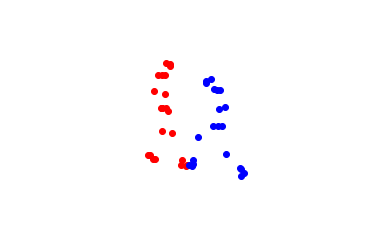

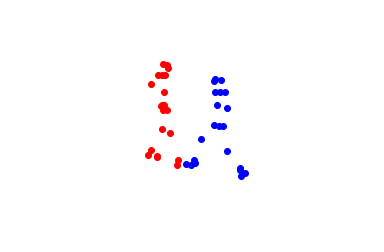

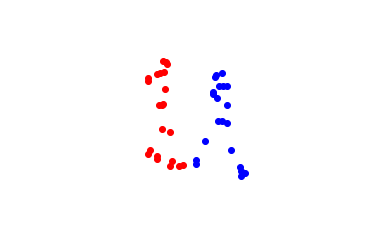

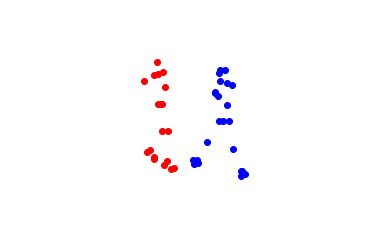

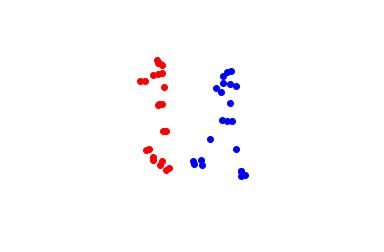

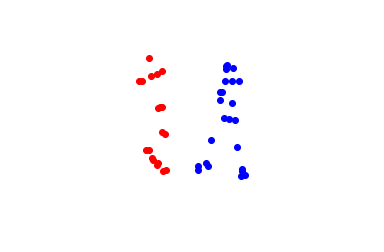

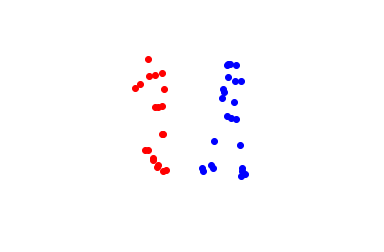

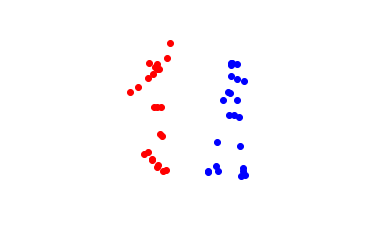

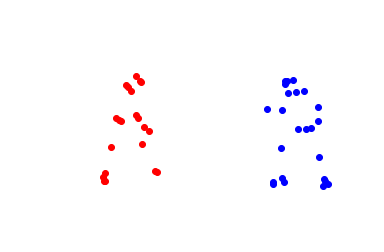

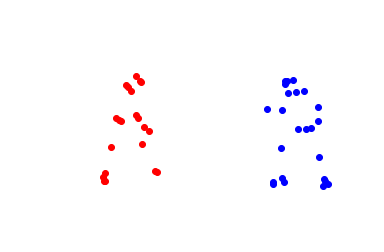

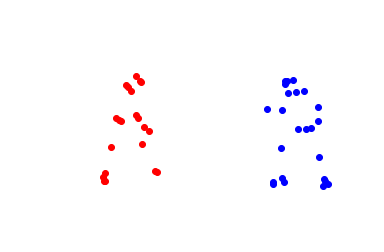

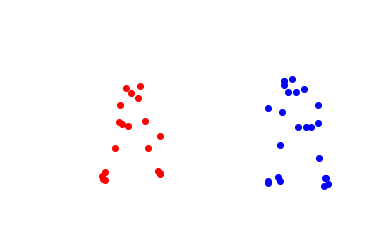

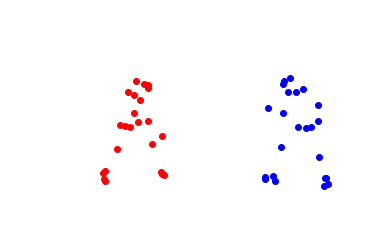

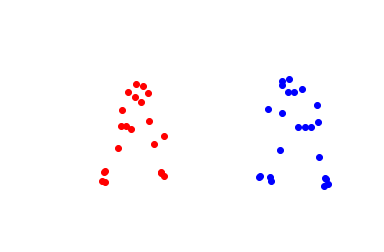

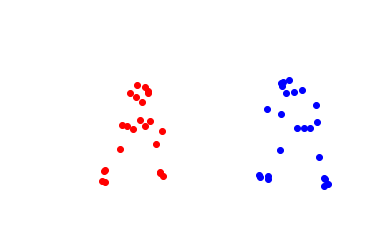

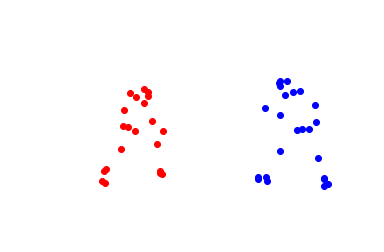

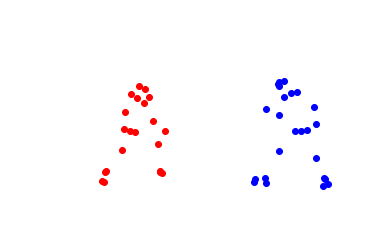

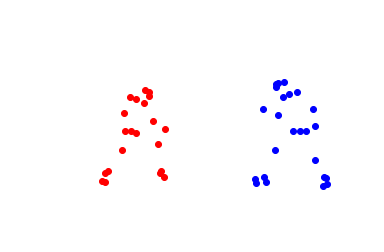

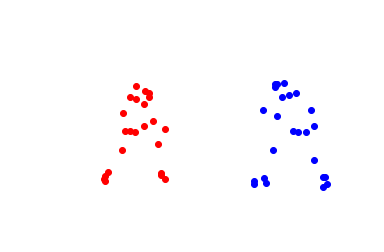

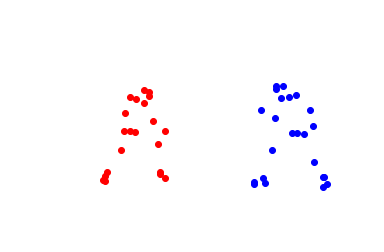

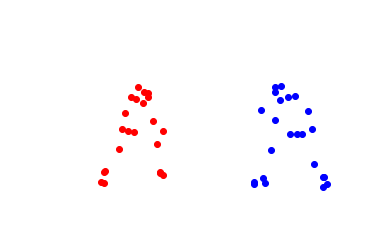

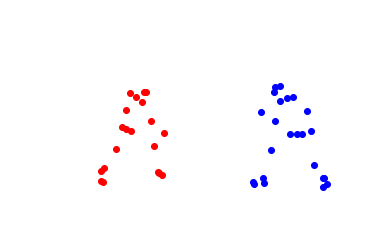

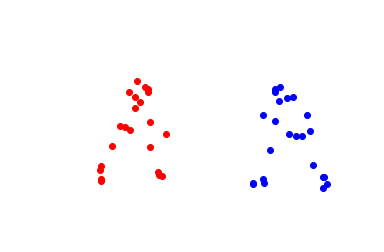

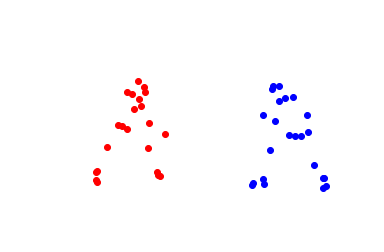

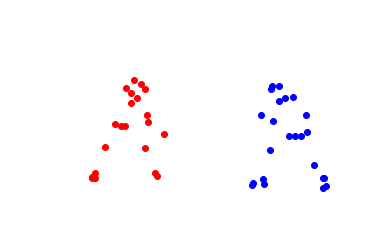

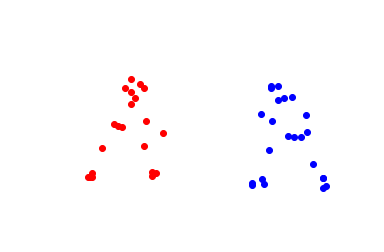

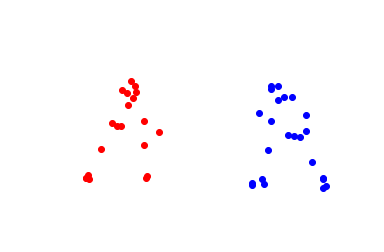

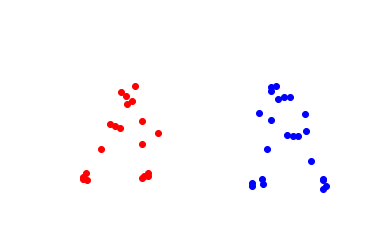

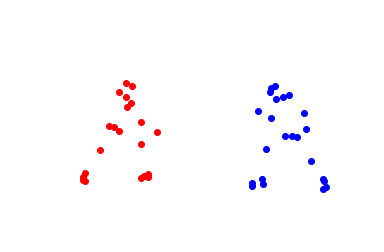

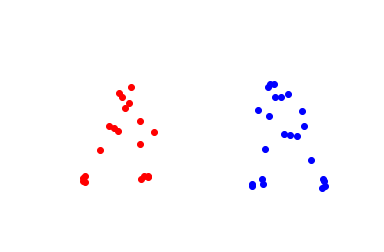

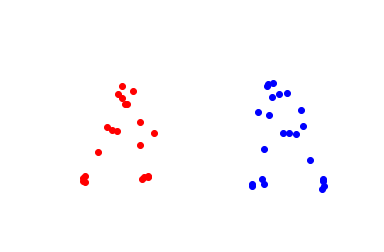

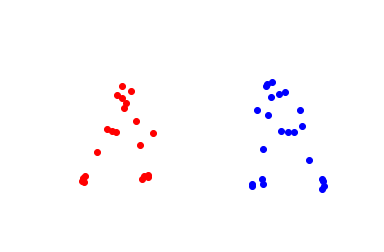

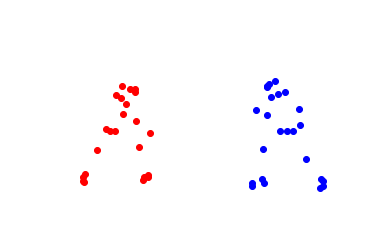

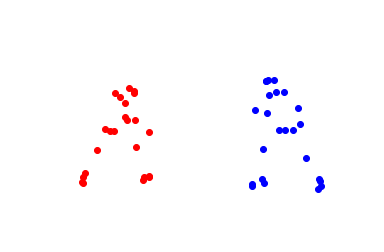

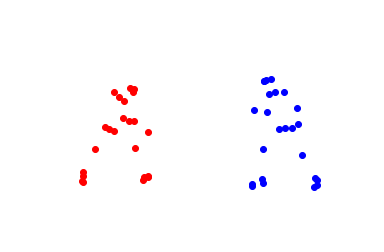

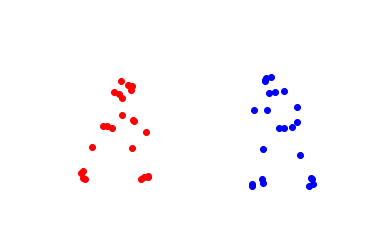

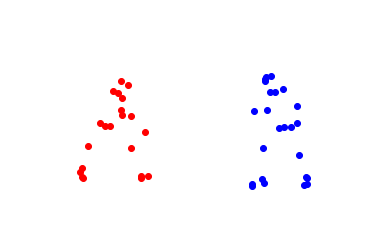

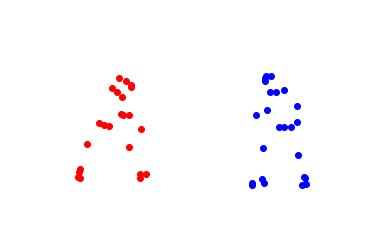

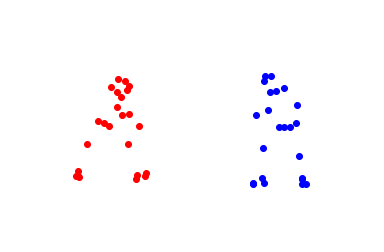

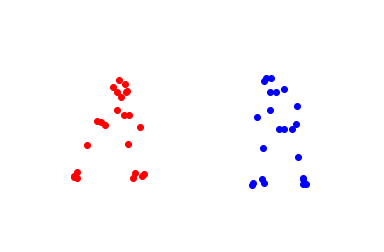

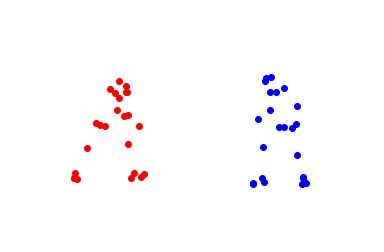

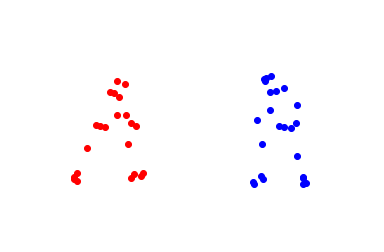

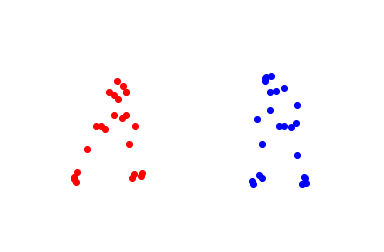

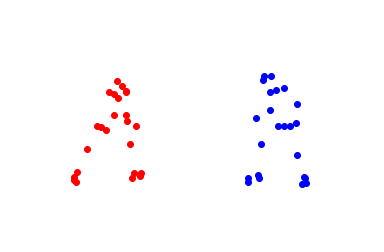

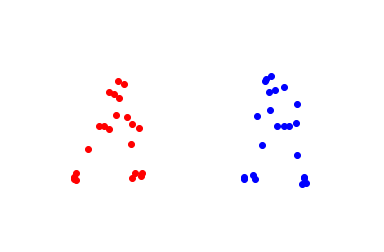

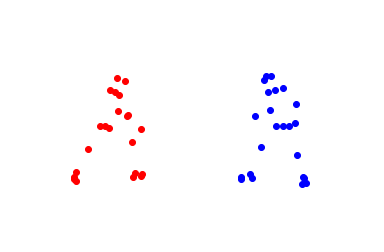

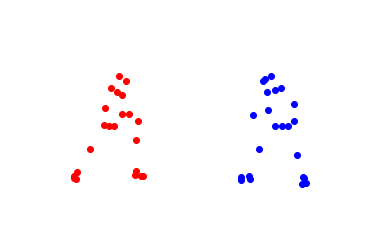

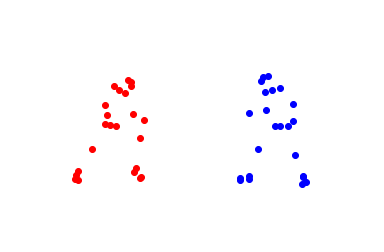

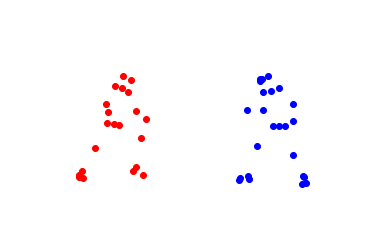

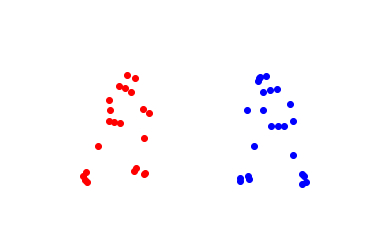

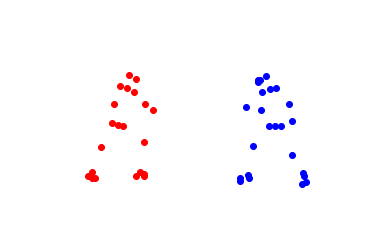

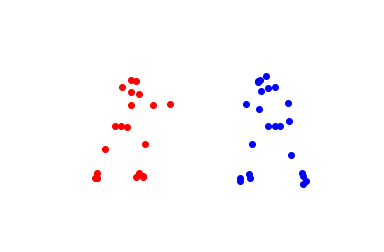

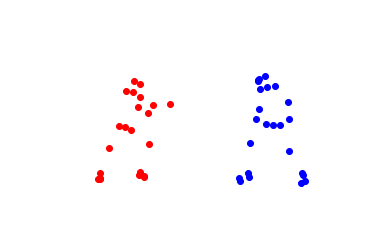

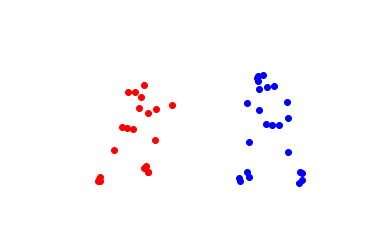

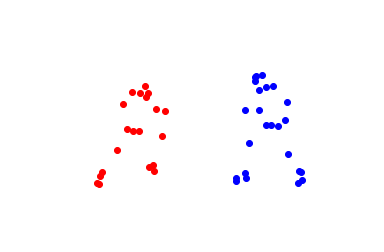

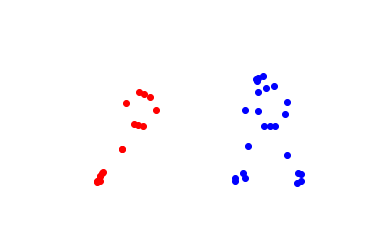

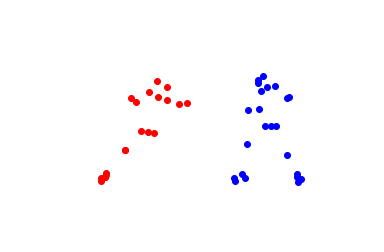

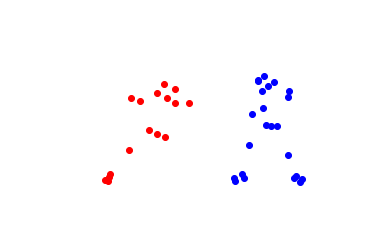

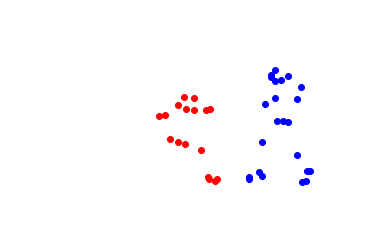

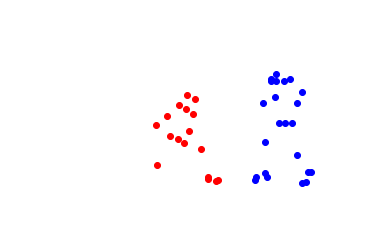

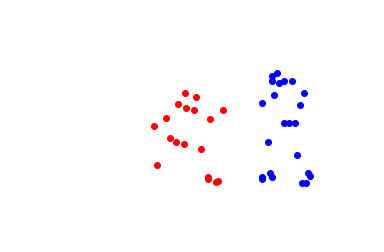

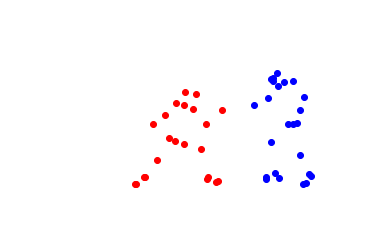

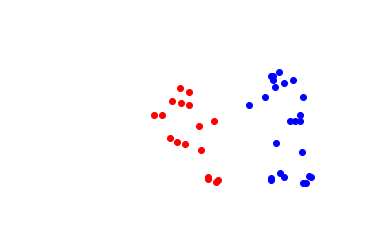

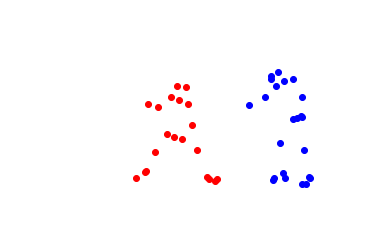

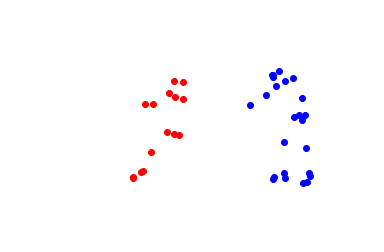

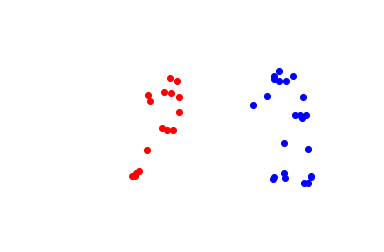

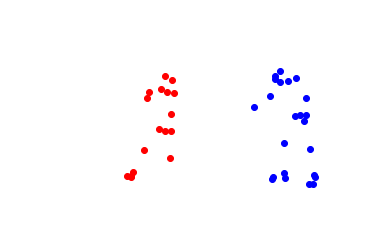

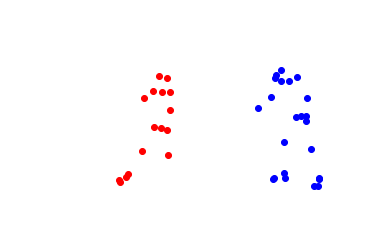

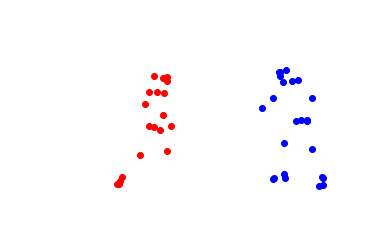

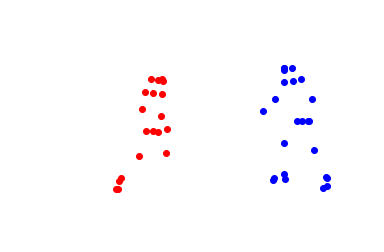

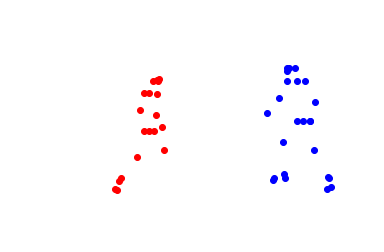

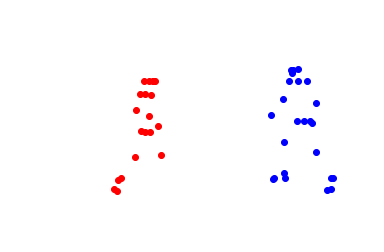

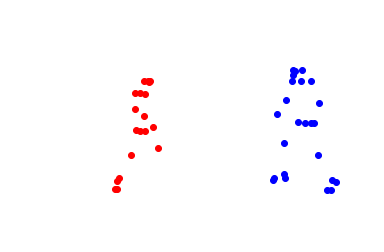

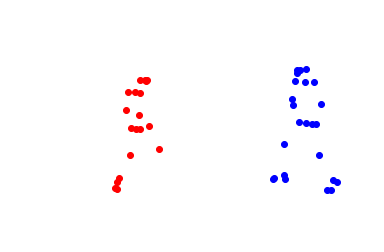

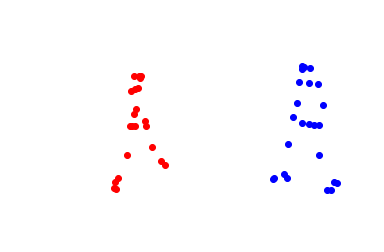

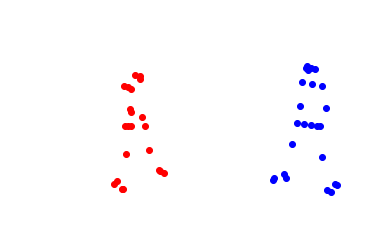

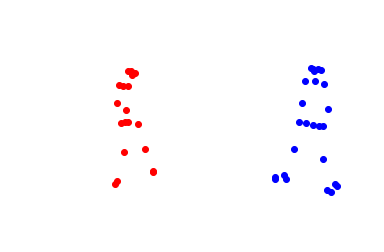

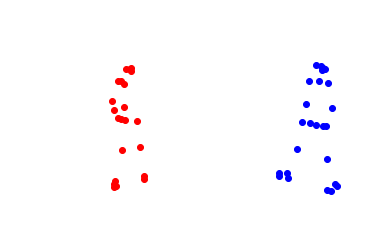

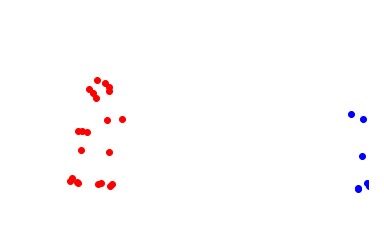

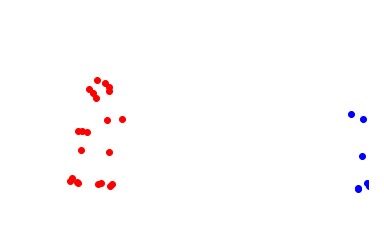

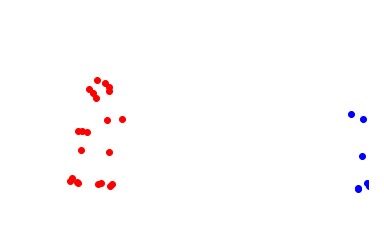

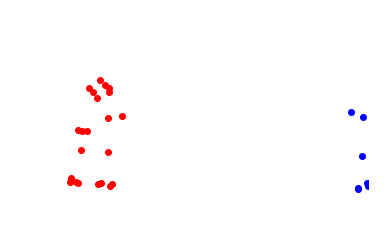

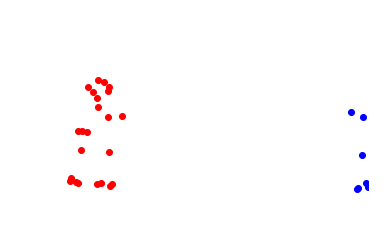

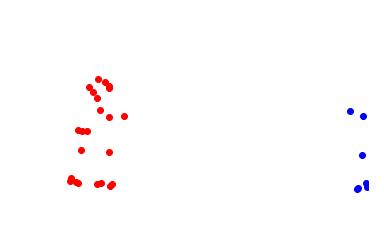

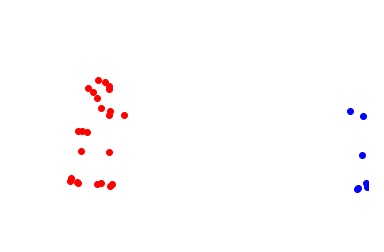

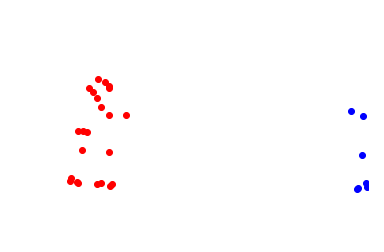

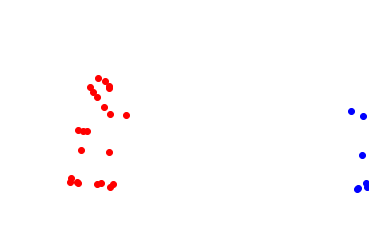

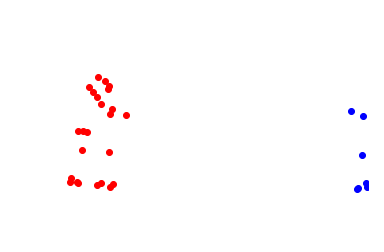

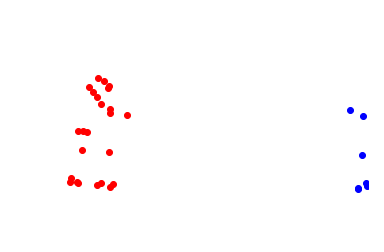

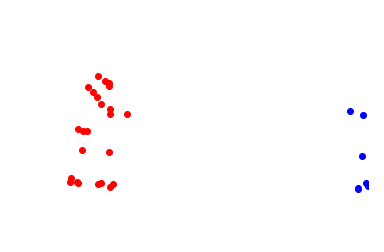

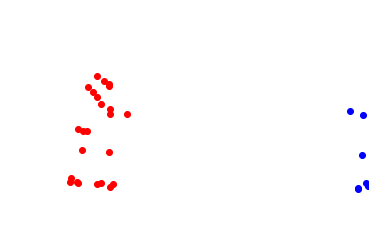

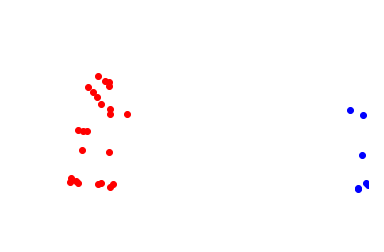

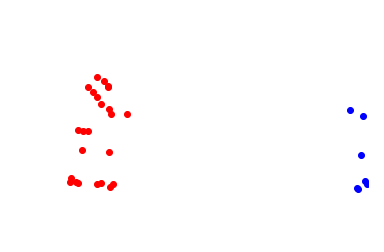

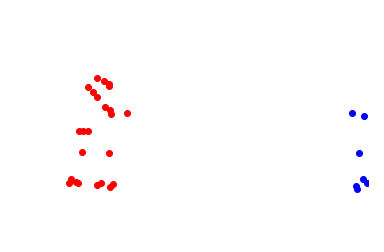

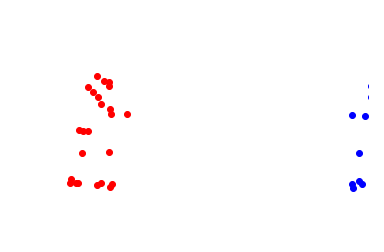

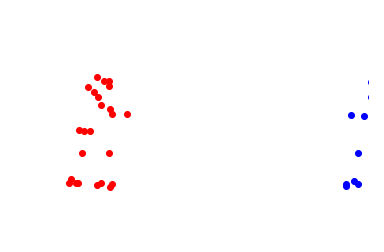

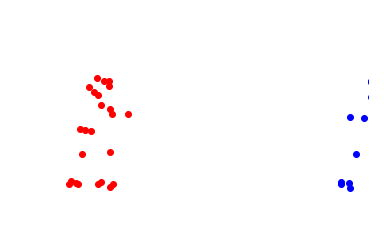

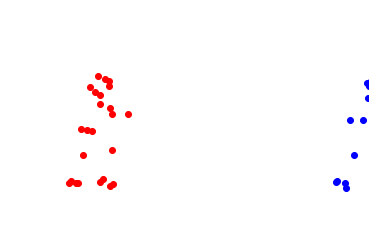

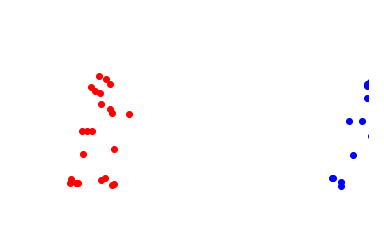

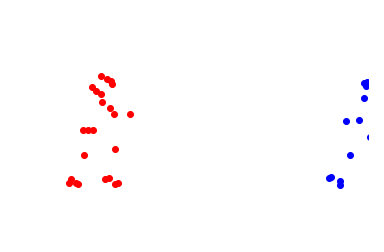

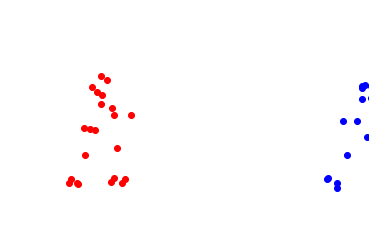

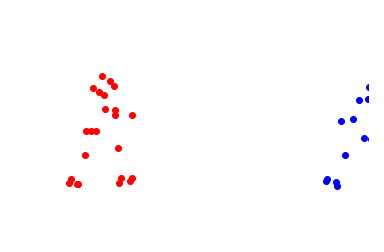

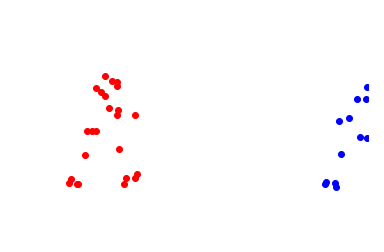

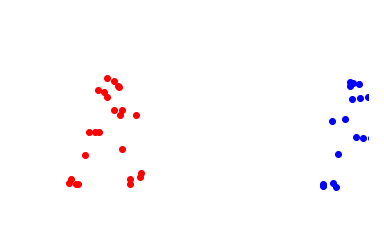

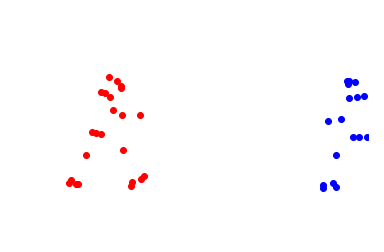

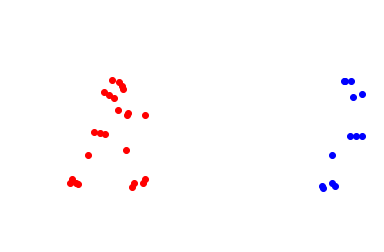

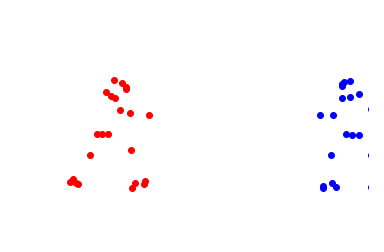

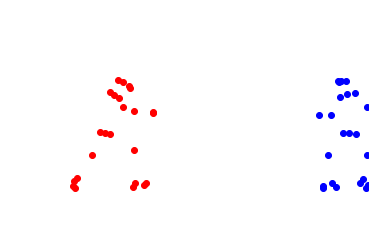

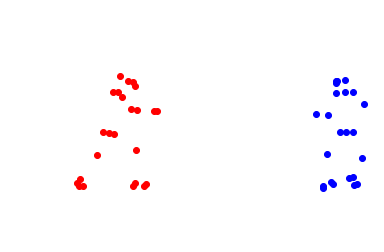

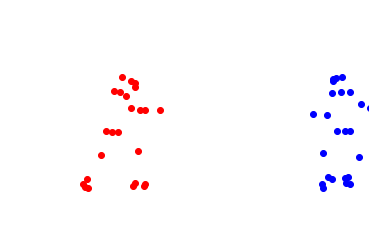

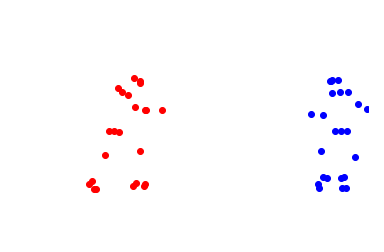

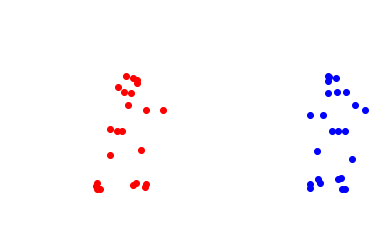

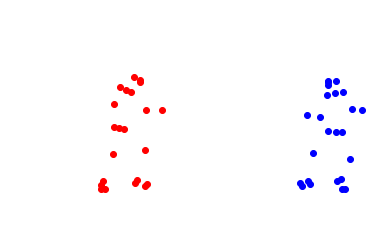

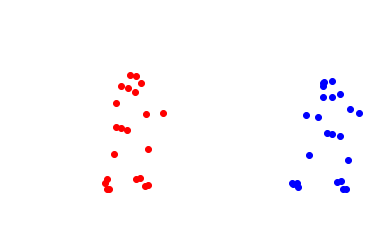

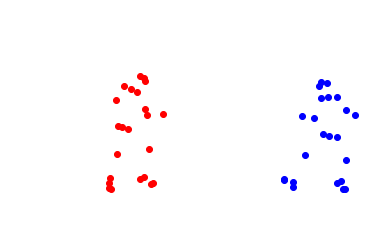

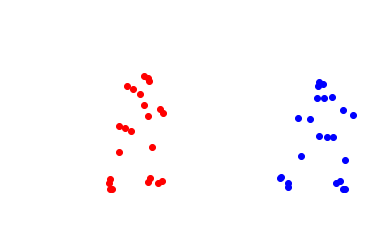

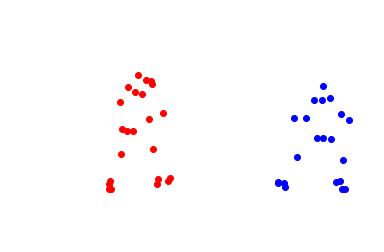

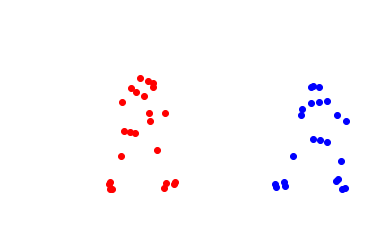

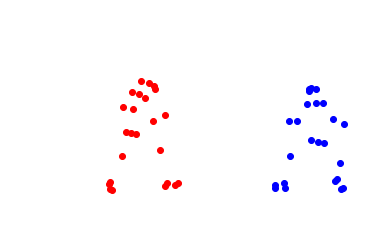

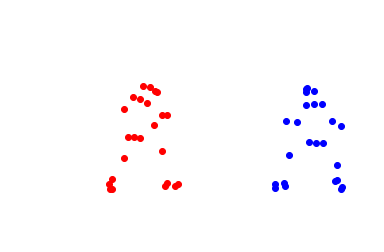

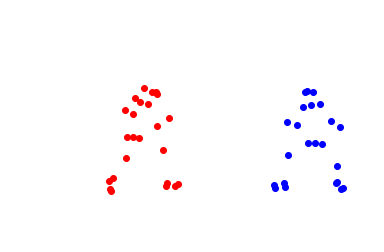

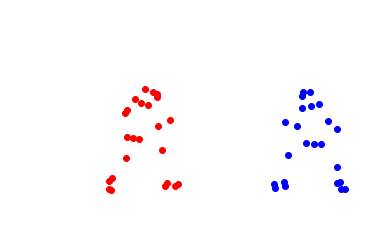

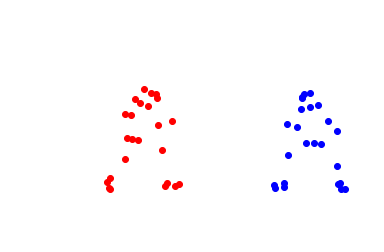

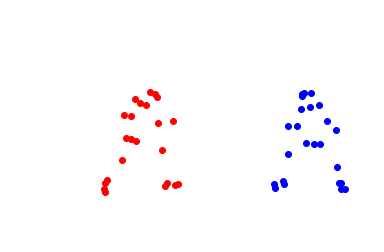

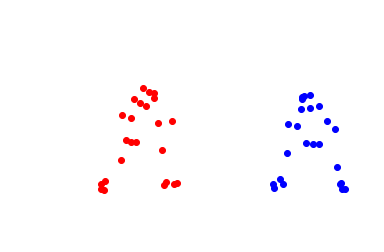

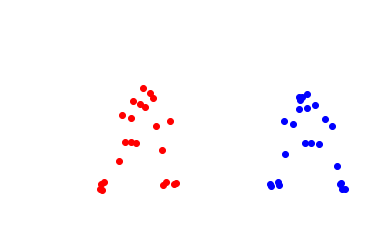

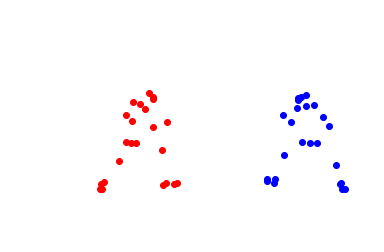

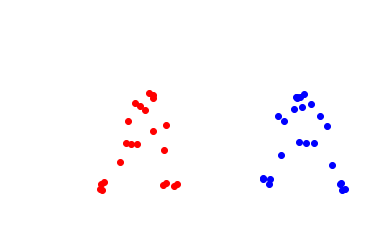

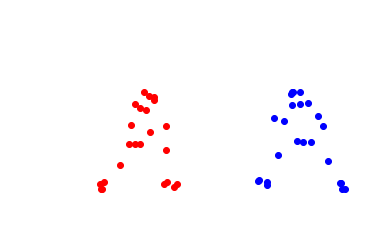

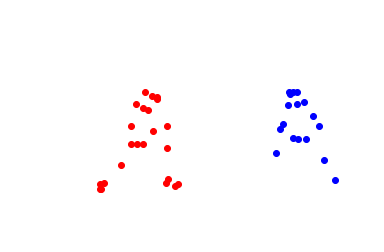

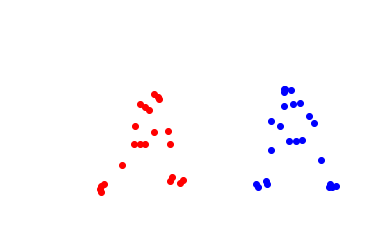

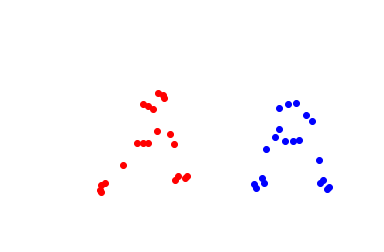

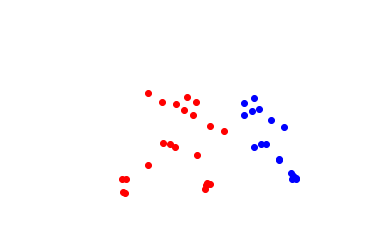

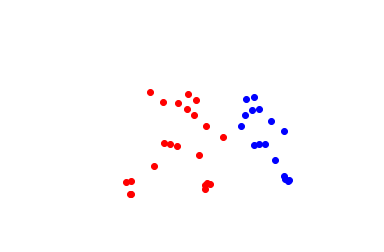

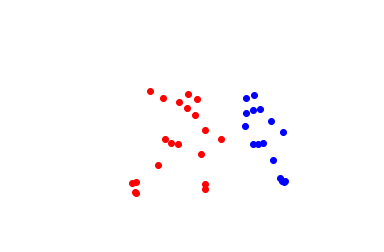

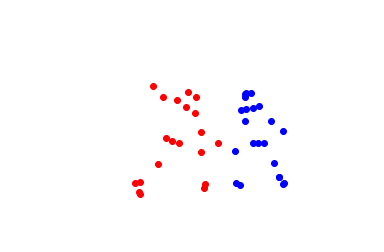

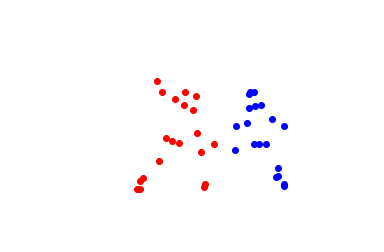

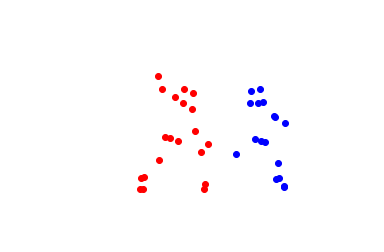

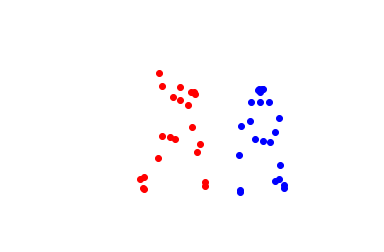

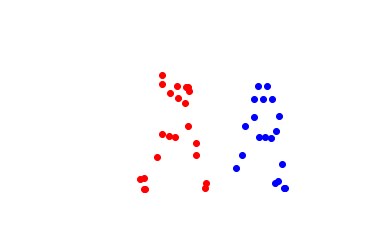

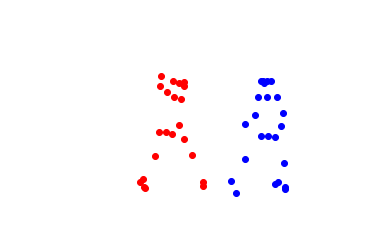

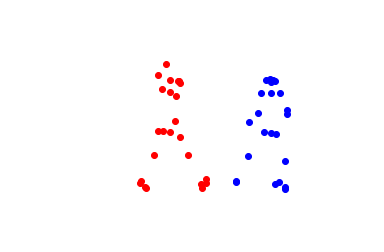

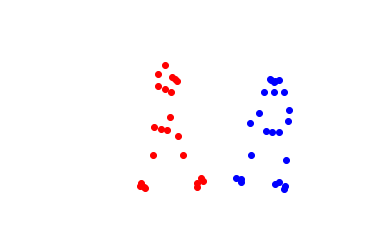

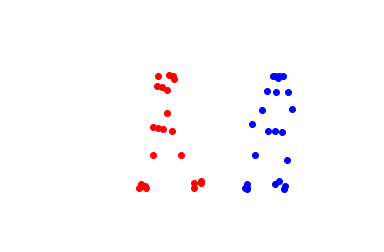

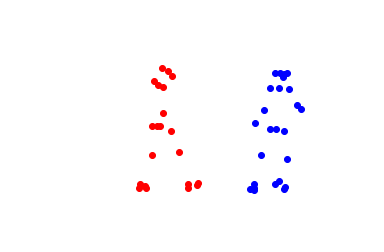

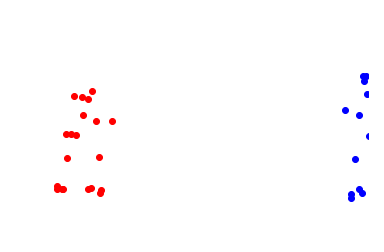

In [8]:
import matplotlib
matplotlib.use('Agg')

MY_ID = 0

N_clip_per_person = 3

clip_names = df["ClipName"].unique().tolist()
my_images = []
for clip_idx, clip_name in enumerate(clip_names):
    df_kp = load_key_point('./data/Kaggle/FencersKeyPoints/{}.json'.format(clip_name))
    for idx in range(len(df_kp)):
        idx_fixed = format(idx, '02d')
        img_name = "{}-{}.png".format(clip_name, idx_fixed)
        img_path = os.path.join("images", str(clip_idx // N_clip_per_person), img_name)
        #save_images(df_kp[idx], img_path)
        save_img(df_kp[idx], img_path)
    if clip_idx > 4 * N_clip_per_person:
        raise "THE END"

## Annotate

In [9]:
MY_ID = 0

In [10]:
my_images = sorted([os.path.join("images", str(MY_ID), img_name) \
             for img_name in os.listdir(os.path.join("images", str(MY_ID))) \
                    if img_name.split(".")[-1] == "png"])
print(len(my_images))

434


In [12]:
from chmp.label import annotate
annotations = annotate(
     my_images,
     classes=['fente', 'garde', 'prepattack', 'N/A'],
     cls='image',
)

In [38]:
annotations

[]

In [33]:
def enrich_item(i):
    infos = i.split(".png")[0].split("/")[-1][2:]
    clipname = infos.split("-")[0]
    idx = infos.split("-")[1]
    person = i.split("/")[-1][0]
    return clipname, idx, person
enrich_item(annotations[0]["item"])

images/0/A_0001_002_00_01_1-0.png


('0001_002_00_01_1', '0', 'A')

In [34]:
for annot in annotations:
    annot["ClipName"] = enrich_item(annot["item"])[0]
    annot["idx"] = enrich_item(annot["item"])[1]
    annot["person"] = enrich_item(annot["item"])[2]

images/0/A_0001_002_00_01_1-0.png
images/0/A_0001_002_00_01_1-0.png
images/0/A_0001_002_00_01_1-0.png
images/0/A_0001_002_00_01_1-1.png
images/0/A_0001_002_00_01_1-1.png
images/0/A_0001_002_00_01_1-1.png
images/0/A_0001_002_00_01_1-10.png
images/0/A_0001_002_00_01_1-10.png
images/0/A_0001_002_00_01_1-10.png
images/0/A_0001_002_00_01_1-11.png
images/0/A_0001_002_00_01_1-11.png
images/0/A_0001_002_00_01_1-11.png
images/0/A_0001_002_00_01_1-12.png
images/0/A_0001_002_00_01_1-12.png
images/0/A_0001_002_00_01_1-12.png
images/0/A_0001_002_00_01_1-13.png
images/0/A_0001_002_00_01_1-13.png
images/0/A_0001_002_00_01_1-13.png
images/0/A_0001_002_00_01_1-14.png
images/0/A_0001_002_00_01_1-14.png
images/0/A_0001_002_00_01_1-14.png
images/0/A_0001_002_00_01_1-15.png
images/0/A_0001_002_00_01_1-15.png
images/0/A_0001_002_00_01_1-15.png
images/0/A_0001_002_00_01_1-16.png
images/0/A_0001_002_00_01_1-16.png
images/0/A_0001_002_00_01_1-16.png
images/0/A_0001_002_00_01_1-17.png
images/0/A_0001_002_00_01_

In [35]:
annotations

[{'ClipName': '0001_002_00_01_1',
  'idx': '0',
  'index': 0,
  'item': 'images/0/A_0001_002_00_01_1-0.png',
  'label': 'garde',
  'person': 'A',
  'reason': 'order'},
 {'ClipName': '0001_002_00_01_1',
  'idx': '1',
  'index': 1,
  'item': 'images/0/A_0001_002_00_01_1-1.png',
  'label': 'garde',
  'person': 'A',
  'reason': 'order'},
 {'ClipName': '0001_002_00_01_1',
  'idx': '10',
  'index': 2,
  'item': 'images/0/A_0001_002_00_01_1-10.png',
  'label': 'garde',
  'person': 'A',
  'reason': 'order'},
 {'ClipName': '0001_002_00_01_1',
  'idx': '11',
  'index': 3,
  'item': 'images/0/A_0001_002_00_01_1-11.png',
  'label': 'garde',
  'person': 'A',
  'reason': 'order'},
 {'ClipName': '0001_002_00_01_1',
  'idx': '12',
  'index': 4,
  'item': 'images/0/A_0001_002_00_01_1-12.png',
  'label': 'garde',
  'person': 'A',
  'reason': 'order'},
 {'ClipName': '0001_002_00_01_1',
  'idx': '13',
  'index': 5,
  'item': 'images/0/A_0001_002_00_01_1-13.png',
  'label': 'garde',
  'person': 'A',
  'rea